<br /><h1 style="font-family:Impact,Arial;font-size:70px;">Analysis of Australia's Inbound and Outbound Tourism and Migration</h1>
<h2 style="font-family:Arial;">Eduardo Lucero</h2>
<h2 style="font-family:Arial;">99127565</h2>
<p><small> 37373 Programming for Data Analysis</small></p>
<p><small><font color=MediumVioletRed>Autumn 2019</font></small>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

# Abstract

This project aims to explore Australia's inbound and outbound tourisms and migration trends from 1976 to October 2018. The projects aims to identify interesting trends as well as potential factors that may affect rates primaraly through visualisations.

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 1. Motivation

It is important to understand how many people are entering and leaving the country and why. Tourism accounts for approximately 3% of Australia's GDP contributing approximately $50 billion per year to the economy. Tourism is Australia's largest export so it crucial it is understood. Data is the most effective tool to monitor how tourism numbers are performing over time. 

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 2. The data


The main dataset used for the project was data made publicly available by the Australian Beauru of Statistics and can be accessed here: https://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/3401.0Oct%202018?OpenDocument. The data was collected from migration cards when individuals enter or leave the country. Because of this this study does not account for illegal migration it will not be explored in this study.


To further explore this subject, the Elected Australian Government dataset was generated from data on: https://en.wikipedia.org/wiki/Elections_in_Australia

<h4>340101.xls</h4>
This dataset contains the number of *arrivals per month* from January 1976 through to October 2018. The types of arrivals are specicified by:
- Permanent, long term or short term
- Resident or visitor

The total arrivals per month are also included.

<h4>34102.xls</h4>
This dataset containers the number of *departures per month* from January 1976 thought to October 2018. The types of departures are specified by:
- Permanent, long term or short term
- Resident or visitor

The total departures per month are also included.

<h4>34105.xls</H4>
This dataset contains the number of *arrivals per country per month* from January 1976 through to October 2018. 

<h4>34106.xls</h4>
This dataset contains the *length* and *reason* of stay for short-term visitors.

<h4>34109.xls</h4>
This dataset contains the number of departure for Australian residents to each *country*

<h4>341011.xls</h4>
The dataset contains the counts per month for state or territory of intended stay

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 3. Data preparation

Code and comments on how the raw data is put in a usable form (i.e., how you go from the raw data set(s) to the dataframe you are using for the analysis).

__Create as many code, markdown and raw cells as needed__

Import dependecies

In [1]:
from math import *
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import geopandas as gpd
%matplotlib inline

In [2]:
# Function df_transform() cleans and formats DataFrame of files 340101.xls to 341011.xls. 
#
# The function requrires:
#     df: DataFrame name
#     regex: regular expression that returns desired subrings of column labels
#     g: regex group

def df_transform(df, regex, g):
    
    #Remove unnecessary rows
    df = df.iloc[9:].copy(deep=False)

    #Rename column label,'Unnamed: 0' to 'Date'
    df.rename(columns = {'Unnamed: 0': 'Date'}, inplace = True)
    
    #Create a list of the DataFrame column labels
    column_labels = list(df.columns)
    
    #Rename labels to regex match. Start from index 1 to skip 'Date'
    for i in range(1, len(column_labels)):
        column_labels[i] = re.search(str(regex), column_labels[i]).group(g).strip()
    
    #Replace DataFrame column labels with labels from the list 
    df.columns = column_labels

    #Convert column, 'Date' to a datetime object
    df['Date'] = pd.to_datetime(df['Date']) 
    
    #Convert other columns to int type
    df.iloc[::, 1:] = df.iloc[::, 1:].astype('int')

    #Reset DataFrame index to start from 0
    df.reset_index(inplace = True, drop = True) 

    return df

<h3>340101.xls - Arrival Count and Term</h3>

Raw DataFrame

In [3]:
#Import first dataset from xls file
df_340101 = pd.read_excel('Datasets/340101.xls', sheet_name = 1)

#Preview DataFrame
df_340101.head(10)

Unnamed: 0 Number of movements ;  Permanent Arrivals ;  \
0                 Unit                                      Number   
1          Series Type                                    Original   
2            Data Type                                        FLOW   
3            Frequency                                       Month   
4     Collection Month                                           1   
5         Series Start                         1976-01-01 00:00:00   
6           Series End                         2018-10-01 00:00:00   
7              No. Obs                                         514   
8            Series ID                                  A85232567K   
9  1976-01-01 00:00:00                                        3780   

  Number of movements ;  Long-term Residents returning ;  \
0                                             Number       
1                                           Original       
2                                               FLOW       
3                                              Month       
4                                                  1       
5                                1976-01-01 00:00:00       
6                                2018-10-01 00:00:00       
7                                                514       
8                                         A85232562X       
9                                               5380       

  Number of movements ;  Long-term Visitors arriving ;  \
0                                             Number     
1                                           Original     
2                                               FLOW     
3                                              Month     
4                                                  1     
5                                1976-01-01 00:00:00     
6                                2018-10-01 00:00:00     
7                                                514     
8                                         A85232555A     
9                                               2750     

  Number of movements ;  Permanent and Long-term Arrivals ;  \
0                                             Number          
1                                           Original          
2                                               FLOW          
3                                              Month          
4                                                  1          
5                                1976-01-01 00:00:00          
6                                2018-10-01 00:00:00          
7                                                514          
8                                         A85232568L          
9                                              11910          

  Number of movements ;  Short-term Residents returning ;  \
0                                             Number        
1                                           Original        
2                                               FLOW        
3                                              Month        
4                                                  1        
5                                1976-01-01 00:00:00        
6                                2018-10-01 00:00:00        
7                                                514        
8                                         A85232565F        
9                                             143400        

  Number of movements ;  Short-term Residents returning ;.1  \
0                                             Number          
1                                Seasonally Adjusted          
2                                               FLOW          
3                                              Month          
4                                                  1          
5                                1976-01-01 00:00:00          
6                                2018-10-01 00:00:00          
7                                                514          
8       

In [4]:
#Cretate a list containing column labels
column_labels = list(df_340101.columns)

#Create empty list to hold new labels
new_labels = []

for i in range(len(column_labels)):
    if '1' not in column_labels[i] and '2' not in column_labels[i]:
        new_labels.append(column_labels[i])

In [5]:
df_340101 = df_340101[new_labels]

Processed DataFrame

In [6]:
# Apply Function df_transform to df_340101
arrivals_per_month = df_transform(df_340101, ';(.*);', 1)

# Preview new DataFrame
arrivals_per_month.head()

Date  Permanent Arrivals  Long-term Residents returning  \
0 1976-01-01                3780                           5380   
1 1976-02-01                3900                           4190   
2 1976-03-01                4790                           4250   
3 1976-04-01                3790                           3490   
4 1976-05-01                4680                           4190   

   Long-term Visitors arriving  Permanent and Long-term Arrivals  \
0                         2750                             11910   
1                         2730                             10820   
2                         1940                             10980   
3                         1620                              8900   
4                         1890                             10760   

   Short-term Residents returning  Short-term Visitors arriving  \
0                          143400                         47700   
1                           76400                         49900   
2                           61900                         46100   
3                           55900                         37300   
4                           80600                         37600   

   Total Arrivals  
0          203000  
1          137000  
2          119000  
3          102100  
4          129000

<h3>340102.xls - Departure Count and Term</h3>

In [7]:
# Departures per month

departures_per_month = pd.read_excel('Datasets/340102.xls', sheet_name = 1)
departures_per_month.head(10)

Unnamed: 0 Number of movements ;  Permanent Departures ;  \
0                 Unit                                        Number   
1          Series Type                                      Original   
2            Data Type                                          FLOW   
3            Frequency                                         Month   
4     Collection Month                                             1   
5         Series Start                           1976-01-01 00:00:00   
6           Series End                           2018-10-01 00:00:00   
7              No. Obs                                           514   
8            Series ID                                    A85232566J   
9  1976-01-01 00:00:00                                          2170   

  Number of movements ;  Long-term Residents departing ;  \
0                                             Number       
1                                           Original       
2                                               FLOW       
3                                              Month       
4                                                  1       
5                                1976-01-01 00:00:00       
6                                2018-10-01 00:00:00       
7                                                514       
8                                         A85232554X       
9                                               7390       

  Number of movements ;  Long-term Visitors departing ;  \
0                                             Number      
1                                           Original      
2                                               FLOW      
3                                              Month      
4                                                  1      
5                                1976-01-01 00:00:00      
6                                2018-10-01 00:00:00      
7                                                514      
8                                         A85232564C      
9                                               1870      

  Number of movements ;  Permanent and Long-term Departures ;  \
0                                             Number            
1                                           Original            
2                                               FLOW            
3                                              Month            
4                                                  1            
5                                1976-01-01 00:00:00            
6                                2018-10-01 00:00:00            
7                                                514            
8                                         A85232558J            
9                                              11430            

  Number of movements ;  Short-term Residents departing ;  \
0                                             Number        
1                                           Original        
2                                               FLOW        
3                                              Month        
4                                                  1        
5                                1976-01-01 00:00:00        
6                                2018-10-01 00:00:00        
7                                                514        
8                                         A85232559K        
9                                              75800        

  Number of movements ;  Short-term Visitors departing ;  \
0                                             Number       
1                                           Original       
2                                               FLOW       
3                                              Month       
4                                                  1       
5                                1976-01-01 00:00:00       
6                                2018-10-01 00:00:00       
7                                       

In [8]:
departures_per_month = df_transform(departures_per_month, ';(.*);', 1)
departures_per_month.head()

Date  Permanent Departures  Long-term Residents departing  \
0 1976-01-01                  2170                           7390   
1 1976-02-01                  2060                           5130   
2 1976-03-01                  2660                           6350   
3 1976-04-01                  2320                           5640   
4 1976-05-01                  2750                           6730   

   Long-term Visitors departing  Permanent and Long-term Departures  \
0                          1870                               11430   
1                          1420                                8610   
2                          1670                               10670   
3                          1420                                9380   
4                          1770                               11250   

   Short-term Residents departing  Short-term Visitors departing  \
0                           75800                          66200   
1                           54700                          49400   
2                           85000                          46800   
3                           74600                          41000   
4                          103900                          43000   

   Total Departures  
0            153400  
1            112700  
2            142500  
3            125000  
4            158100

<h3>340105.xls - Visitors, Country of Origin</h3>

Original data

In [9]:
# Declared country of origin - visitors

df_340105 = pd.read_excel('Datasets/340105.xls', sheet_name = 1)
df_340105.head(10)

Unnamed: 0  \
0                 Unit   
1          Series Type   
2            Data Type   
3            Frequency   
4     Collection Month   
5         Series Start   
6           Series End   
7              No. Obs   
8            Series ID   
9  1991-01-01 00:00:00   

  Number of movements ;  New Zealand ;  Short-term Visitors arriving ;  \
0                                             Number                     
1                                           Original                     
2                                               FLOW                     
3                                              Month                     
4                                                  1                     
5                                1991-01-01 00:00:00                     
6                                2018-10-01 00:00:00                     
7                                                334                     
8                                         A85248607L                     
9                                              26100                     

  Number of movements ;  New Caledonia ;  Short-term Visitors arriving ;  \
0                                             Number                       
1                                           Original                       
2                                               FLOW                       
3                                              Month                       
4                                                  1                       
5                                1991-01-01 00:00:00                       
6                                2018-10-01 00:00:00                       
7                                                334                       
8                                         A85248692T                       
9                                               2500                       

  Number of movements ;  Papua New Guinea ;  Short-term Visitors arriving ;  \
0                                             Number                          
1                                           Original                          
2                                               FLOW                          
3                                              Month                          
4                                                  1                          
5                                1991-01-01 00:00:00                          
6                                2018-10-01 00:00:00                          
7                                                334                          
8                                         A85248841K                          
9                                               4100                          

  Number of movements ;  Vanuatu ;  Short-term Visitors arriving ;  \
0                                             Number                 
1                                           Original                 
2                                               FLOW                 
3                                              Month                 
4                                                  1                 
5                                1991-01-01 00:00:00                 
6                                2018-10-01 00:00:00                 
7                                                334                 
8                                         A85248689C                 
9                                                300                 

  Number of movements ;  Fiji ;  Short-term Visitors arriving ;  \
0                                             Number              
1                                           Original              
2                                               FLOW              
3                                              Month              
4                                                  1              
5                             

Processed data

In [10]:
visitors_arriving = df_transform(df_340105, ';(.*);(.*);', 1)
visitors_arriving.head()

Date  New Zealand  New Caledonia  Papua New Guinea  Vanuatu  Fiji  \
0 1991-01-01        26100           2500              4100      300  1600   
1 1991-02-01        26600           2400              1900      300  1000   
2 1991-03-01        37300           1000              2400      300  1500   
3 1991-04-01        32000            700              2600      200  1200   
4 1991-05-01        44500            800              2100      200  1100   

   Other Oceania and Antarctica  Total Oceania and Antarctica  UK, CIs & IOM  \
0                          1400                         36000          21600   
1                          1200                         33600          29700   
2                          1200                         43700          28200   
3                           800                         37700          22800   
4                           900                         49600          15400   

   Ireland  ...  Brazil  Chile  Colombia  Mexico  Other Americas  \
0      600  ...     500    100         0     100             300   
1     1000  ...     200    100         0     100             200   
2      800  ...     100    100         0     100             200   
3      600  ...     100    100         0     100             100   
4      500  ...     200    100         0     100             100   

   Total Americas  South Africa  Other Sub-Saharan Africa  \
0           23600           600                       700   
1           28000           700                       800   
2           29700          1000                       700   
3           21300           700                       700   
4           20400           500                       500   

   Total Sub-Saharan Africa  Total (Country of stay/residence)  
0                      1300                             177400  
1                      1500                             190600  
2                      1700                             189200  
3                      1400                             168000  
4                       900                             161400  

[5 rows x 69 columns]

Create a new DataFrame from visitors_arriving containing unique countries only

In [11]:
#Cretate a list containing column labels
column_labels = list(visitors_arriving.columns)

#Create empty list to hold new labels
new_labels = []

# If the label does not contin 'Total' or 'Other' add it to 'new_labels'
for i in range(len(column_labels)):
    if 'Total' not in column_labels[i] and 'Other' not in column_labels[i]:
        new_labels.append(column_labels[i])

In [12]:
inbound_by_country = visitors_arriving[new_labels]
inbound_by_country.head()

Date  New Zealand  New Caledonia  Papua New Guinea  Vanuatu  Fiji  \
0 1991-01-01        26100           2500              4100      300  1600   
1 1991-02-01        26600           2400              1900      300  1000   
2 1991-03-01        37300           1000              2400      300  1500   
3 1991-04-01        32000            700              2600      200  1200   
4 1991-05-01        44500            800              2100      200  1100   

   UK, CIs & IOM  Ireland  Austria  Belgium  ...  Pakistan  Sri Lanka  Canada  \
0          21600      600     1100      300  ...       100        300    4700   
1          29700     1000      800      200  ...       100        300    5200   
2          28200      800      600      300  ...       100        300    5200   
3          22800      600      700      200  ...       100        300    3000   
4          15400      500      600      100  ...       100        200    2800   

   United States of America  Argentina  Brazil  Chile  Colombia  Mexico  \
0                     17600        400     500    100         0     100   
1                     21900        300     200    100         0     100   
2                     23800        200     100    100         0     100   
3                     17700        200     100    100         0     100   
4                     16800        200     200    100         0     100   

   South Africa  
0           600  
1           700  
2          1000  
3           700  
4           500  

[5 rows x 50 columns]

Create a new DataFrame from visitors_arriving containing total of continent areas

In [13]:
#Cretate a list containing column labels
column_labels = list(visitors_arriving.columns)

#Create empty list to hold new labels
new_labels = []

for i in range(len(column_labels)):
    if 'Date' in column_labels[i] or 'Total' in column_labels[i]:
        new_labels.append(column_labels[i])

In [14]:
inbound_by_continent = visitors_arriving[new_labels]
inbound_by_continent.head()

Date  Total Oceania and Antarctica  Total North-West Europe  \
0 1991-01-01                         36000                    41300   
1 1991-02-01                         33600                    50200   
2 1991-03-01                         43700                    44900   
3 1991-04-01                         37700                    36700   
4 1991-05-01                         49600                    24900   

   Total Southern and Eastern Europe  Total North Africa and the Middle East  \
0                               3800                                    1000   
1                               3300                                    1000   
2                               3000                                    1000   
3                               2400                                    1000   
4                               2000                                    1000   

   Total South-East Asia  Total North-East Asia  \
0                  12100                  56700   
1                  18400                  53000   
2                  16500                  46600   
3                  19900                  45800   
4                  15200                  45500   

   Total Southern and Central Asia  Total Americas  Total Sub-Saharan Africa  \
0                             1100           23600                      1300   
1                             1000           28000                      1500   
2                             1200           29700                      1700   
3                             1400           21300                      1400   
4                             1600           20400                       900   

   Total (Country of stay/residence)  
0                             177400  
1                             190600  
2                             189200  
3                             168000  
4                             161400

<h3>340106.xls - Visitors, Length and Reason of Stay</h3>

In [15]:
# Reason & length of stay

#Import dataset
df_340106 = pd.read_excel('Datasets/340106.xls', sheet_name = 1)
df_340106.head(10)

Unnamed: 0  \
0                 Unit   
1          Series Type   
2            Data Type   
3            Frequency   
4     Collection Month   
5         Series Start   
6           Series End   
7              No. Obs   
8            Series ID   
9  1991-01-01 00:00:00   

  Number of movements ;  Short-term Visitors arriving ;  Under 1 week ;  \
0                                             Number                      
1                                           Original                      
2                                               FLOW                      
3                                              Month                      
4                                                  1                      
5                                1991-01-01 00:00:00                      
6                                2018-10-01 00:00:00                      
7                                                334                      
8                                         A85251143K                      
9                                              44500                      

  Number of movements ;  Short-term Visitors arriving ;  1 and under 2 weeks ;  \
0                                             Number                             
1                                           Original                             
2                                               FLOW                             
3                                              Month                             
4                                                  1                             
5                                1991-01-01 00:00:00                             
6                                2018-10-01 00:00:00                             
7                                                334                             
8                                         A85251139V                             
9                                              47900                             

  Number of movements ;  Short-term Visitors arriving ;  2 weeks and under 1 month ;  \
0                                             Number                                   
1                                           Original                                   
2                                               FLOW                                   
3                                              Month                                   
4                                                  1                                   
5                                1991-01-01 00:00:00                                   
6                                2018-10-01 00:00:00                                   
7                                                334                                   
8                                         A85251142J                                   
9                                              30700                                   

  Number of movements ;  Short-term Visitors arriving ;  1 and under 2 months ;  \
0                                             Number                              
1                                           Original                              
2                                               FLOW                              
3                                              Month                              
4                                                  1                              
5                                1991-01-01 00:00:00                              
6                                2018-10-01 00:00:00                              
7                                                334                              
8                                         A85251140C                              
9                                              19700                              

  Number of movements ;  Short-term Visitors arriving ;  2 and under 3 months ;  \
0                             

In [16]:
df_340106 = df_transform(df_340106, '(.*);(.*);(.*);', 3)
df_340106.head()

Date  Under 1 week  1 and under 2 weeks  2 weeks and under 1 month  \
0 1991-01-01         44500                47900                      30700   
1 1991-02-01         43600                51000                      38500   
2 1991-03-01         42500                57700                      44400   
3 1991-04-01         47900                49500                      31000   
4 1991-05-01         53400                47300                      31900   

   1 and under 2 months  2 and under 3 months  3 and under 6 months  \
0                 19700                  8000                  9600   
1                 23900                  7900                  8700   
2                 22000                  6700                  7200   
3                 19400                  5100                  6100   
4                 13100                  4200                  5400   

   6 and under 12 months  Total (Duration of stay in days)  \
0                  17000                            177400   
1                  16800                            190600   
2                   8800                            189200   
3                   9100                            168000   
4                   6300                            161400   

   Convention/conference  Business  Visiting friends/relatives  Holiday  \
0                   1700     13600                       28800   108900   
1                   3700     18300                       35200   109100   
2                   2000     18600                       40100   111700   
3                   2100     20900                       33900    96700   
4                   2900     17800                       30200    96500   

   Employment  Education  Other & not stated  Total (Reason for Journey)  
0        2600       9900               11900                      177400  
1        1700      10900               11700                      190600  
2        1700       3700               11500                      189200  
3        2600       4200                7500                      168000  
4        2600       2800                8600                      161400

In [17]:
length_of_stay = df_340106.iloc[:, :9].copy()
length_of_stay.head()

Date  Under 1 week  1 and under 2 weeks  2 weeks and under 1 month  \
0 1991-01-01         44500                47900                      30700   
1 1991-02-01         43600                51000                      38500   
2 1991-03-01         42500                57700                      44400   
3 1991-04-01         47900                49500                      31000   
4 1991-05-01         53400                47300                      31900   

   1 and under 2 months  2 and under 3 months  3 and under 6 months  \
0                 19700                  8000                  9600   
1                 23900                  7900                  8700   
2                 22000                  6700                  7200   
3                 19400                  5100                  6100   
4                 13100                  4200                  5400   

   6 and under 12 months  Total (Duration of stay in days)  
0                  17000                            177400  
1                  16800                            190600  
2                   8800                            189200  
3                   9100                            168000  
4                   6300                            161400

In [18]:
#Generate column index for new DataFrame
n = np.arange(9, 16)
n = np.insert(n, 0, 0)

In [19]:
reason_of_stay = df_340106.iloc[:, n].copy()
reason_of_stay.head()

Date  Convention/conference  Business  Visiting friends/relatives  \
0 1991-01-01                   1700     13600                       28800   
1 1991-02-01                   3700     18300                       35200   
2 1991-03-01                   2000     18600                       40100   
3 1991-04-01                   2100     20900                       33900   
4 1991-05-01                   2900     17800                       30200   

   Holiday  Employment  Education  Other & not stated  
0   108900        2600       9900               11900  
1   109100        1700      10900               11700  
2   111700        1700       3700               11500  
3    96700        2600       4200                7500  
4    96500        2600       2800                8600

<h3>340109.xls - Residents returning, Country of Travel</h3>

Count for country Australian residents are returning from

<h4>Raw DataFrame</h4>

In [20]:
#Import dataset
df_340109 = pd.read_excel('Datasets/340109.xls', sheet_name = 1)
df_340109.head(10)

Unnamed: 0  \
0                 Unit   
1          Series Type   
2            Data Type   
3            Frequency   
4     Collection Month   
5         Series Start   
6           Series End   
7              No. Obs   
8            Series ID   
9  2007-07-01 00:00:00   

  Number of movements ;  Norfolk Island ;  Short-term Residents returning ;  \
0                                             Number                          
1                                           Original                          
2                                               FLOW                          
3                                              Month                          
4                                                  1                          
5                                2007-07-01 00:00:00                          
6                                2018-10-01 00:00:00                          
7                                                136                          
8                                         A85250367C                          
9                                               1500                          

  Number of movements ;  New Zealand ;  Short-term Residents returning ;  \
0                                             Number                       
1                                           Original                       
2                                               FLOW                       
3                                              Month                       
4                                                  1                       
5                                2007-07-01 00:00:00                       
6                                2018-10-01 00:00:00                       
7                                                136                       
8                                         A85250212K                       
9                                              82600                       

  Number of movements ;  New Caledonia ;  Short-term Residents returning ;  \
0                                             Number                         
1                                           Original                         
2                                               FLOW                         
3                                              Month                         
4                                                  1                         
5                                2007-07-01 00:00:00                         
6                                2018-10-01 00:00:00                         
7                                                136                         
8                                         A85250292W                         
9                                               1800                         

  Number of movements ;  Papua New Guinea ;  Short-term Residents returning ;  \
0                                             Number                            
1                                           Original                            
2                                               FLOW                            
3                                              Month                            
4                                                  1                            
5                                2007-07-01 00:00:00                            
6                                2018-10-01 00:00:00                            
7                                                136                            
8                                         A85250444W                            
9                                               4600                            

  Number of movements ;  Vanuatu ;  Short-term Residents returning ;  \
0                                             Number                   
1                                           Original                   
2                                               FLO

<h4>Transformed DataFrame</h4>

In [21]:
residents_returning = df_transform(df_340109, ';(.*);(.*);', 1)
residents_returning.head()

Date  Norfolk Island  New Zealand  New Caledonia  Papua New Guinea  \
0 2007-07-01            1500        82600           1800              4600   
1 2007-08-01            1700        70200           1300              4600   
2 2007-09-01            2500        70300           1500              5000   
3 2007-10-01            2200        81000           1600              5700   
4 2007-11-01            2500        69900            800              4300   

   Vanuatu  Cook Islands   Fiji  French Polynesia  Samoa  ...  Chile  Peru  \
0     5500           800  21700               900   1700  ...    500   600   
1     4000           600  16500               500   1200  ...    600   500   
2     4200           800  19600               400   1600  ...    700   400   
3     4600           800  24700               400   1700  ...    900  1100   
4     4100           700  16900               700    700  ...    800   600   

   Mexico  Other Americas  Total Americas  Mauritius  South Africa  \
0     500            1200           60700       1300          5400   
1     500             900           50300       1000          3700   
2     600             600           55900       1600          4400   
3     700            1100           72200       1700          5800   
4     500            1100           48000        500          4100   

   Other Sub-Saharan Africa  Total Sub-Saharan Africa  \
0                      3100                      9800   
1                      2600                      7300   
2                      2500                      8500   
3                      3400                     10900   
4                      2000                      6600   

   Total (Country of stay/residence)  
0                             539200  
1                             445500  
2                             481400  
3                             595600  
4                             421800  

[5 rows x 75 columns]

Create new DataFrame from 'residents_returning' containing only unique countries

In [22]:
#Cretate a list containing column labels
column_labels = list(residents_returning.columns)

#Create empty list to hold new labels
new_labels = []

for i in range(len(column_labels)):
    if 'Total' not in column_labels[i] and 'Other' not in column_labels[i]:
        new_labels.append(column_labels[i])

In [23]:
residents_returning_by_country = residents_returning[new_labels]
residents_returning_by_country.head()

Date  Norfolk Island  New Zealand  New Caledonia  Papua New Guinea  \
0 2007-07-01            1500        82600           1800              4600   
1 2007-08-01            1700        70200           1300              4600   
2 2007-09-01            2500        70300           1500              5000   
3 2007-10-01            2200        81000           1600              5700   
4 2007-11-01            2500        69900            800              4300   

   Vanuatu  Cook Islands   Fiji  French Polynesia  Samoa  ...  Sri Lanka  \
0     5500           800  21700               900   1700  ...       2000   
1     4000           600  16500               500   1200  ...       1800   
2     4200           800  19600               400   1600  ...       1900   
3     4600           800  24700               400   1700  ...       2000   
4     4100           700  16900               700    700  ...       1400   

   Canada  United States of America  Argentina  Brazil  Chile  Peru  Mexico  \
0   10000                     46900        600     400    500   600     500   
1    9400                     37500        300     600    600   500     500   
2   10600                     41500        700     700    700   400     600   
3    8200                     58400       1200     600    900  1100     700   
4    3800                     39700        400    1200    800   600     500   

   Mauritius  South Africa  
0       1300          5400  
1       1000          3700  
2       1600          4400  
3       1700          5800  
4        500          4100  

[5 rows x 56 columns]

Create new DataFrame from 'residents_returning' containing only continent totals

In [24]:
#Cretate a list containing column labels
column_labels = list(residents_returning.columns)

#Create empty list to hold new labels
new_labels = []

for i in range(len(column_labels)):
    if 'Date' in column_labels[i] or 'Total' in column_labels[i]:
        new_labels.append(column_labels[i])

In [25]:
residents_returning_by_continent = residents_returning[new_labels]
residents_returning_by_continent.head()

Date  Total Oceania and Antarctica  Total North-West Europe  \
0 2007-07-01                        123500                    95900   
1 2007-08-01                        102700                    70700   
2 2007-09-01                        108000                    81600   
3 2007-10-01                        124700                   107100   
4 2007-11-01                        102100                    50400   

   Total Southern and Eastern Europe  Total North Africa and the Middle East  \
0                              44700                                   11100   
1                              41300                                   12100   
2                              46700                                   13200   
3                              52000                                   14400   
4                              21000                                   12800   

   Total South-East Asia  Total North-East Asia  \
0                 128300                  54500   
1                 109200                  42200   
2                 103600                  52400   
3                 124700                  75400   
4                 110400                  55900   

   Total Southern and Central Asia  Total Americas  Total Sub-Saharan Africa  \
0                            10900           60700                      9800   
1                             9800           50300                      7300   
2                            11600           55900                      8500   
3                            14300           72200                     10900   
4                            14600           48000                      6600   

   Total (Country of stay/residence)  
0                             539200  
1                             445500  
2                             481400  
3                             595600  
4                             421800

<h3>341011.xls -  Visitors: State or Territory of intended Stay</h3>

In [26]:
# Import State Data
df_3401011 = pd.read_excel('Datasets/3401011.xls', sheet_name = 1)
df_3401011.head(10)

Unnamed: 0  \
0                 Unit   
1          Series Type   
2            Data Type   
3            Frequency   
4     Collection Month   
5         Series Start   
6           Series End   
7              No. Obs   
8            Series ID   
9  1991-01-01 00:00:00   

  Number of movements ;  Short-term Visitors arriving ;  NSW ;  \
0                                             Number             
1                                           Original             
2                                               FLOW             
3                                              Month             
4                                                  1             
5                                1991-01-01 00:00:00             
6                                2018-10-01 00:00:00             
7                                                334             
8                                         A85247916X             
9                                              75600             

  Number of movements ;  Short-term Visitors arriving ;  Vic ;  \
0                                             Number             
1                                           Original             
2                                               FLOW             
3                                              Month             
4                                                  1             
5                                1991-01-01 00:00:00             
6                                2018-10-01 00:00:00             
7                                                334             
8                                         A85247923W             
9                                              28800             

  Number of movements ;  Short-term Visitors arriving ;  Qld ;  \
0                                             Number             
1                                           Original             
2                                               FLOW             
3                                              Month             
4                                                  1             
5                                1991-01-01 00:00:00             
6                                2018-10-01 00:00:00             
7                                                334             
8                                         A85247917A             
9                                              42700             

  Number of movements ;  Short-term Visitors arriving ;  SA ;  \
0                                             Number            
1                                           Original            
2                                               FLOW            
3                                              Month            
4                                                  1            
5                                1991-01-01 00:00:00            
6                                2018-10-01 00:00:00            
7                                                334            
8                                         A85247924X            
9                                               4900            

  Number of movements ;  Short-term Visitors arriving ;  WA ;  \
0                                             Number            
1                                           Original            
2                                               FLOW            
3                                              Month            
4                                                  1            
5                                1991-01-01 00:00:00            
6                                2018-10-01 00:00:00            
7                                                334            
8                                         A85247921T            
9                                              13800            

  Number of movements ;  Short-term Visitors arriving ;  Tas ;  \
0                                             

In [27]:
# create new dataframe with df_transform
state_data = df_transform(df_3401011, '(.*);(.*);(.*);', 3)

# drop unnessessary columns
state_data = state_data.iloc[:, :9]

state_data.head()

Date    NSW    Vic    Qld    SA     WA   Tas    NT   ACT
0 1991-01-01  75600  28800  42700  4900  13800  1400  1200  2000
1 1991-02-01  78300  33800  42300  5800  17400  1800  1500  3700
2 1991-03-01  80500  32000  45900  6200  15400  1400   700  2300
3 1991-04-01  68300  25800  42900  4900  17200   700  1900  1800
4 1991-05-01  65400  24800  43100  3600  15300   900  2400  1200

In [28]:
# check datatypes
state_data.dtypes

Date    datetime64[ns]
NSW              int64
Vic              int64
Qld              int64
SA               int64
WA               int64
Tas              int64
NT               int64
ACT              int64
dtype: object

In [29]:
# create a second version of state_data in a different format

# melt state columns into single column 'State'
state_data_2 = state_data.melt(id_vars = ['Date'], var_name = 'State', value_name = 'Count')

# check changes
state_data_2.head()

Date State  Count
0 1991-01-01   NSW  75600
1 1991-02-01   NSW  78300
2 1991-03-01   NSW  80500
3 1991-04-01   NSW  68300
4 1991-05-01   NSW  65400

In [30]:
# check datatypes
state_data_2.dtypes

Date     datetime64[ns]
State            object
Count             int64
dtype: object

In [31]:
# convert State to category
state_data_2.State = state_data_2.State.astype('category')

<h3>Elections in Australia</h3>

Seats won per party for Australian elections from 1910 to 2016

<h4>Raw DataFrame</h4>

In [32]:
#Read HTML tables from link into DataFrame
elected_aus_government = pd.read_html('https://en.wikipedia.org/wiki/Elections_in_Australia')

#Select the required table
elected_aus_government = elected_aus_government[4]

#Preview DataFrame
elected_aus_government.head()

Unnamed: 0_level_0 Primary vote              2PP vote        Seats  \
          Unnamed: 0_level_1          ALP   L+NP  Oth.      ALP   L+NP   ALP   
0     13 April 1910 election        50.0%  45.1%  4.9%        –      –    42   
1       31 May 1913 election        48.5%  48.9%  2.6%        –      –    37   
2  5 September 1914 election        50.9%  47.2%  1.9%        –      –    42   
3        5 May 1917 election        43.9%  54.2%  1.9%        –      –    22   
4  13 December 1919 election        42.5%  54.3%  3.2%    45.9%  54.1%    25   

                   
  L+NP Oth. Total  
0   31    2    75  
1   38    0    75  
2   32    1    75  
3   53    0    75  
4   38    2    75

<h4>Clean DataFrame</h4>

In [33]:
#Select required columns
elected_aus_government = elected_aus_government[['Unnamed: 0_level_0', 'Seats']]

#Drop unnessessary multi-index levels
elected_aus_government = elected_aus_government.droplevel(0, axis = 1)

#Rename columns
elected_aus_government.rename(columns = {'Unnamed: 0_level_1': 'Date', 'L+NP' : 'LNP'}, inplace = True)

#Apply lambda function to rows in "Date" column to remove 'election' from the string
elected_aus_government["Date"] = elected_aus_government["Date"].apply(lambda x: ' '.join([item for item in x.split() if item not in ['election']]))

#Convert strings in 'Date' column to a datetime obejct
elected_aus_government['Date'] = pd.to_datetime(elected_aus_government['Date'])

#Create new column 'Winner' containing the elected party for every election in the dataset
elected_aus_government['Winner'] = elected_aus_government.apply(lambda row:  'ALP' if row['ALP'] > row['LNP'] else 'LNP', axis = 1)

#Preview dataset
elected_aus_government.tail()

Date  ALP  LNP  Oth.  Total Winner
37 2004-10-09   60   87     3    150    LNP
38 2007-11-24   83   65     2    150    ALP
39 2010-08-21   72   72     6    150    LNP
40 2013-09-07   55   90     5    150    LNP
41 2016-07-02   69   76     5    150    LNP

Add latest election not in included the dataset

In [34]:
elected_aus_government = elected_aus_government.append({'Date':pd.to_datetime('2019-05-18'), 'ALP':77, 'LNP':69, 'Oth.':1, 'Total':147, 'Winner': 'LNP'}, ignore_index = True)

elected_aus_government.tail()

Date  ALP  LNP  Oth.  Total Winner
38 2007-11-24   83   65     2    150    ALP
39 2010-08-21   72   72     6    150    LNP
40 2013-09-07   55   90     5    150    LNP
41 2016-07-02   69   76     5    150    LNP
42 2019-05-18   77   69     1    147    LNP

<h3>World GDP Data</h3>

In [35]:
#Import dataset into DataFrame
gdp = pd.read_excel('Datasets/mpd2018.xlsx', sheet_name = 'Full data')

gdp.head()

countrycode      country  year  cgdppc  rgdpnapc     pop         i_cig i_bm
0         AFG  Afghanistan  1820     NaN       NaN  3280.0           NaN  NaN
1         AFG  Afghanistan  1870     NaN       NaN  4207.0           NaN  NaN
2         AFG  Afghanistan  1913     NaN       NaN  5730.0           NaN  NaN
3         AFG  Afghanistan  1950  2392.0    2392.0  8150.0  Extrapolated  NaN
4         AFG  Afghanistan  1951  2422.0    2422.0  8284.0  Extrapolated  NaN

<h3>Spacial Data</h3>

<h4>Australia</h4>

In [36]:
#Declaire shp file path
path = 'Datasets/nsaasr9nnd_02211a04es_geo___/aust_cd66states.shp'

#Read shape file data into a geopandas DataFrame
aus_map = gpd.read_file(path)

#Check import
aus_map

STE  COUNT                                           geometry
0    1  11619  (POLYGON ((151.0689412576817 -33.8202495323252...
1    2   7889  (POLYGON ((146.3023837340333 -39.1542521023518...
2    3   6373  (POLYGON ((153.3613053438365 -27.6376872128273...
3    4   3152  (POLYGON ((137.5385177182664 -34.0100680326050...
4    5   3481  (POLYGON ((115.227776611465 -33.59031005083586...
5    6   1089  (POLYGON ((146.5694573082375 -41.1767829806492...
6    7    389  (POLYGON ((130.8683762898332 -12.3569063833083...
7    8    492  POLYGON ((149.2214127058406 -35.3411718629405,...

aus_map includes the geomerty for the 8 Australian state and terretories

In [37]:
#Rename aus_map column labels
aus_map.rename(columns = {'STE':'State'}, inplace = True)

#Drop 'COUNT' column
aus_map.drop(columns = 'COUNT', inplace = True)

#Create mapping dictionary to rename values in the State column to corresponing state abbreviations
mapping_dict = {
    1: 'NSW',
    2: 'Vic',
    3: 'Qld', 
    4: 'SA',
    5: 'WA',
    6: 'Tas',
    7: 'NT',
    8: 'ACT'
}

#Apply mapping_dict to 'State' column in aus_map 
aus_map['State'].replace(mapping_dict, inplace = True)

#Check results
aus_map

State                                           geometry
0   NSW  (POLYGON ((151.0689412576817 -33.8202495323252...
1   Vic  (POLYGON ((146.3023837340333 -39.1542521023518...
2   Qld  (POLYGON ((153.3613053438365 -27.6376872128273...
3    SA  (POLYGON ((137.5385177182664 -34.0100680326050...
4    WA  (POLYGON ((115.227776611465 -33.59031005083586...
5   Tas  (POLYGON ((146.5694573082375 -41.1767829806492...
6    NT  (POLYGON ((130.8683762898332 -12.3569063833083...
7   ACT  POLYGON ((149.2214127058406 -35.3411718629405,...

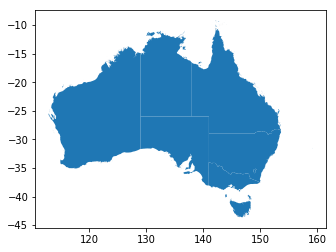

In [38]:
#Check 'aus_map'
aus_map.plot()

<h4>World</h4>

In [39]:
#Declaire shp file path
path = 'Datasets/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

#Read shape file data into a geopandas DataFrame
world_map = gpd.read_file(path)[['ADMIN', 'geometry']]

#Check import
world_map.columns = ['Country', 'geometry']

world_map.head()

Country  \
0                         Fiji   
1  United Republic of Tanzania   
2               Western Sahara   
3                       Canada   
4     United States of America   

                                            geometry  
0  (POLYGON ((180 -16.06713266364245, 180 -16.555...  
1  POLYGON ((33.90371119710453 -0.950000000000000...  
2  POLYGON ((-8.665589565454809 27.65642588959236...  
3  (POLYGON ((-122.84 49.00000000000011, -122.974...  
4  (POLYGON ((-122.84 49.00000000000011, -120 49....

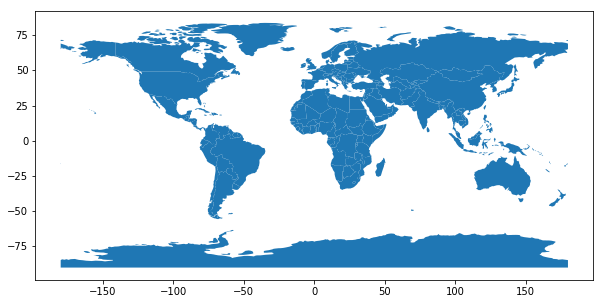

In [40]:
world_map.plot(figsize = (10, 10))

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 4. Exploratory data analysis

This is the main part of the project. Include code, plots, and detailed explanation of your analysis of the data. Be sure to include enough detail so that anyone can follow and understand what you are doing.

__Create as many code, markdown and raw cells as needed__

<h3>International Visitors - Country of Origin</h3>

In [41]:
# Function 'get_n' returns the top or bottom n countries ranked by number of visitors to Australia
#   The function requires:
#     n: integer
#     option: String- 'top' or 'bottom'
#     df: DataFrame


def get_n(n, option ,df):
    
    op = option
    if option == 'top':
        option = False
    elif option =='bottom':
        option = True
    else: 
         return 'Error - Specify top or bottom only'
        
    df = pd.DataFrame({f'Count for {op} {n} countries': df.iloc[:, 1:].sum().astype(int).sort_values(ascending = option).head(n)})
    df.index.name = 'Country'        
    df.reset_index(level=0, inplace=True)
    df.index.name = 'Rank'
    df.index += 1
    return df

In [42]:
# find top 10 countries
get_n(10, 'top', inbound_by_country)

Country  Count for top 10 countries
Rank                                                      
1                  New Zealand                    26132900
2                UK, CIs & IOM                    16007100
3                        Japan                    15885300
4     United States of America                    12625500
5                        China                    10976000
6                    Singapore                     7382800
7                     Malaysia                     5294100
8                 Korea, South                     5240900
9                    Hong Kong                     4349500
10                     Germany                     4134300

In [43]:
# find bottom 10 countries
get_n(10, 'bottom', inbound_by_country)

#Note: The dataset does not include all countries. Countries with low counts of visitors are not included in the data.

Country  Count for bottom 10 countries
Rank                                             
1             Iran                         128300
2         Colombia                         140200
3       Bangladesh                         140500
4           Mexico                         157100
5         Pakistan                         164800
6          Vanuatu                         193000
7           Greece                         214400
8     Saudi Arabia                         215700
9           Poland                         226400
10           Chile                         234800

In [44]:
# Function get_difference returns the rank difference for a country in the top countries to visit Australia
# The function requires:
#   year_1: Integer - First yearv 1991 - 2018
#   year_2: Integer - Second year 1991 - 2018
#   country: String - Country name

def get_difference(year_1, year_2, country, df):
    
    data_1 = pd.DataFrame(df[df['Date'].dt.year == year_1].sum().astype(int).sort_values(ascending = False))
    data_1.reset_index(level=0, inplace=True)
    
    data_2 = pd.DataFrame(df[df['Date'].dt.year == year_2].sum().astype(int).sort_values(ascending = False))
    data_2.reset_index(level=0, inplace=True)
    
    pos_1 = data_1['index'][data_1['index'] == country].index[0]
    pos_2 = data_2['index'][data_2['index'] == country].index[0]
    
    result = pos_1 - pos_2
    
    if result > 0:
        print(f'Position change from {year_1} to {year_2} for {country}: +{result} spots')
    else:
        print(f'Position change from {year_1} to {year_2} for {country}: {result} spots')

In [45]:
# get all country names in inbound_by_country
countries = inbound_by_country.iloc[:, 1:].columns

In [46]:
# loop through all countries
for country in countries:
    get_difference(1991, 2008, country, inbound_by_country)

Position change from 1991 to 2008 for New Zealand: +1 spots
Position change from 1991 to 2008 for New Caledonia: +1 spots
Position change from 1991 to 2008 for Papua New Guinea: -13 spots
Position change from 1991 to 2008 for Vanuatu: -5 spots
Position change from 1991 to 2008 for Fiji: -9 spots
Position change from 1991 to 2008 for UK, CIs & IOM: +2 spots
Position change from 1991 to 2008 for Ireland: +9 spots
Position change from 1991 to 2008 for Austria: -9 spots
Position change from 1991 to 2008 for Belgium: 0 spots
Position change from 1991 to 2008 for France: +3 spots
Position change from 1991 to 2008 for Germany: -2 spots
Position change from 1991 to 2008 for Netherlands: -2 spots
Position change from 1991 to 2008 for Switzerland: -10 spots
Position change from 1991 to 2008 for Denmark: -4 spots
Position change from 1991 to 2008 for Finland: -8 spots
Position change from 1991 to 2008 for Norway: +1 spots
Position change from 1991 to 2008 for Sweden: -6 spots
Position change from

In [47]:
# loop through all countries
for country in countries:
    get_difference(1991, 2018, country, inbound_by_country)

Position change from 1991 to 2018 for New Zealand: 0 spots
Position change from 1991 to 2018 for New Caledonia: 0 spots
Position change from 1991 to 2018 for Papua New Guinea: -15 spots
Position change from 1991 to 2018 for Vanuatu: -7 spots
Position change from 1991 to 2018 for Fiji: -8 spots
Position change from 1991 to 2018 for UK, CIs & IOM: 0 spots
Position change from 1991 to 2018 for Ireland: +5 spots
Position change from 1991 to 2018 for Austria: -16 spots
Position change from 1991 to 2018 for Belgium: -1 spots
Position change from 1991 to 2018 for France: +1 spots
Position change from 1991 to 2018 for Germany: -7 spots
Position change from 1991 to 2018 for Netherlands: -4 spots
Position change from 1991 to 2018 for Switzerland: -12 spots
Position change from 1991 to 2018 for Denmark: -7 spots
Position change from 1991 to 2018 for Finland: -15 spots
Position change from 1991 to 2018 for Norway: -2 spots
Position change from 1991 to 2018 for Sweden: -12 spots
Position change fro

<h4>Visualising Country of Origin</h4>

The mean number of visitors per country a month from January 1991 to October 2018

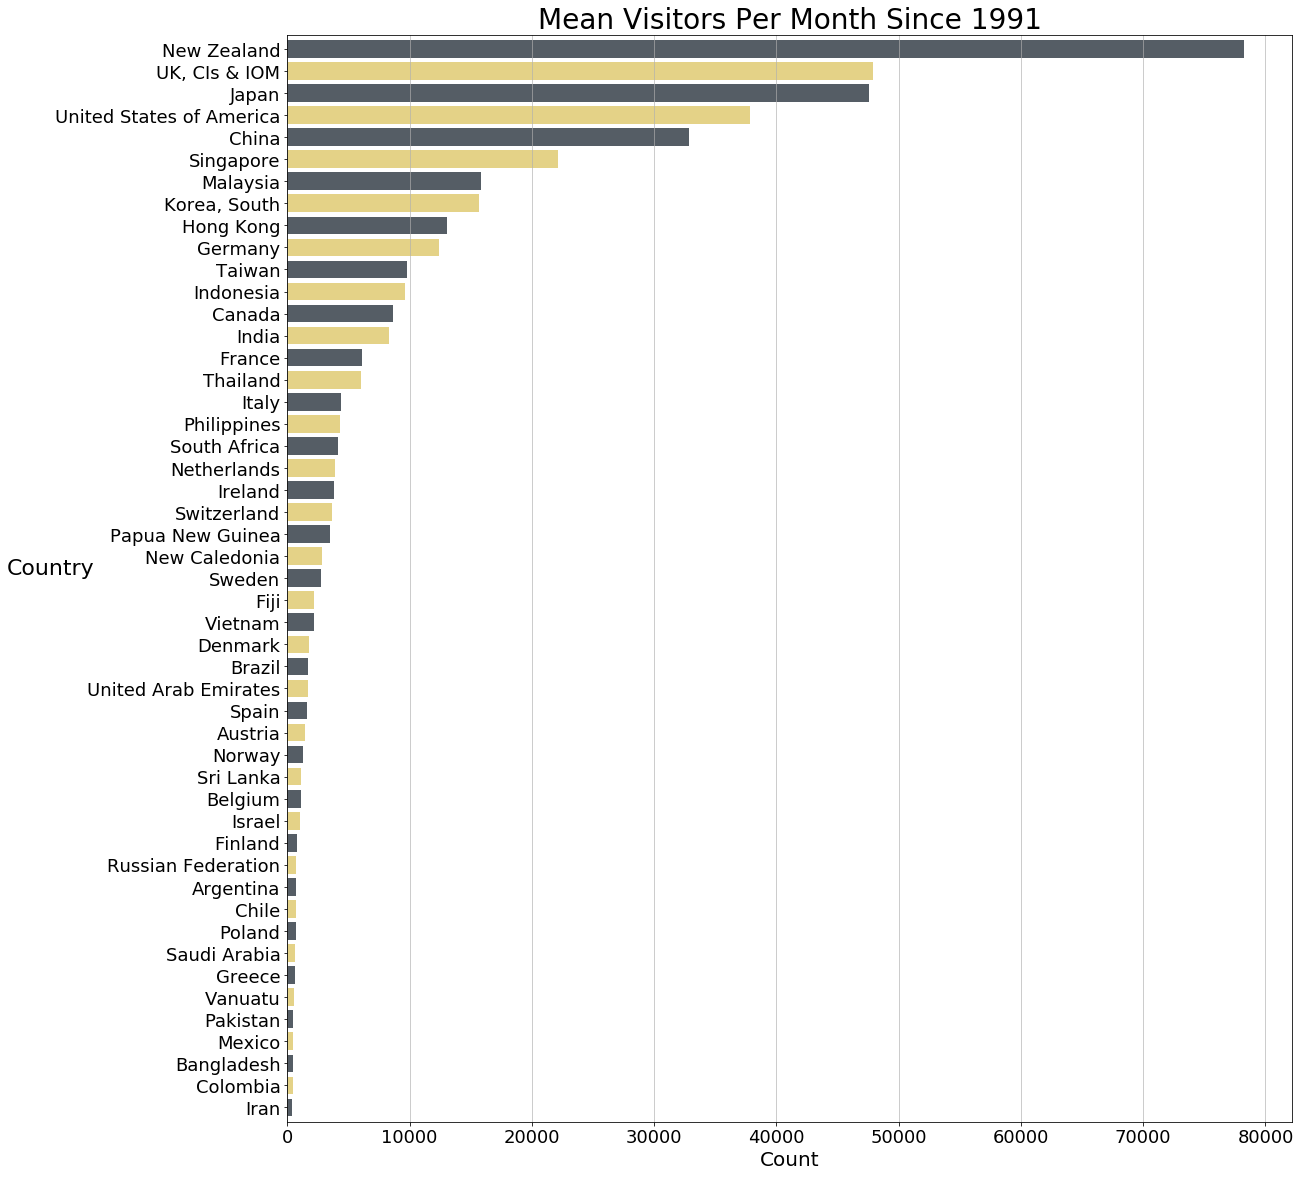

In [48]:
inbound_by_country.iloc[::, 1:].mean().astype(int).sort_values(ascending = True).plot(kind = 'barh',figsize = (18, 20), rot = 0, fontsize = 18, legend = False, width = 0.8, color=['#424B54', '#E1CE7A'], alpha=0.9)
plt.title("Mean Visitors Per Month Since 1991", fontsize = 28)
plt.xlabel("Count", fontsize = 20)
plt.ylabel("Country", fontsize = 22, rotation=0)
plt.grid(axis='x', alpha = 0.8)
plt.show()

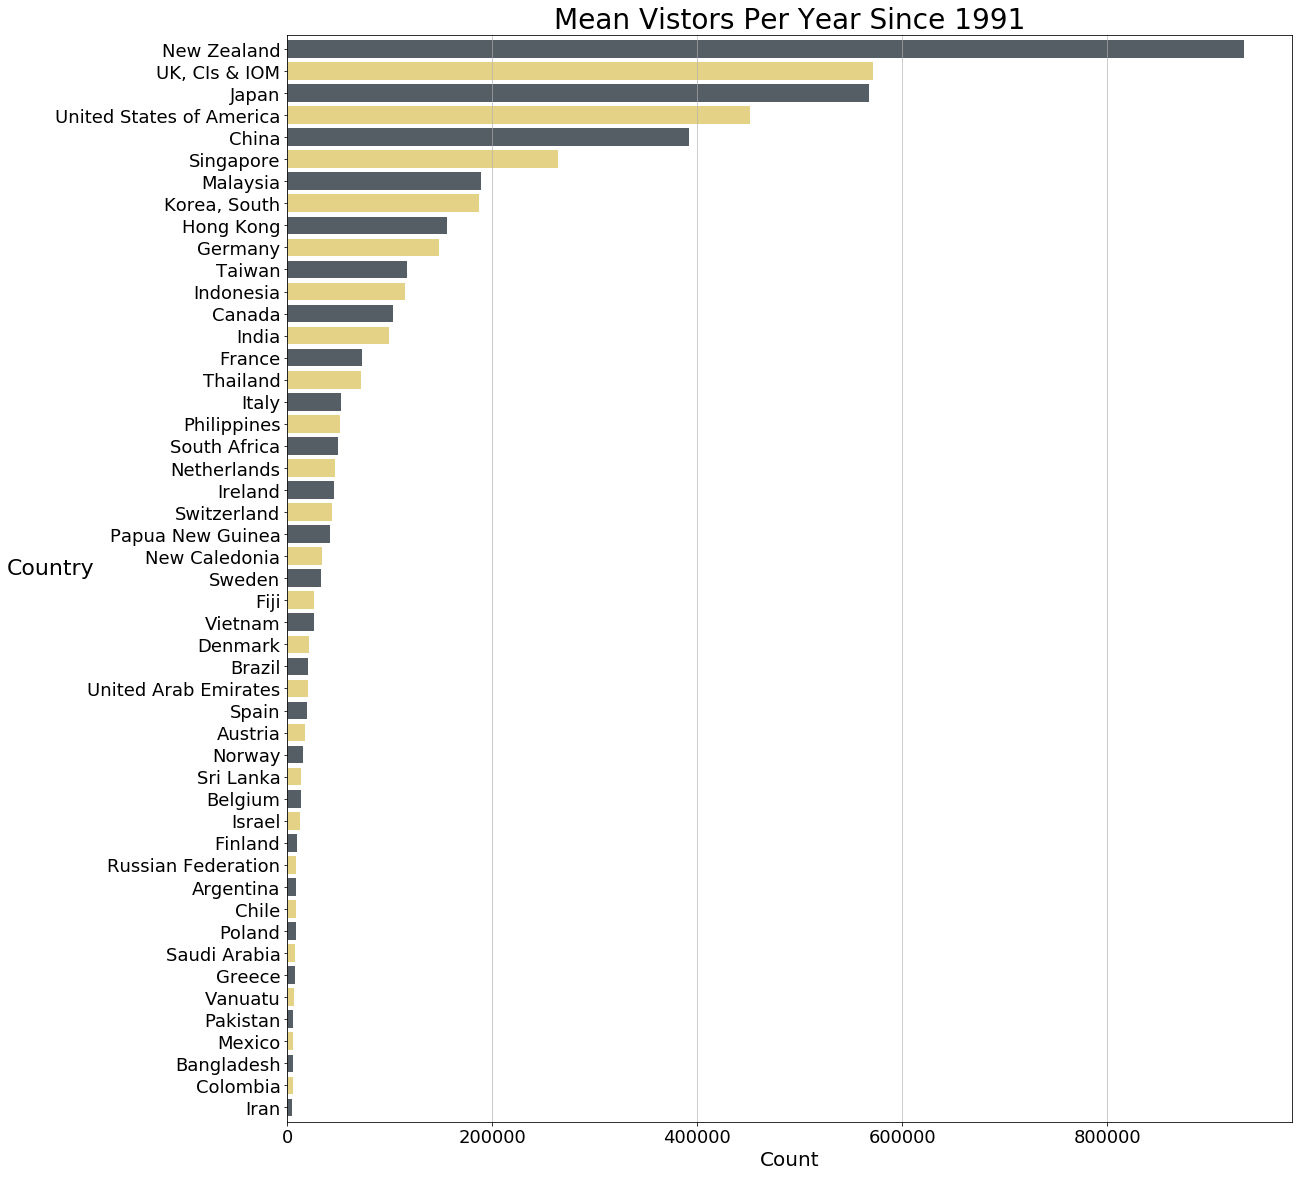

In [49]:
x = inbound_by_country.iloc[::, 1:].groupby(inbound_by_country.Date.dt.year).sum().astype(int)
plt.title("Mean Vistors Per Year Since 1991", fontsize = 28)
plt.xlabel("Count", fontsize = 20)
plt.ylabel("Country", fontsize = 22, rotation=0)
x.mean().sort_values(ascending=True).plot(kind='barh', figsize=(18, 20), rot=0, fontsize=18, legend=False, width=0.8, color=['#424B54', '#E1CE7A'], alpha=0.9)
plt.grid(axis='x', alpha = 0.8)
plt.show()

Plot of the total number of visitors per country from January 1991 to October 2018

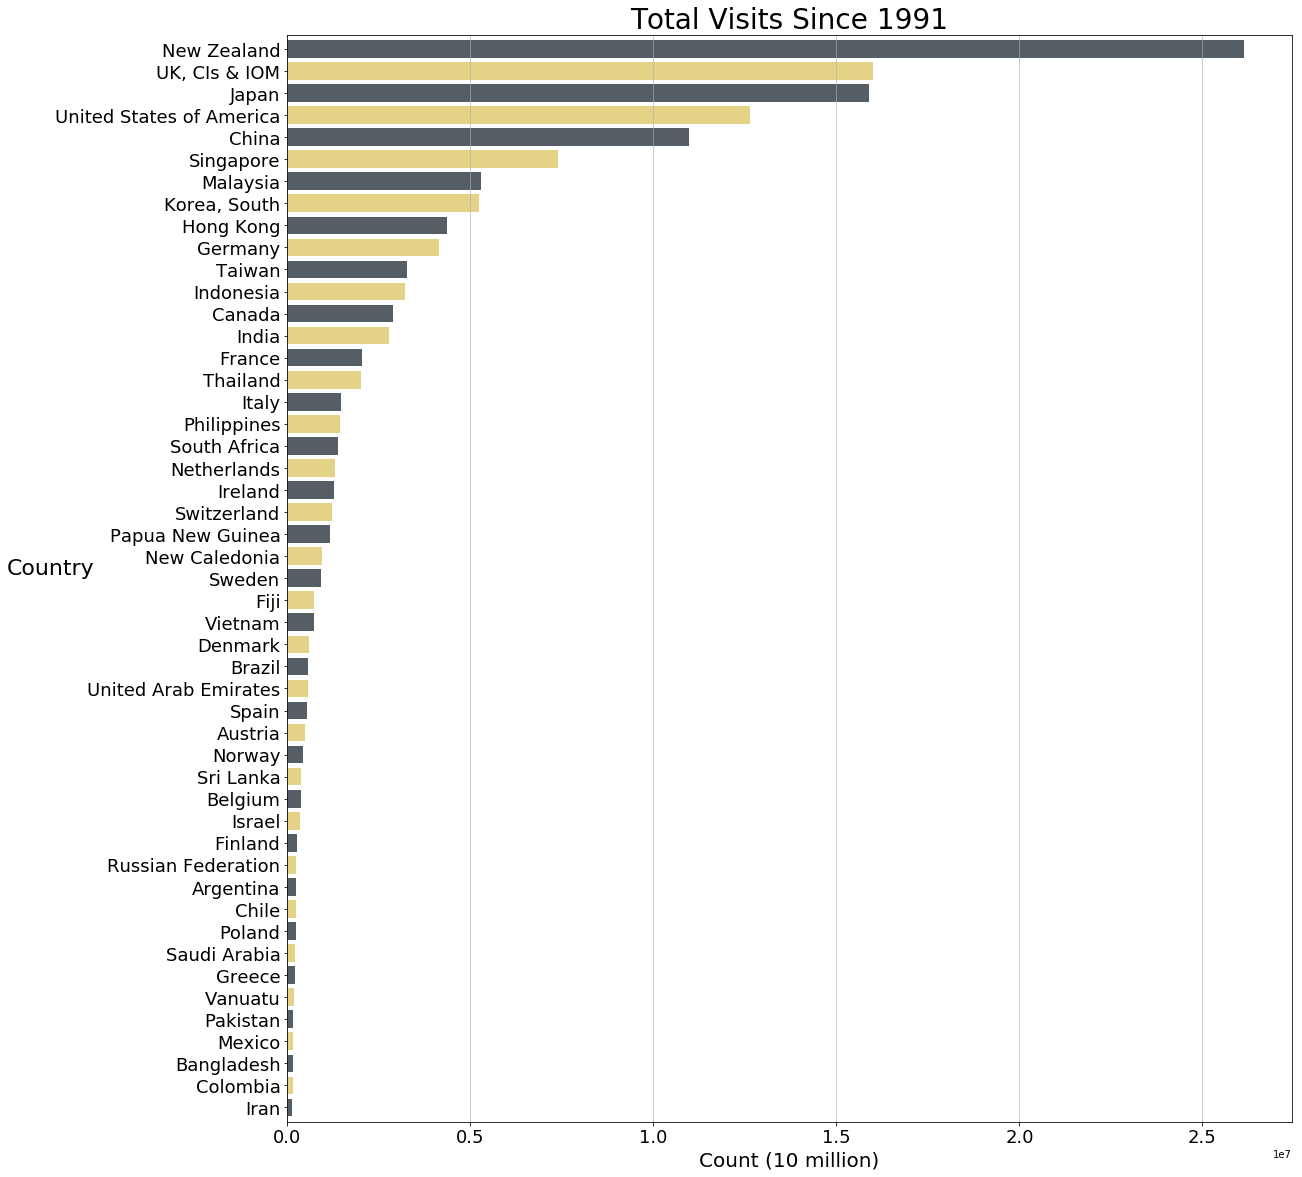

In [50]:
plt.title("Total Visits Since 1991", fontsize = 28)
plt.xlabel("Count (10 million)", fontsize = 20)
plt.ylabel("Country", fontsize = 22, rotation=0)

inbound_by_country.iloc[::, 1:].sum().astype(int).sort_values(ascending = True).plot(kind = 'barh',figsize = (18, 20), rot = 0, fontsize = 18, legend = False, width = 0.8, color=['#424B54', '#E1CE7A'], alpha=0.9)
plt.grid(axis='x', alpha = 0.8)
plt.show()


Modify 'inbound_countries_only' DataFrame to merge with GeoDataFrame 'world_map'

In [51]:
# melt state columns into single column State
inbound_by_country_2 = inbound_by_country.melt(id_vars = ['Date'], var_name = 'Country', value_name = 'Count')

# check changes
inbound_by_country_2.head()

Date      Country  Count
0 1991-01-01  New Zealand  26100
1 1991-02-01  New Zealand  26600
2 1991-03-01  New Zealand  37300
3 1991-04-01  New Zealand  32000
4 1991-05-01  New Zealand  44500

In [52]:
# merge
inbound_world_map = gpd.GeoDataFrame(world_map.merge(inbound_by_country_2))

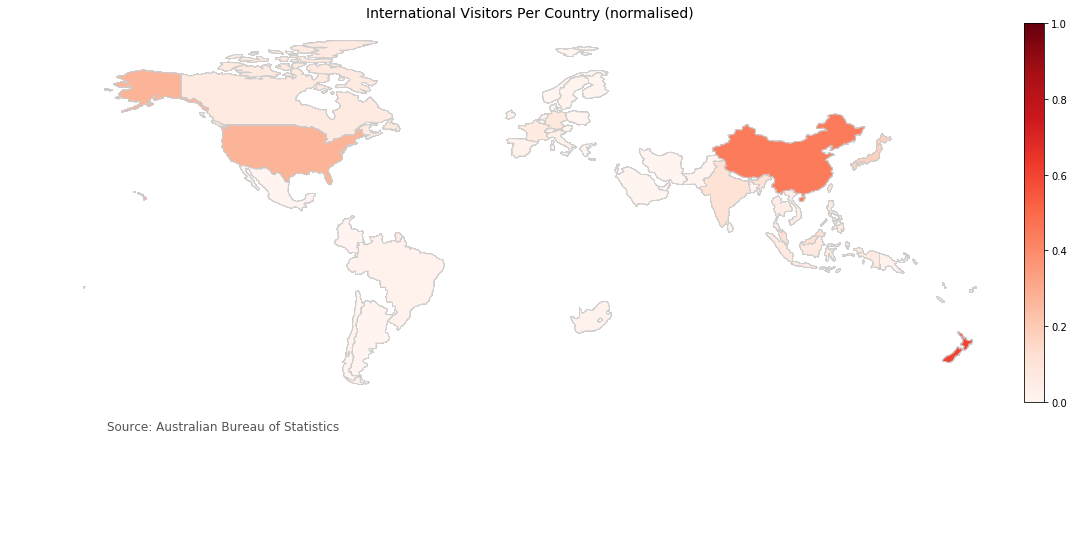

In [53]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# declare Plot
plt.figure(figsize=(18, 18))
ax = plt.gca()

# set title
ax.set_title('International Visitors Per Country (normalised)', fontdict={'fontsize':'14','fontweight':'3'})

# remvoe y and x axis
ax.axis('off')

# annotation with source
ax.annotate('Source: Australian Bureau of Statistics', xy=(0.1, .25), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# declare colour map
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=1))
    
# array for the data range
sm._A = []


divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="2%", pad=0.05)

# plot colour bar
plt.colorbar(sm, cax=cax)
    
# get data
inbound_world_map.plot(column='Count', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

# show plot
plt.show()

<h3>International Visitors - Reason of Stay</h3>

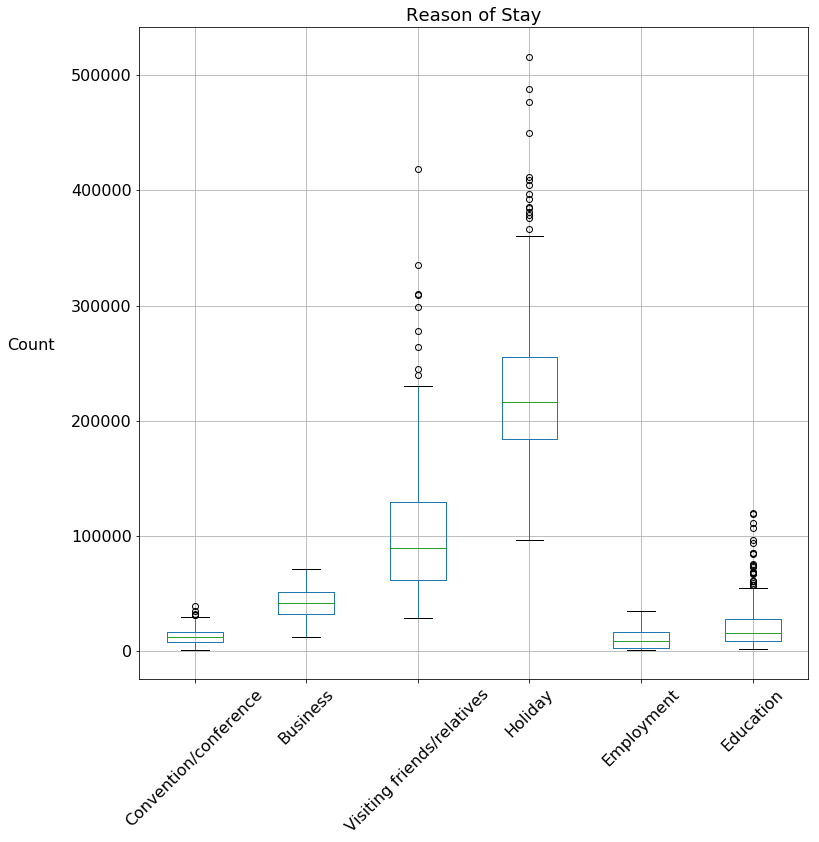

In [54]:
columns = list(reason_of_stay.iloc[::, 1:7].columns)
reason_of_stay.boxplot(column = columns, figsize = (12, 12), rot = 45, fontsize = 16)
plt.title("Reason of Stay", fontsize = 18)
plt.ylabel("Count", fontsize = 16, rotation=0, labelpad=40)
plt.show()

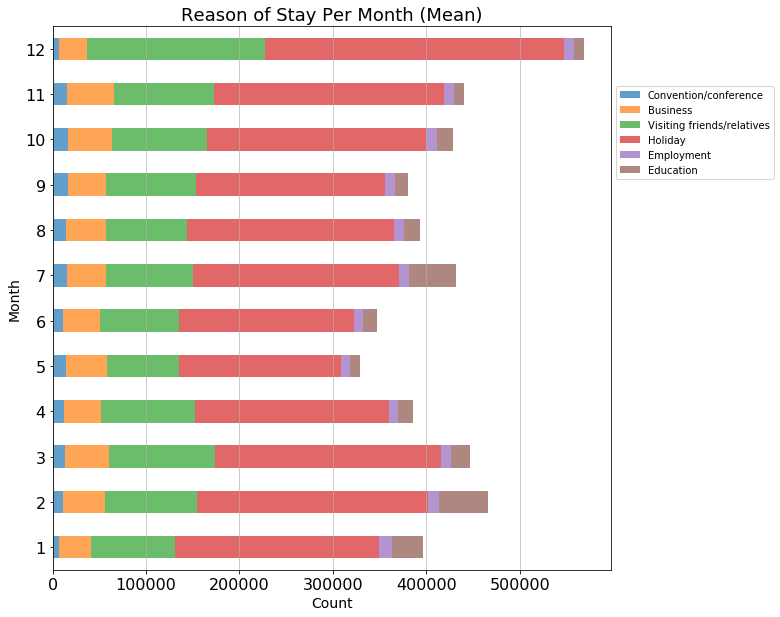

In [55]:
reason_of_stay[columns].groupby(reason_of_stay['Date'].dt.month).mean().plot(kind = 'barh', figsize = (10, 10), fontsize = 16, stacked=True, alpha=0.7)
plt.title("Reason of Stay Per Month (Mean)", fontsize = 18)
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Month", fontsize = 14)
plt.grid(axis='x', alpha = 0.8)
plt.legend(bbox_to_anchor = [1., 0.9])
plt.show()

In [56]:
# create new dataframe with normalised data
reason_normed_1 = reason_of_stay[columns].groupby(reason_of_stay['Date'].dt.month).mean()
reason_normed_1 = reason_normed_1.div(reason_normed_1.sum(axis=1), axis=0)

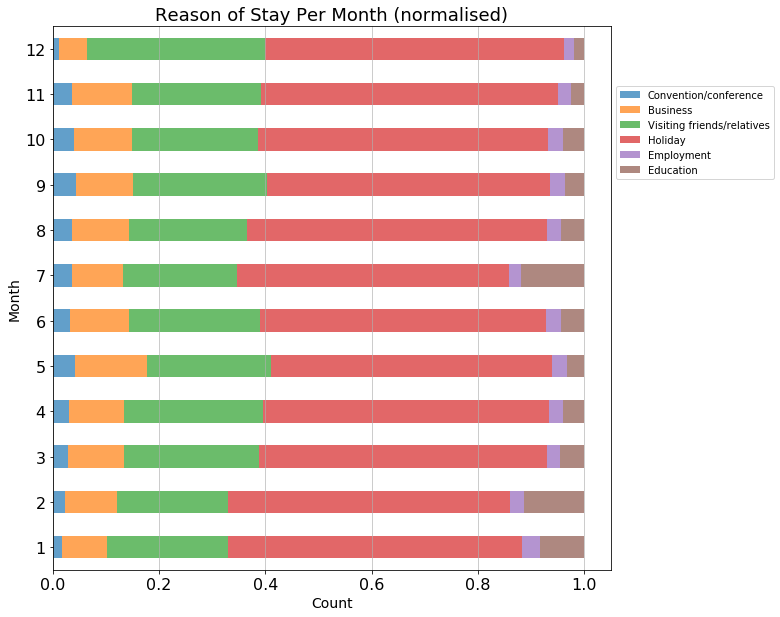

In [57]:
reason_normed_1.plot(kind = 'barh', figsize = (10, 10), fontsize = 16, stacked=True, alpha=0.7)
plt.title("Reason of Stay Per Month (normalised)", fontsize = 18)
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Month", fontsize = 14)
plt.grid(axis='x', alpha = 0.8)
plt.legend(bbox_to_anchor = [1., 0.9])
plt.show()

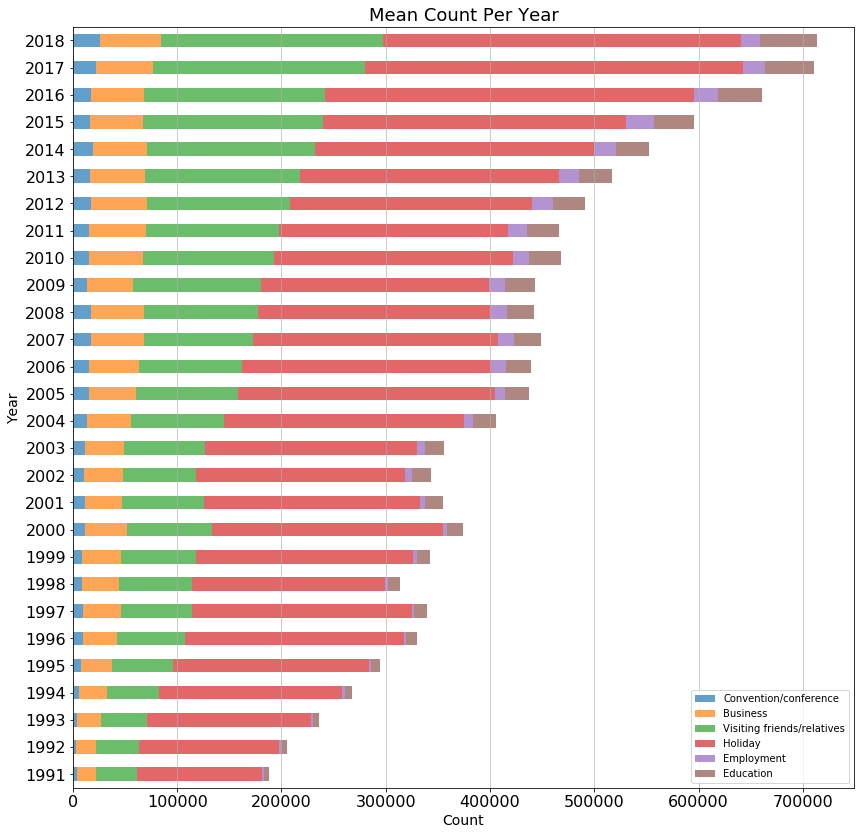

In [58]:
reason_of_stay[columns].groupby(reason_of_stay['Date'].dt.year).mean().plot(kind = 'barh', figsize = (14, 14), fontsize = 16, stacked=True, alpha=0.7)
plt.title("Mean Count Per Year", fontsize = 18)
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Year", fontsize = 14)
plt.grid(axis='x', alpha = 0.8)
plt.show()

In [59]:
reason_normed_2 = reason_of_stay[columns].groupby(reason_of_stay['Date'].dt.year).mean()
reason_normed_2 = reason_normed_2.div(reason_normed_2.sum(axis=1), axis=0)

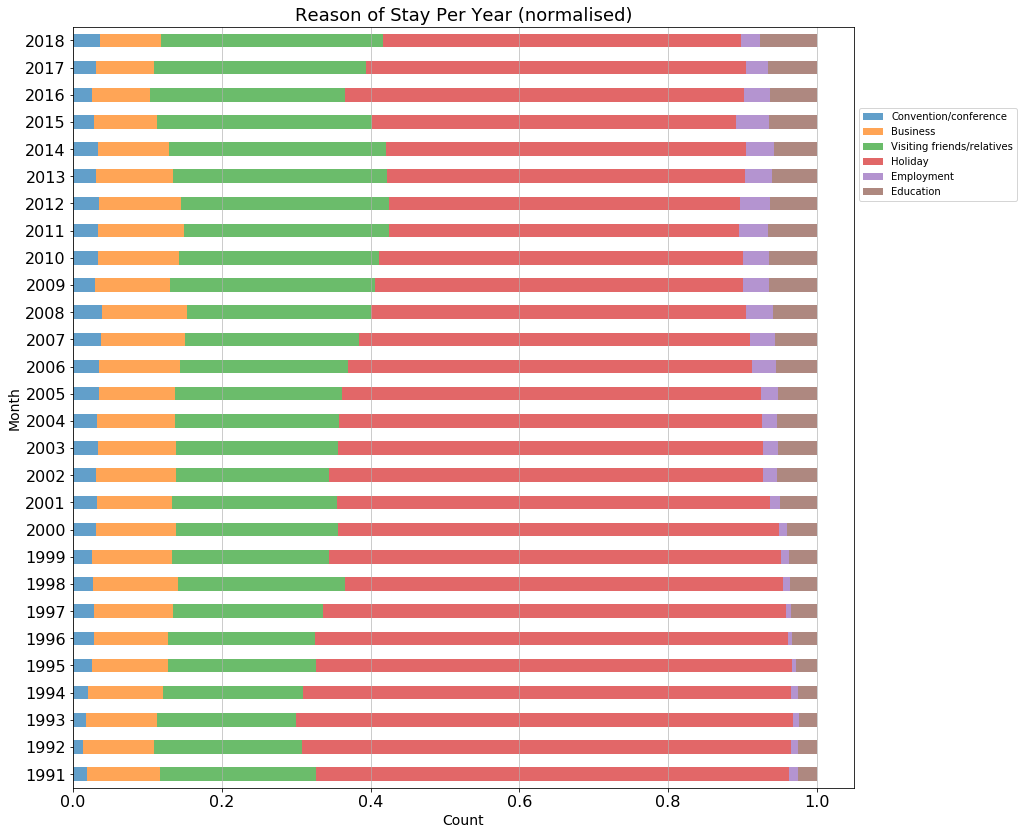

In [60]:
reason_normed_2.plot(kind = 'barh', figsize = (14, 14), fontsize = 16, stacked=True, alpha=0.7)
plt.title("Reason of Stay Per Year (normalised)", fontsize = 18)
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Month", fontsize = 14)
plt.grid(axis='x', alpha = 0.8)
plt.legend(bbox_to_anchor = [1., 0.9])
plt.show()

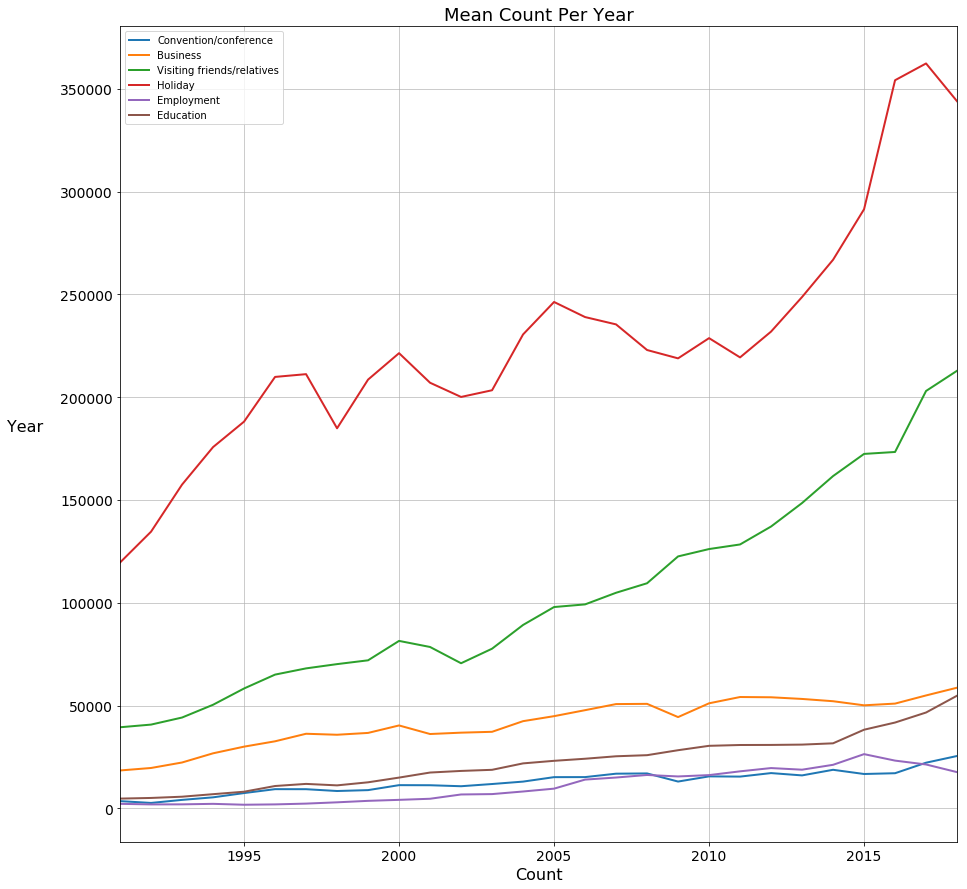

In [61]:
reason_of_stay[columns].groupby(reason_of_stay['Date'].dt.year).mean().plot(figsize = (15, 15), fontsize = 14, title = 'Mean Count Per Year', linewidth=2)
plt.title("Mean Count Per Year", fontsize = 18)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("Year", fontsize = 16, rotation=0, labelpad = 35)
plt.grid(alpha = 0.8)
plt.show()

In [62]:
# Function 'get_season_colour' returns a colour corresponding to each season for each month 1 - 12
#   If month is:
#     Summer, orange
#     Autumn, brown
#     Winter, blue
#     Spring, green

def get_season_colour(row):
    if row['Date'].month == 1 or row['Date'].month == 2 or row['Date'].month == 12:
        return 'orange'
    elif row['Date'].month == 3 or row['Date'].month == 4 or row['Date'].month == 5:
            return 'brown'
    elif row['Date'].month == 6 or row['Date'].month == 7 or row['Date'].month == 8:
            return 'blue'
    else:
        return 'green'

In [63]:
# Add 'Colour' column for each season for graphing purposes

reason_of_stay['Colour'] = reason_of_stay.apply(get_season_colour, axis = 1)

In [64]:
# Function 'reason_of_stay_plot' 

def reason_of_stay_plot(start, end, reason, season):
    
    # store dates
    date_1 = start
    date_2 = end
    
    #Declare start and end points
    start = reason_of_stay[reason_of_stay['Date'] == start].index[0]
    end = reason_of_stay[reason_of_stay['Date'] == end].index[0]
    
    #Declare plot
    fig, ax = plt.subplots(figsize=(16, 8))
    
    #Get Data from input variables 'start' to 'end' 
    ax.plot(reason_of_stay['Date'].iloc[start:end], reason_of_stay[reason].iloc[start:end], linewidth = 2, color = 'black')
    
    #Set plot x-axis limits
    plt.xlim(reason_of_stay['Date'].iloc[start], reason_of_stay['Date'].iloc[end])
    
    #Add legend to plot
    #ax.legend(loc=1, prop={'size': 14})
    
    # add title and labels
    plt.title(f"{reason}: {date_1} to {date_2}", fontsize = 18)
    plt.xlabel("Date", fontsize = 16)
    plt.ylabel("Count", fontsize = 16, rotation=0, labelpad=35)
    plt.grid(axis='y', alpha = 1)

    #Add seasons 
    
    if season == True:
        for i in range(start, end):
            ax.axvspan(reason_of_stay['Date'].iloc[i], reason_of_stay['Date'].iloc[i+1], ymin=0, ymax=1000, color=reason_of_stay['Colour'].iloc[i], alpha=0.2)
            
        #Declare string for text box
        textstr = 'Orange: Summer | Brown: Autumn | Blue: Winter | Green: Spring'
        #Text-box styling
        props = dict(boxstyle='round', facecolor='white', alpha=1)

        #Place text-box in upper left in axes coords
        ax.text(0.02, 0.96, textstr, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)


In [65]:
reasons = list(reason_of_stay.iloc[::, 1:7].columns)

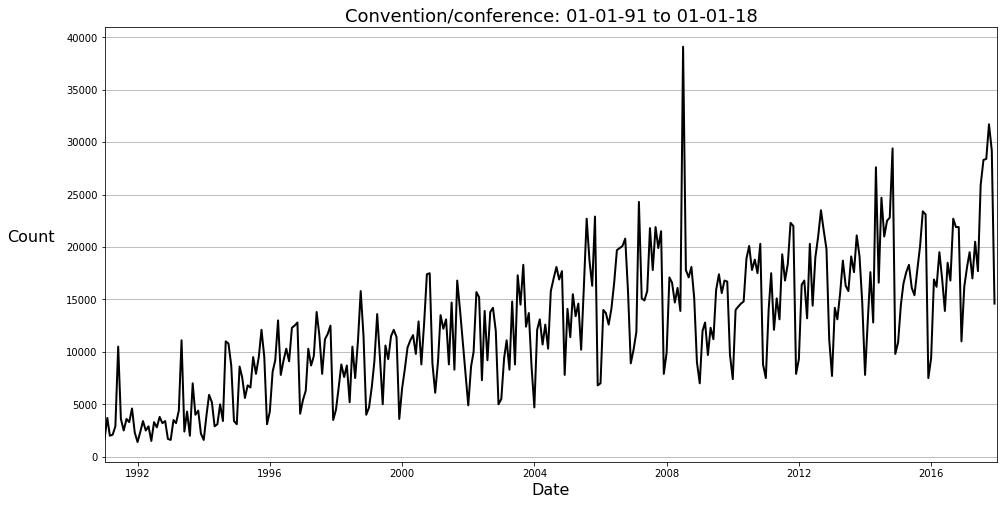

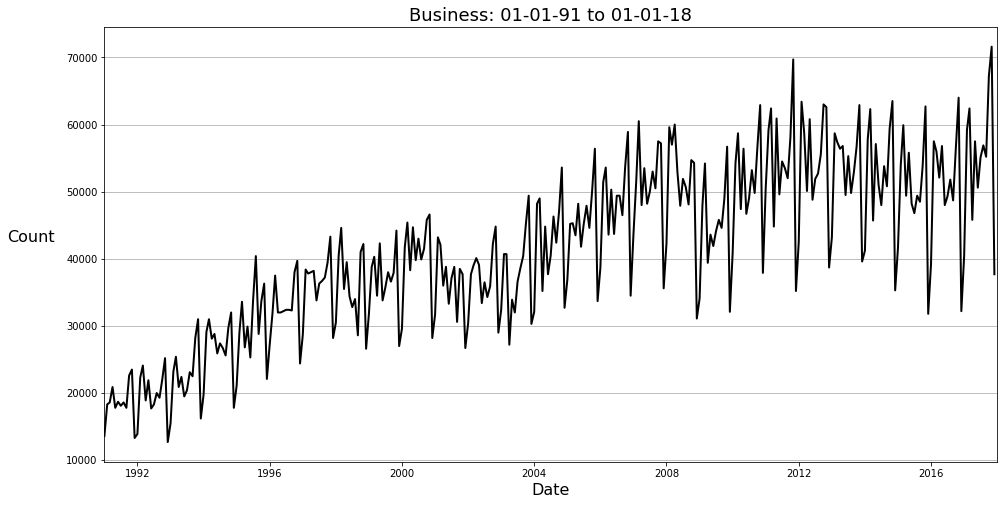

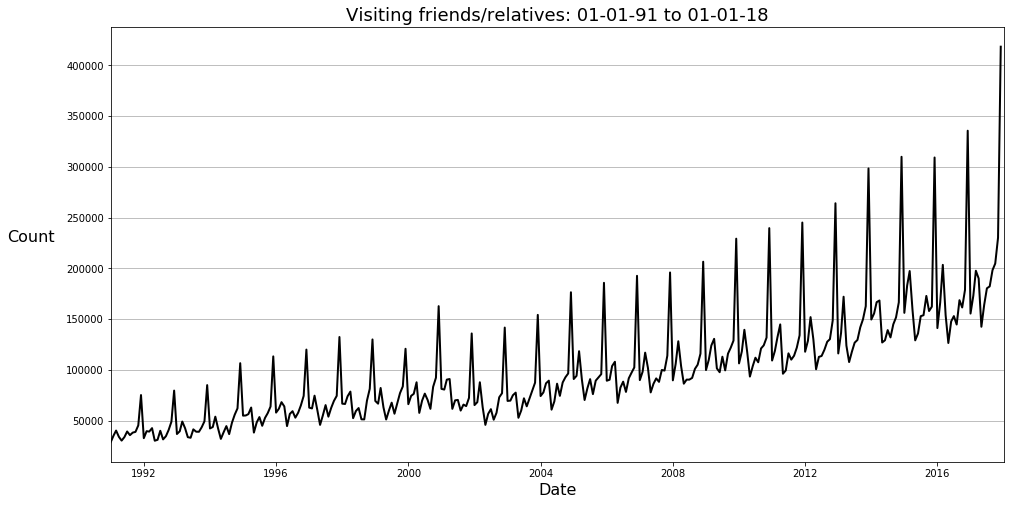

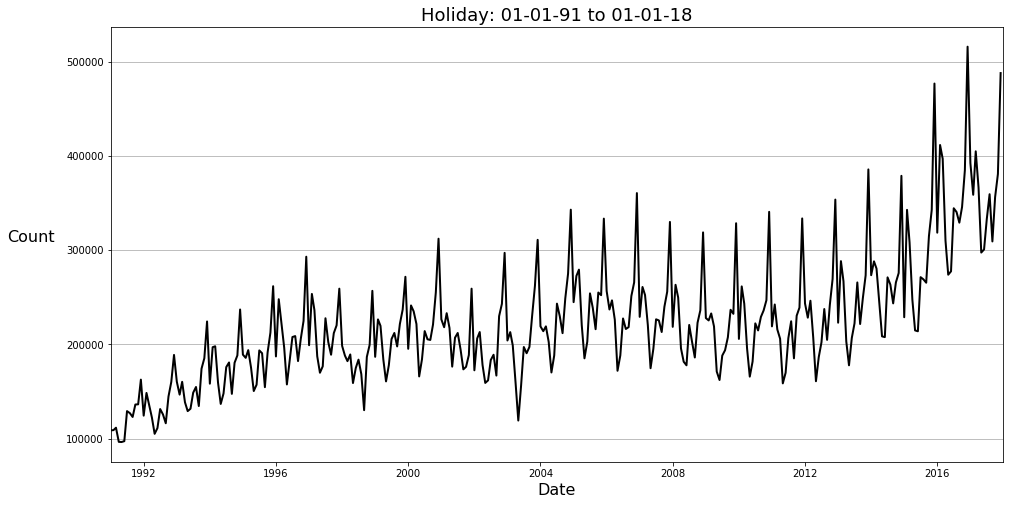

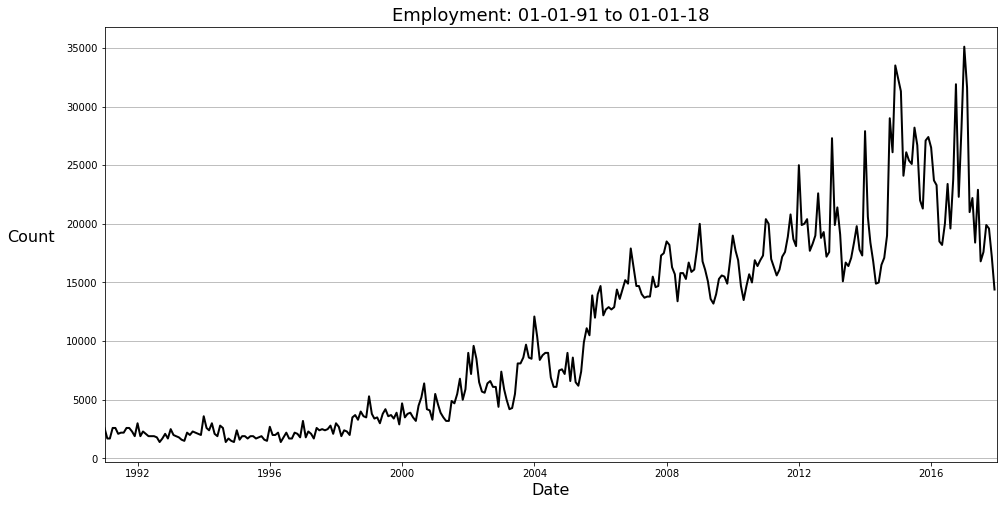

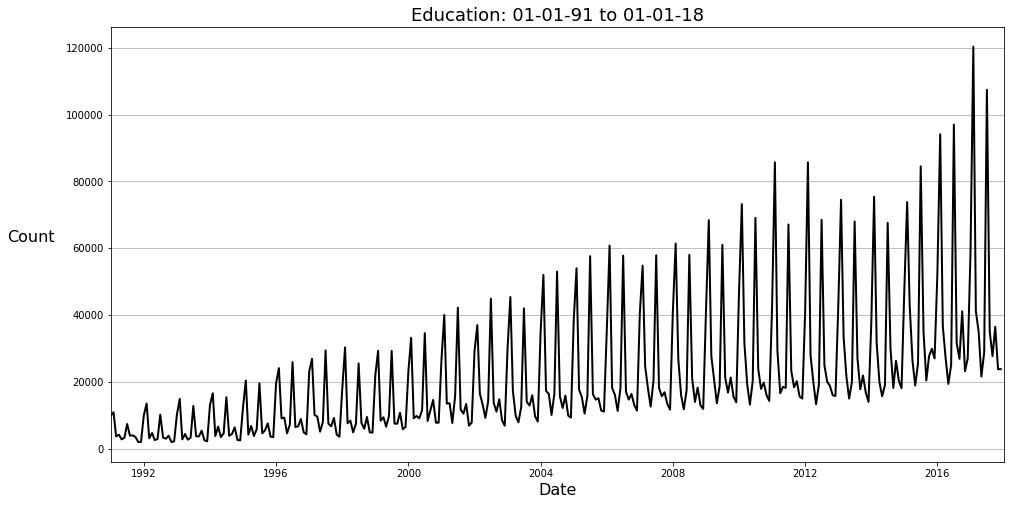

In [66]:
# reason of stay from 1991 to 1996
for reason in reasons:
    reason_of_stay_plot('01-01-91', '01-01-18', reason, False)

<h4>Reason of Stay: A Closer Look</h4>

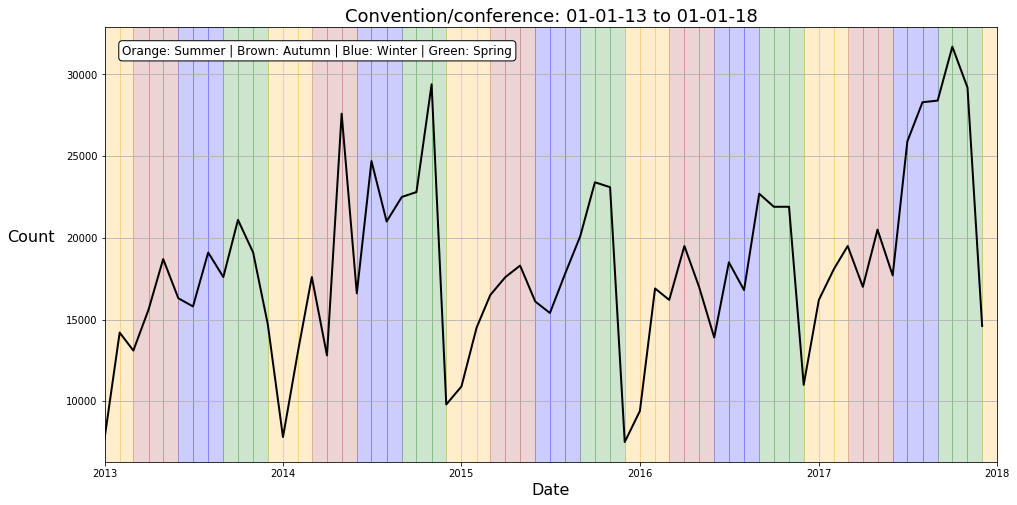

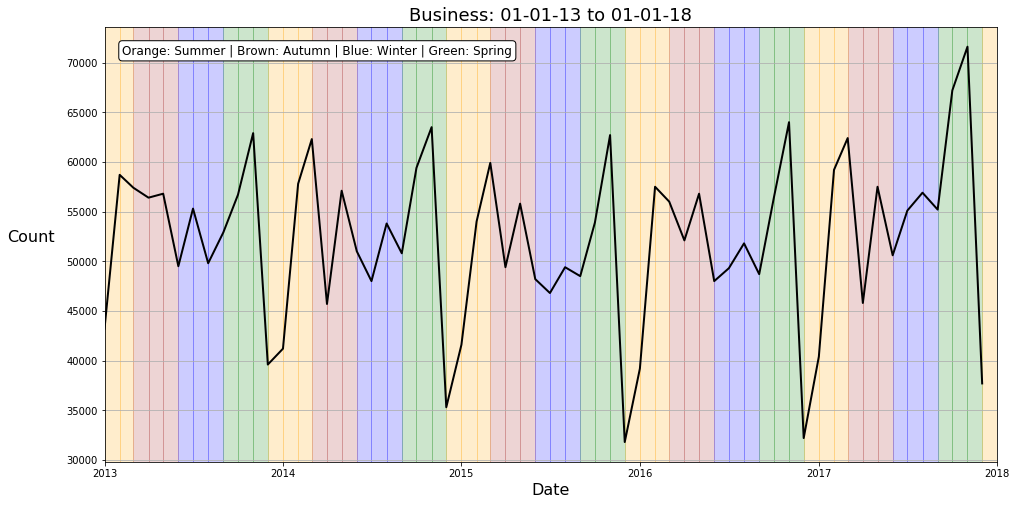

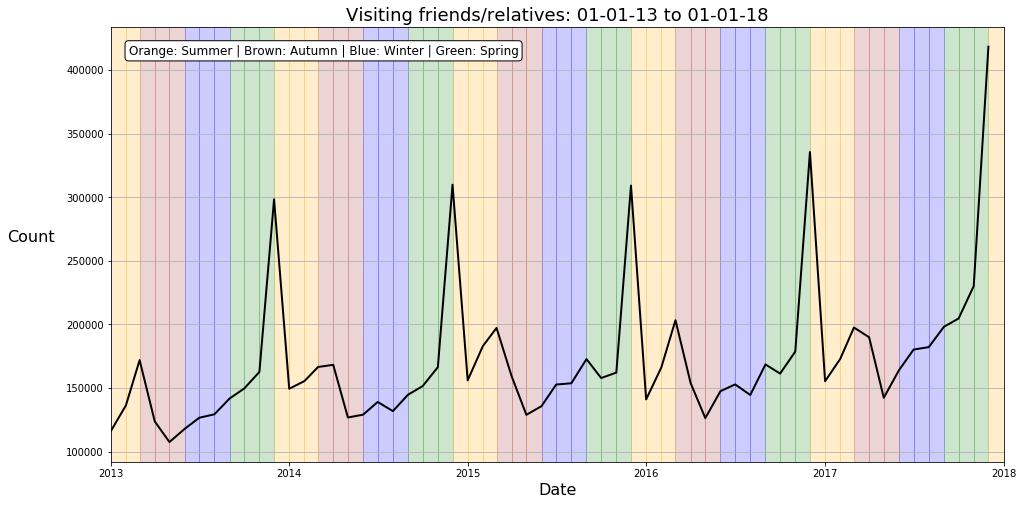

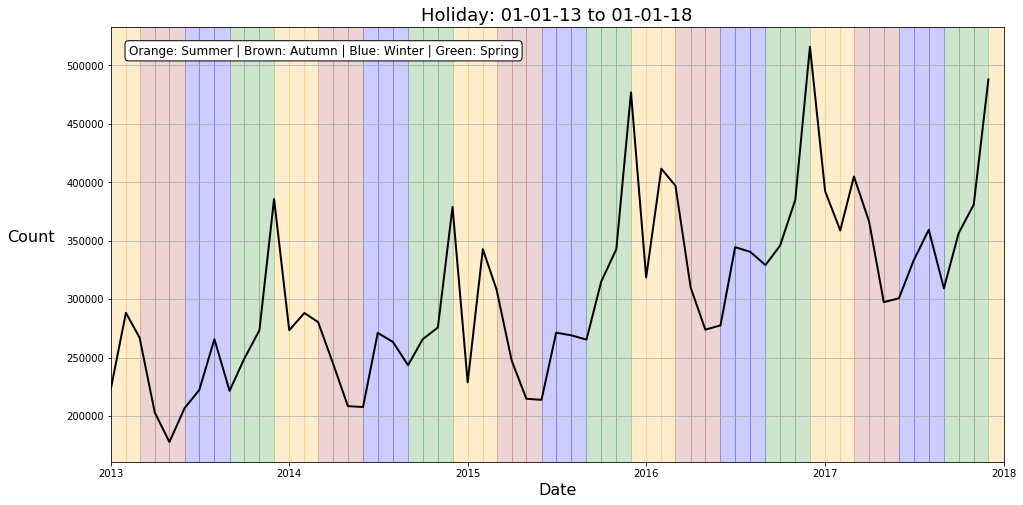

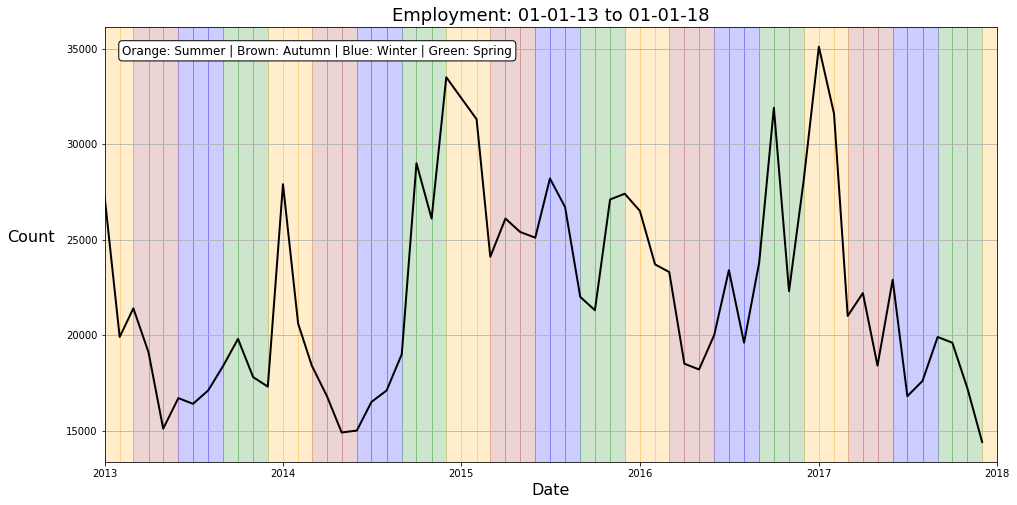

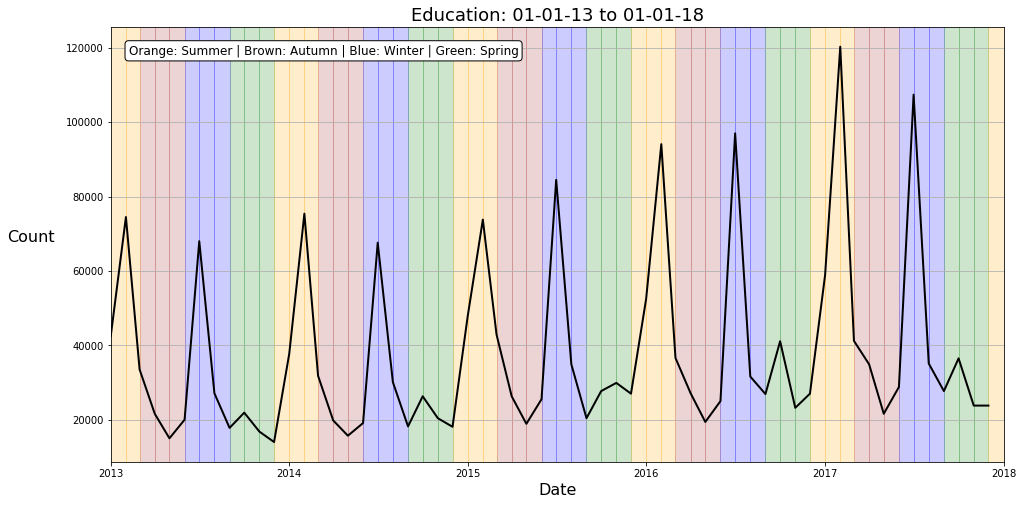

In [67]:
# reason of stay from 1991 to 1996
for reason in columns:
    reason_of_stay_plot('01-01-13', '01-01-18', reason, True)

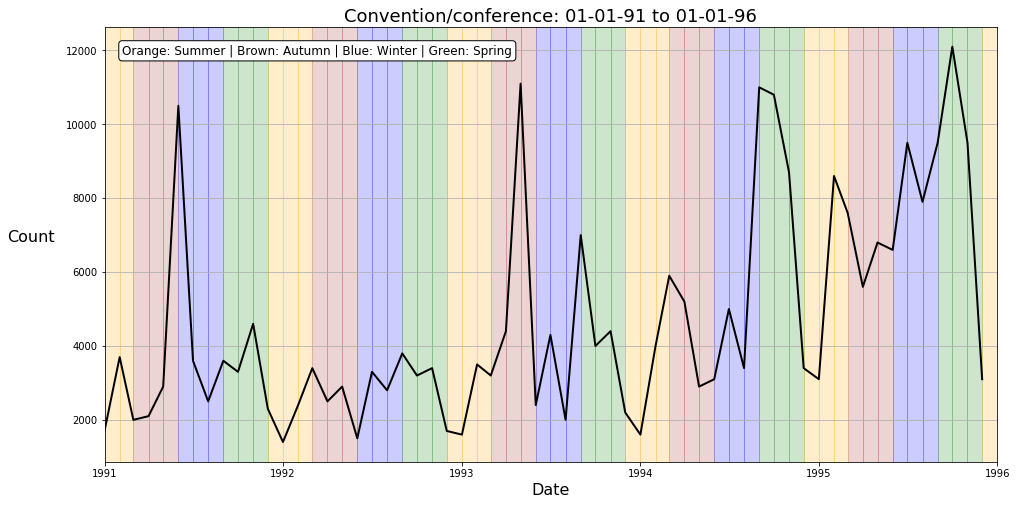

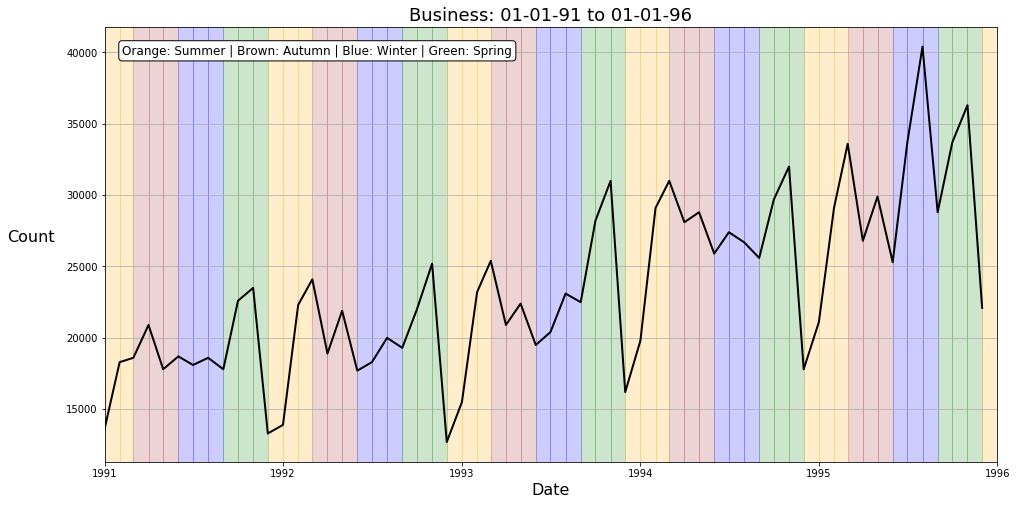

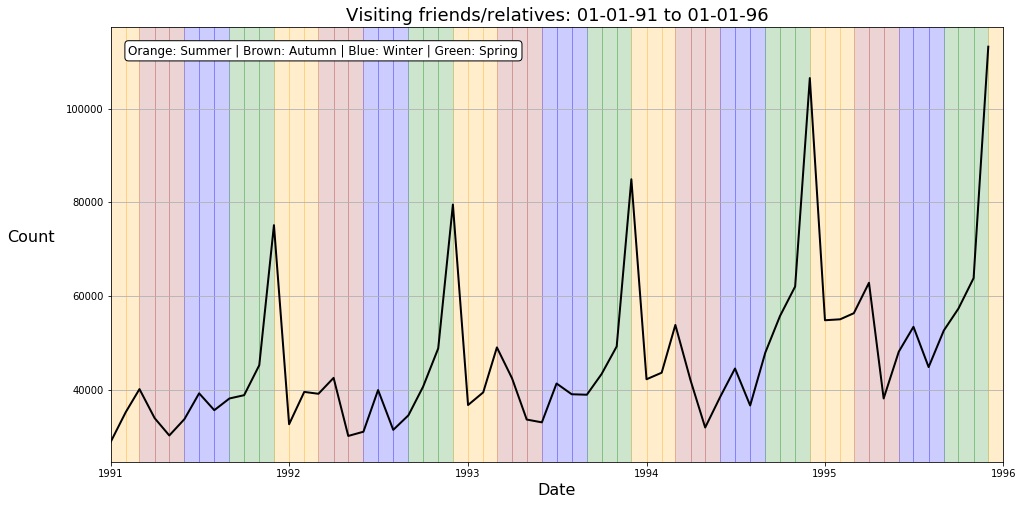

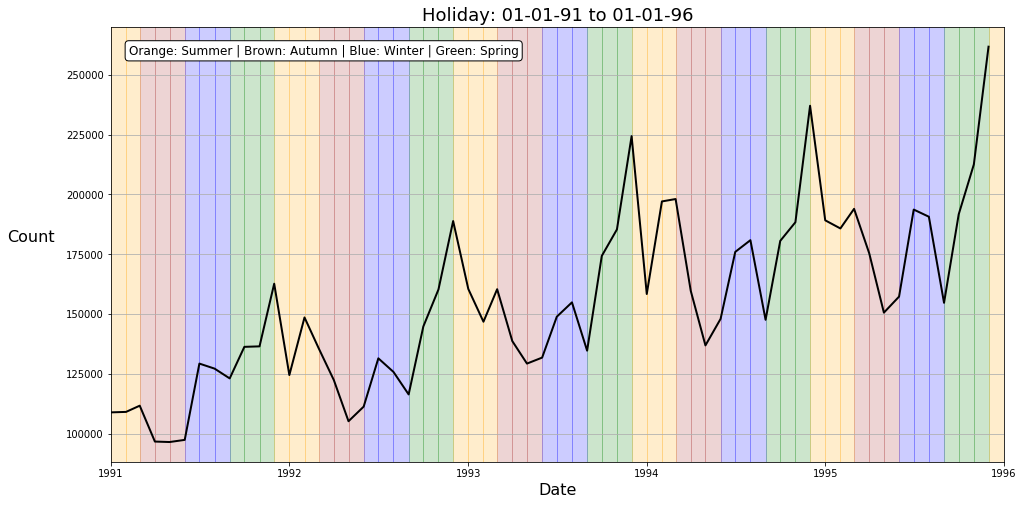

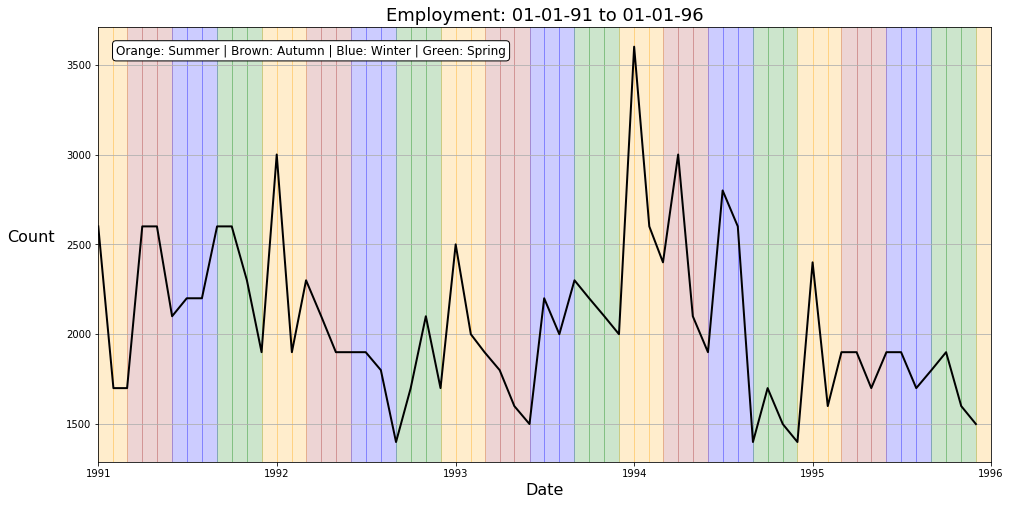

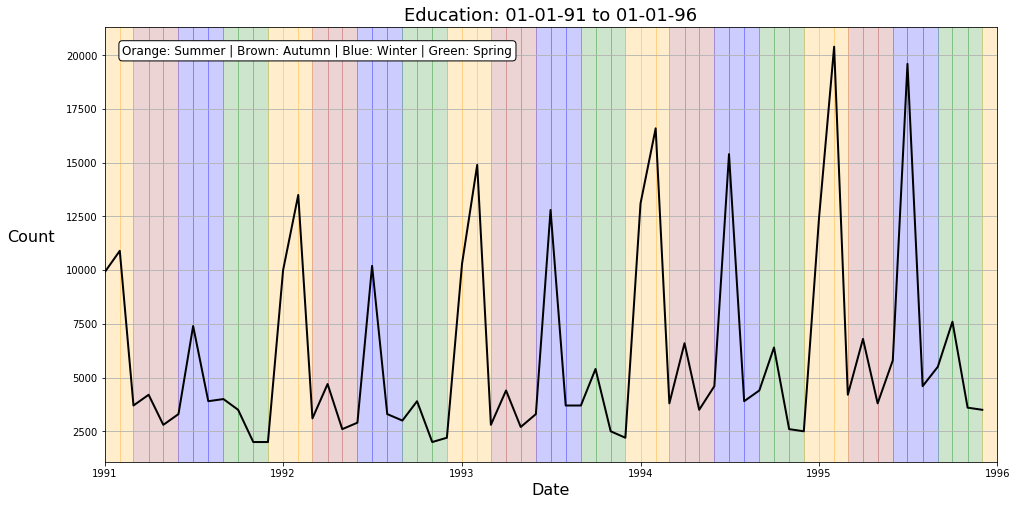

In [68]:
for reason in columns:
    reason_of_stay_plot('01-01-91', '01-01-96', reason, True)

Unsurprisingly 'Holiday' peaks in Decemeber, the start of summer for every year.

<h3>International Visitors - Length of Stay</h3>

In [69]:
length_of_stay.describe()

Under 1 week  1 and under 2 weeks  2 weeks and under 1 month  \
count     334.000000           334.000000                 334.000000   
mean   130011.077844        122470.658683               89549.700599   
std     42584.588459         40168.704014               41637.977690   
min     42500.000000         43700.000000               30700.000000   
25%    100825.000000        100100.000000               62425.000000   
50%    127650.000000        117950.000000               84400.000000   
75%    156400.000000        134300.000000              102925.000000   
max    253700.000000        272700.000000              317300.000000   

       1 and under 2 months  2 and under 3 months  3 and under 6 months  \
count            334.000000            334.000000            334.000000   
mean           39246.407186          14183.233533          22547.305389   
std            17080.777061           6120.586565          12174.757593   
min            13100.000000           3700.000000           5200.000000   
25%            27675.000000           9625.000000          13225.000000   
50%            35750.000000          13500.000000          19850.000000   
75%            46650.000000          17600.000000          30075.000000   
max           117200.000000          36100.000000          74900.000000   

       6 and under 12 months  Total (Duration of stay in days)  
count             334.000000                      3.340000e+02  
mean            24139.520958                      4.421473e+05  
std             14521.296189                      1.533146e+05  
min              5200.000000                      1.614000e+05  
25%             13725.000000                      3.417000e+05  
50%             20750.000000                      4.281000e+05  
75%             31700.000000                      5.207500e+05  
max             89200.000000                      1.015000e+06

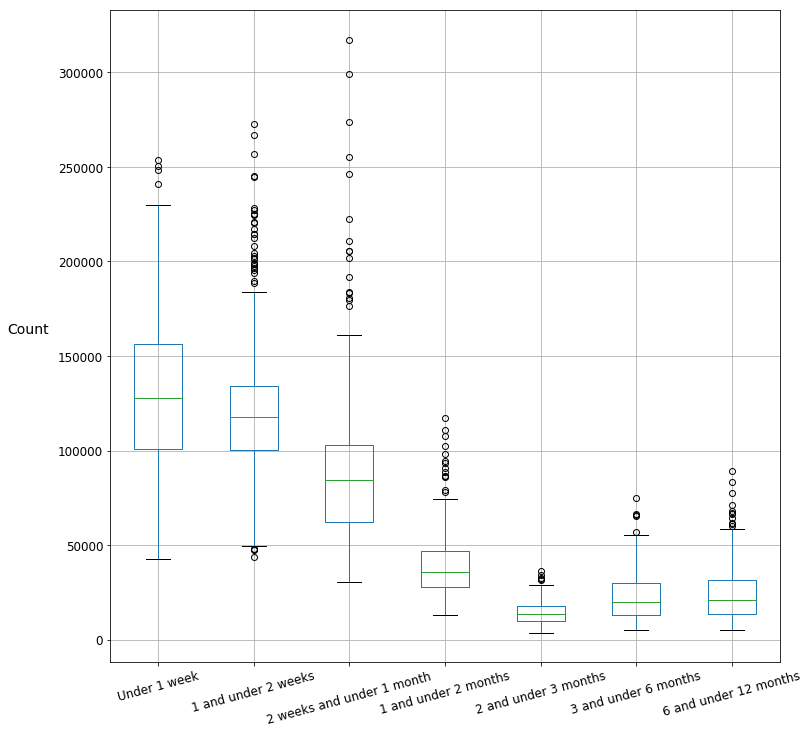

In [70]:
lengths = list(length_of_stay.iloc[::, 1:-1].columns)
length_of_stay.boxplot(column = lengths, figsize = (12, 12), rot =15, fontsize = 12)
plt.ylabel('Count', fontsize=14, rotation=0, labelpad=30)
plt.show()

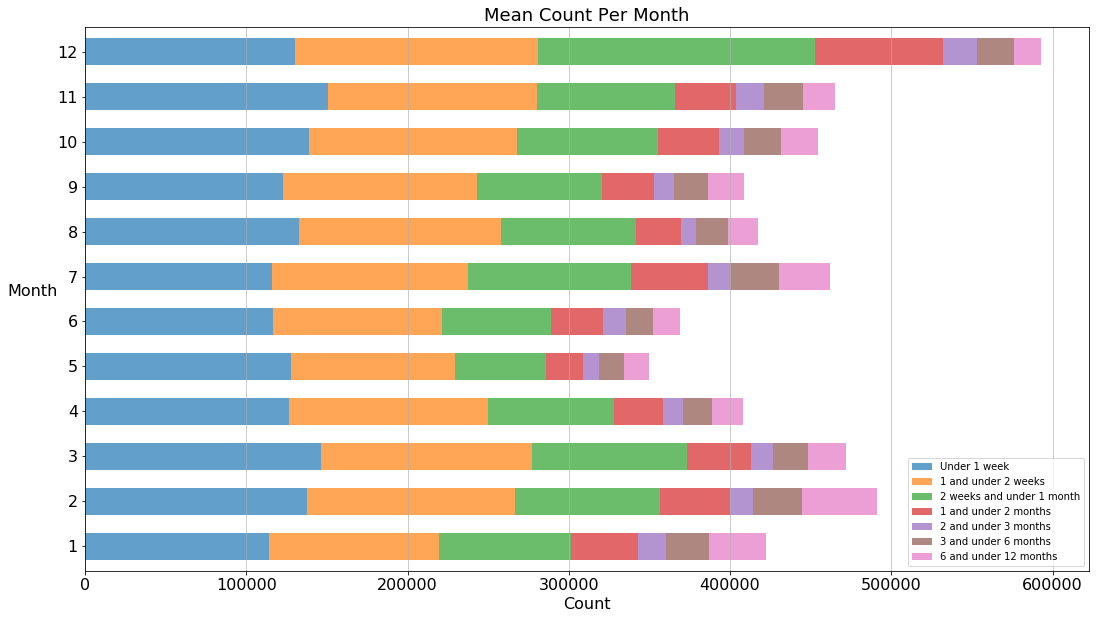

In [71]:
length_of_stay[lengths].groupby(length_of_stay['Date'].dt.month).mean().astype(int).plot(kind = 'barh', figsize = (18, 10), fontsize = 16, width = 0.6, stacked=True, alpha=0.7)
plt.title('Mean Count Per Month', fontsize = 18)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Month', fontsize=16, rotation=0, labelpad=25)
plt.grid(axis='x', alpha = 0.8)

plt.show()


In [72]:
# create new dataframe with normalised data
length_normed = length_of_stay[lengths].groupby(length_of_stay['Date'].dt.month).mean()
length_normed = length_normed.div(length_normed.sum(axis=1), axis=0)

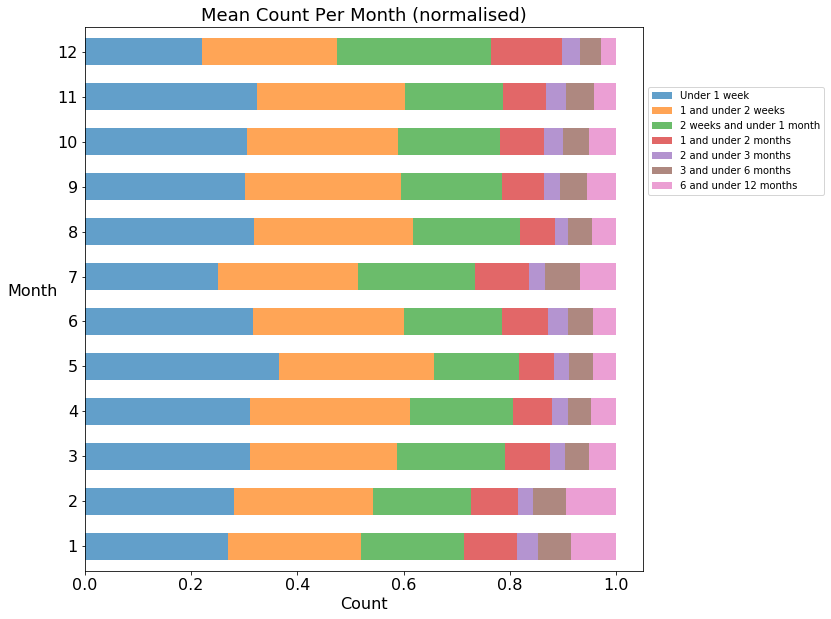

In [73]:
length_normed.plot(kind = 'barh', figsize = (10, 10), fontsize = 16, width = 0.6, stacked=True, alpha=0.7)
plt.title('Mean Count Per Month (normalised)', fontsize = 18)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Month', fontsize=16, rotation=0, labelpad=25)
plt.legend(bbox_to_anchor = [1., 0.9])
plt.show()


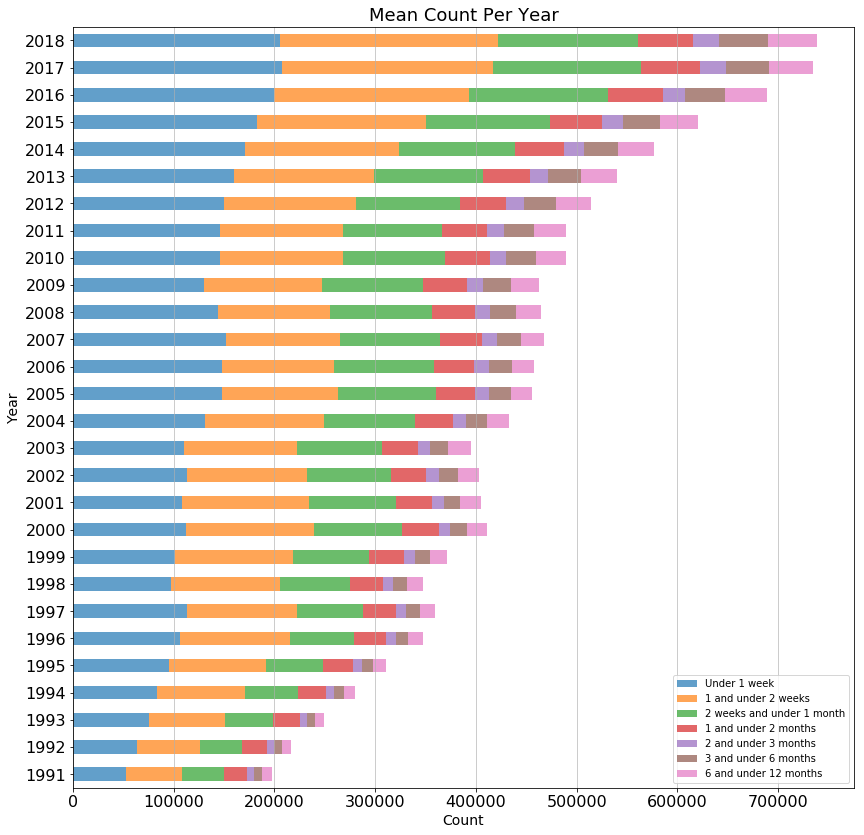

In [74]:
length_of_stay[lengths].groupby(length_of_stay['Date'].dt.year).mean().plot(kind = 'barh', figsize = (14, 14), fontsize = 16, stacked=True, alpha=0.7)
plt.title("Mean Count Per Year", fontsize = 18)
plt.xlabel("Count", fontsize = 14)
plt.ylabel("Year", fontsize = 14)
plt.grid(axis='x', alpha = 0.8)
plt.show()

In [75]:
# create new dataframe with normalised data for years
length_normed_2 = length_of_stay[lengths].groupby(length_of_stay['Date'].dt.year).mean()
length_normed_2 = length_normed_2.div(length_normed_2.sum(axis=1), axis=0)

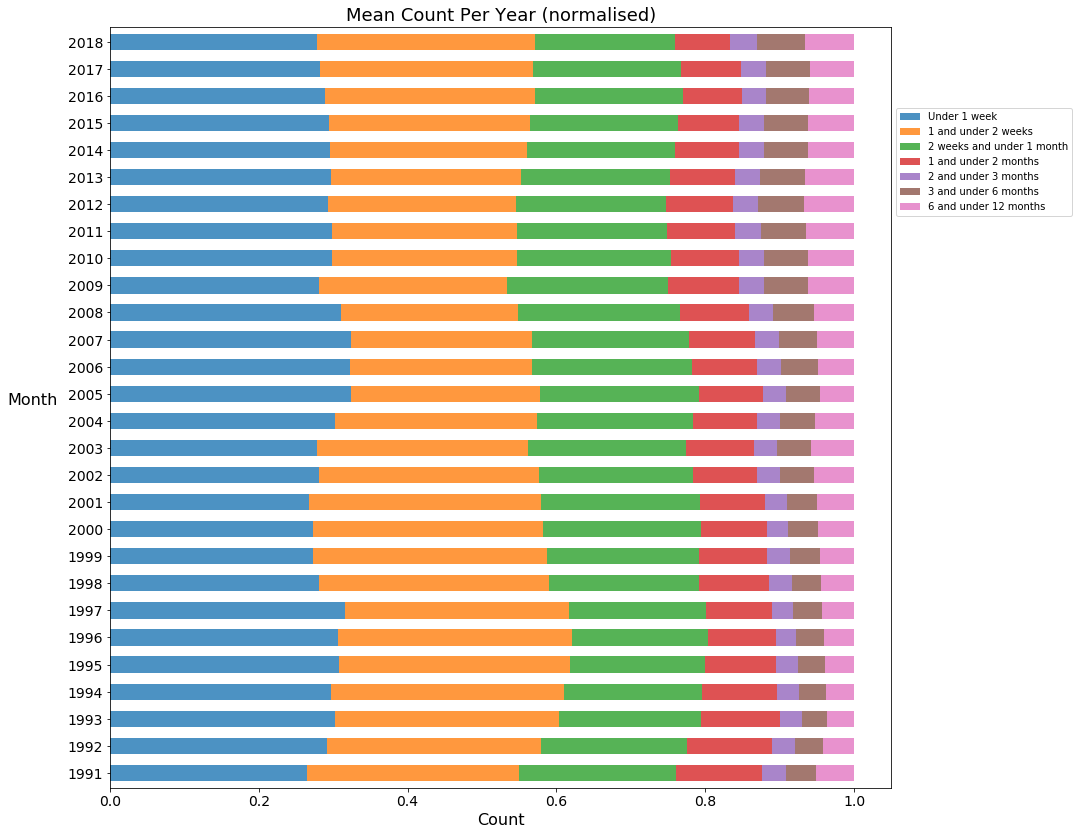

In [76]:
length_normed_2.plot(kind = 'barh', figsize = (14, 14), fontsize = 14, width = 0.6, stacked=True, alpha=0.8)
plt.title('Mean Count Per Year (normalised)', fontsize = 18)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Month', fontsize=16, rotation=0, labelpad=35)
plt.legend(bbox_to_anchor = [1., 0.9])
plt.show()


In [77]:
# Function length_of_stay_plot

def length_of_stay_plot(start, end, length, seasons):
    
    # store dates
    date_1 = start
    date_2 = end
    
    #Declare start and end points
    start = length_of_stay[length_of_stay['Date'] == start].index[0]
    end = length_of_stay[length_of_stay['Date'] == end].index[0]
    
    #Declare plot
    fig, ax = plt.subplots(figsize=(16, 8))
    
    #Get Data from input variables 'start' to 'end' 
    ax.plot(length_of_stay['Date'].iloc[start:end], length_of_stay[length].iloc[start:end], linewidth = 2, color = 'black')
    
    #Set plot x-axis limits
    plt.xlim(length_of_stay['Date'].iloc[start], length_of_stay['Date'].iloc[end])
    
    
    # add title and labels
    plt.title(f"{length}: {date_1} to {date_2}", fontsize = 18)
    plt.xlabel("Date", fontsize = 16)
    plt.ylabel("Count", fontsize = 16, rotation=0, labelpad=30)
    plt.grid(axis='y', alpha = 1)

    
    
    #Add seasons 
    if seasons == True:
    
    
        #Declare string for text box
        textstr = 'Orange: Summer | Brown: Autumn | Blue: Winter | Green: Spring'

        #Text-box styling
        props = dict(boxstyle='round', facecolor='white', alpha=1)

        #Place text-box in upper left in axes coords
        ax.text(0.02, 0.96, textstr, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)

        for i in range(start, end):
            ax.axvspan(length_of_stay['Date'].iloc[i], length_of_stay['Date'].iloc[i+1], ymin=0, ymax=1000, color=reason_of_stay['Colour'].iloc[i], alpha=0.3)

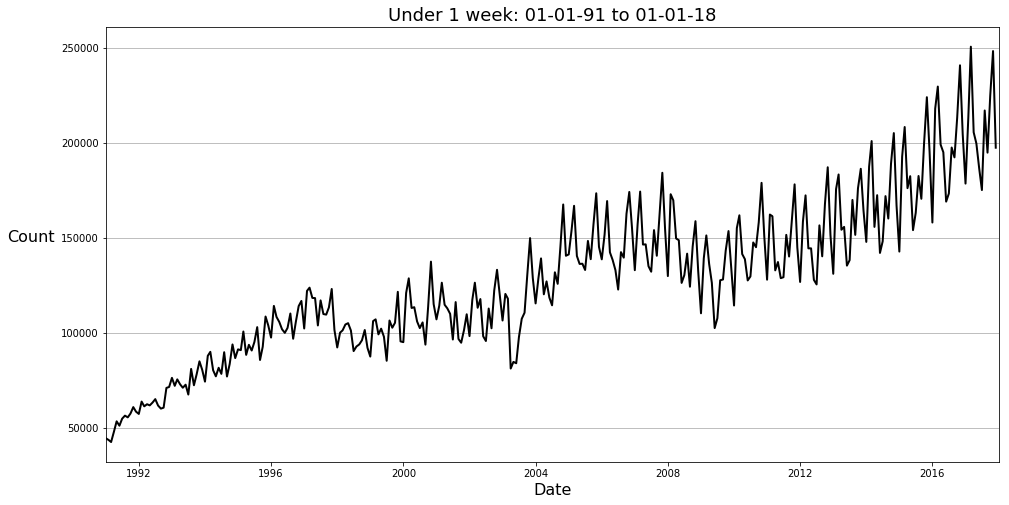

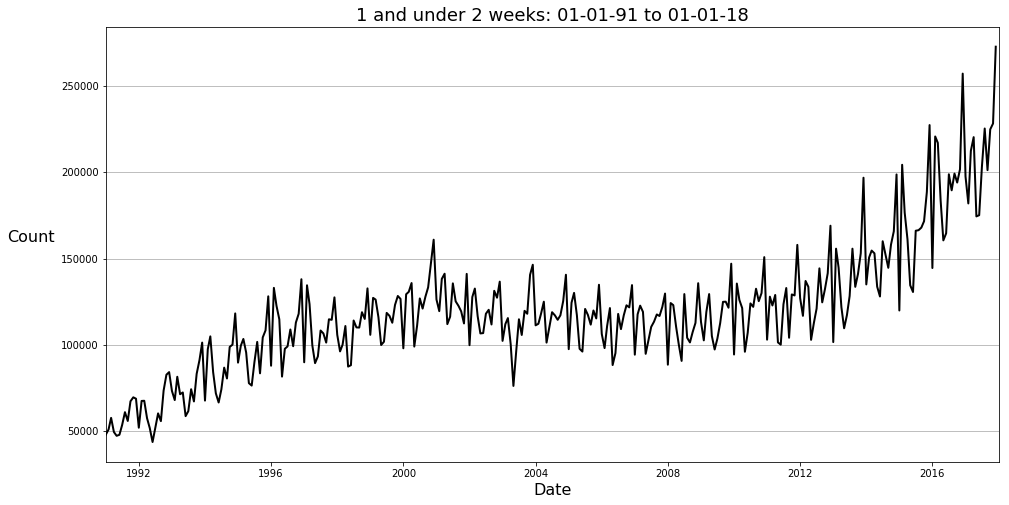

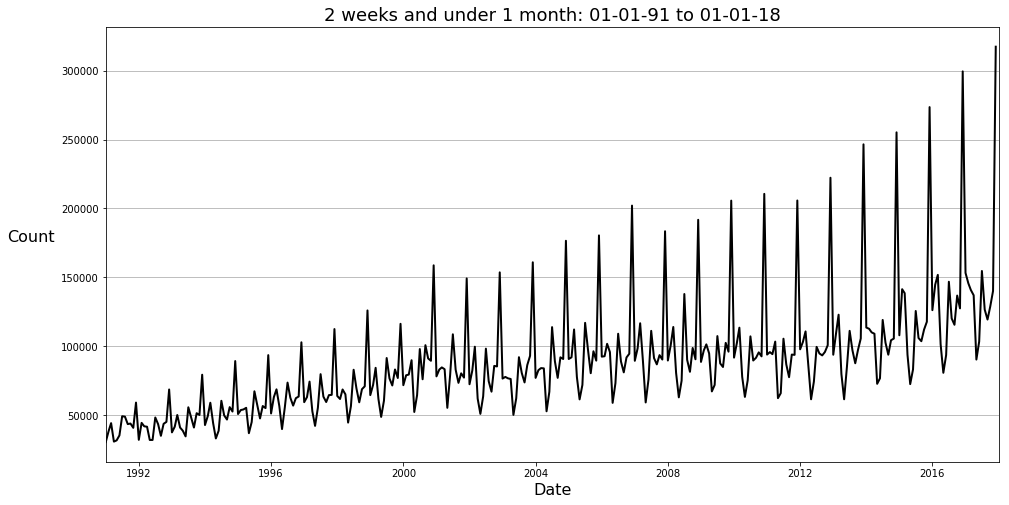

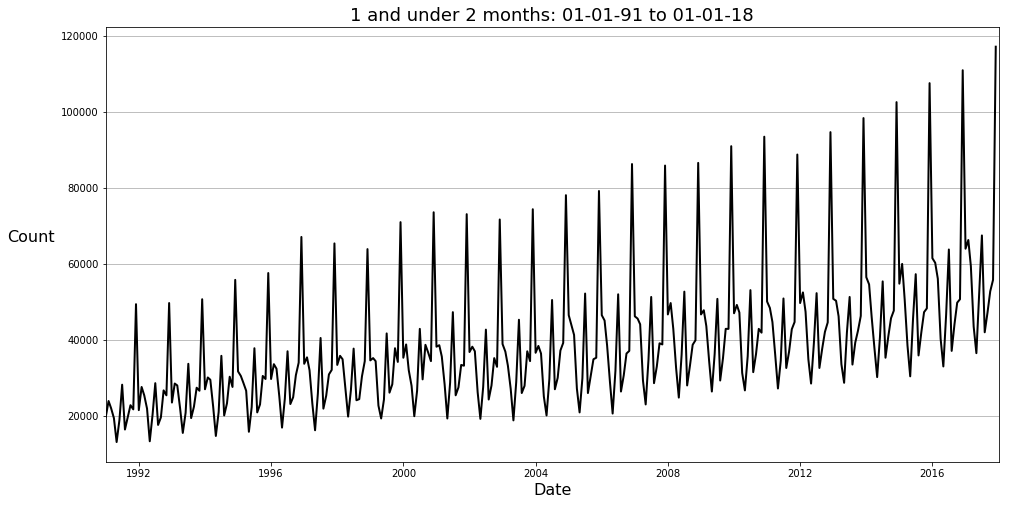

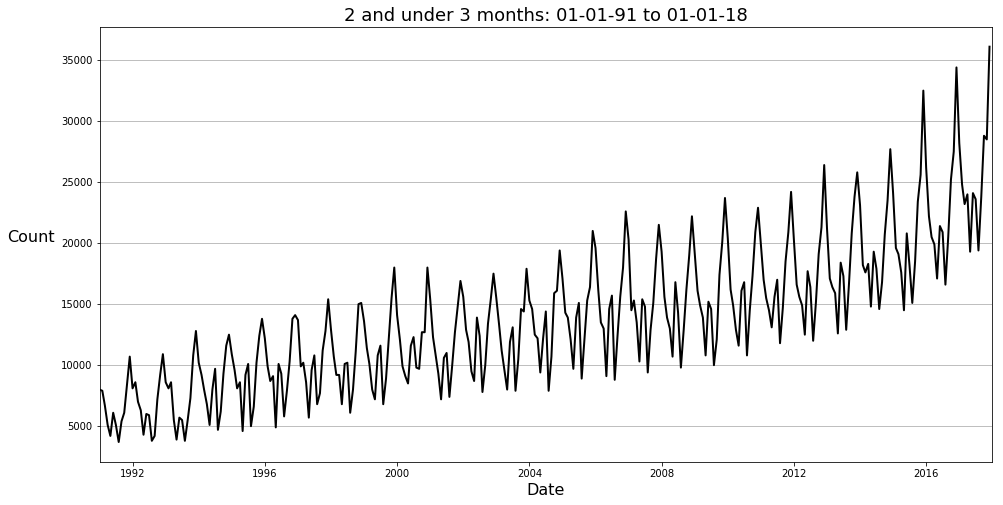

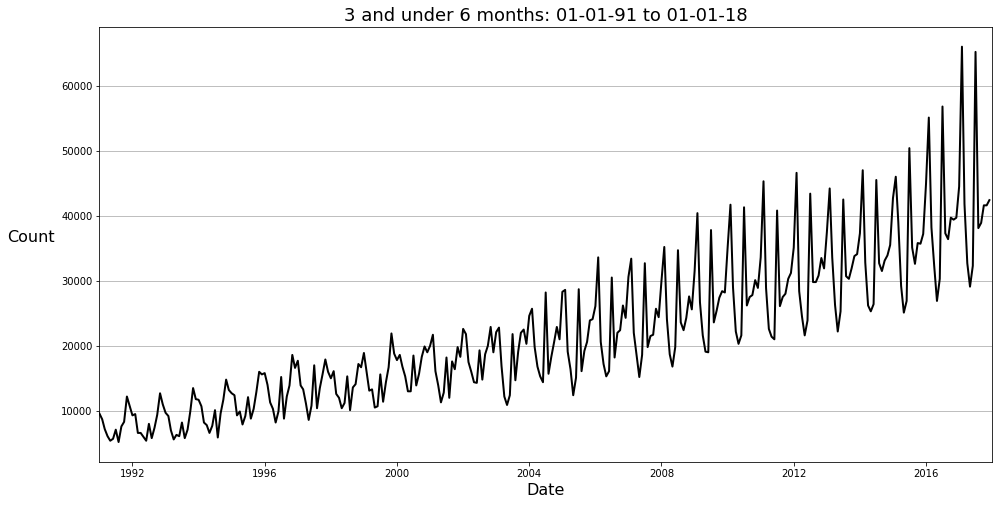

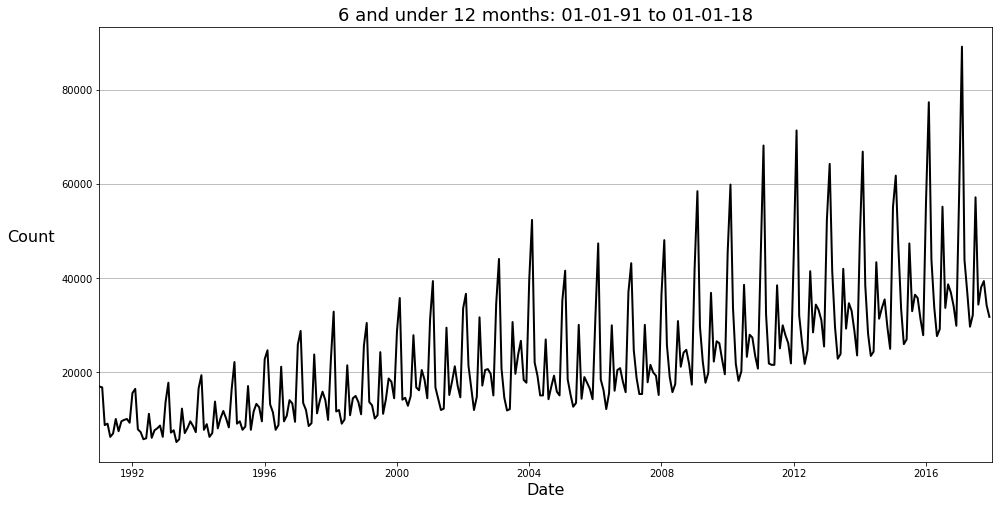

In [78]:
for length in lengths:
    length_of_stay_plot('01-01-91', '01-01-18', length, False)

<h4>Length of Stay: A closer look</h4>

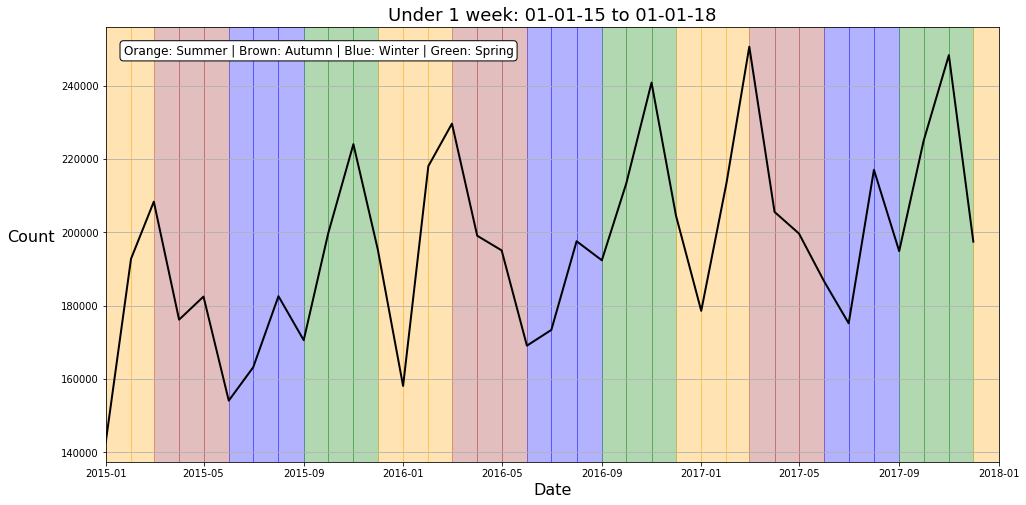

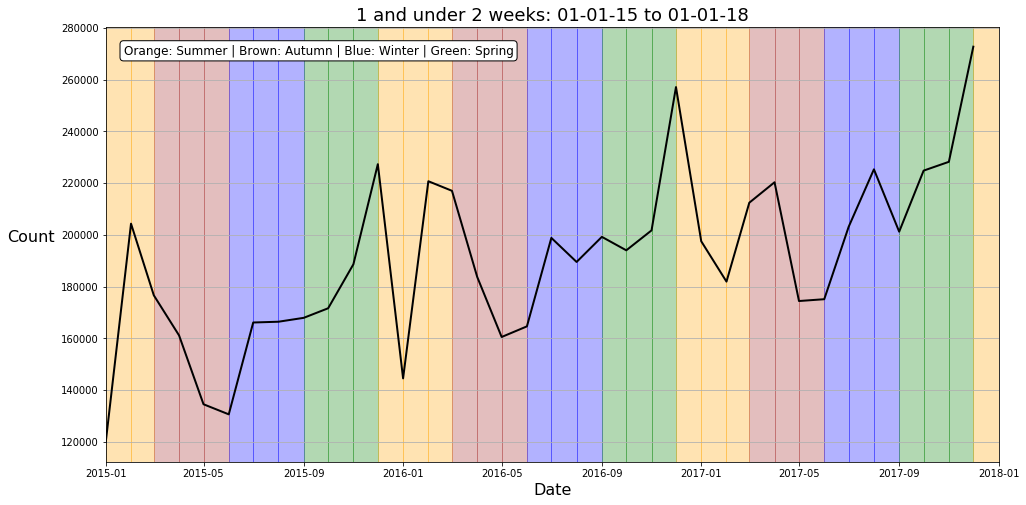

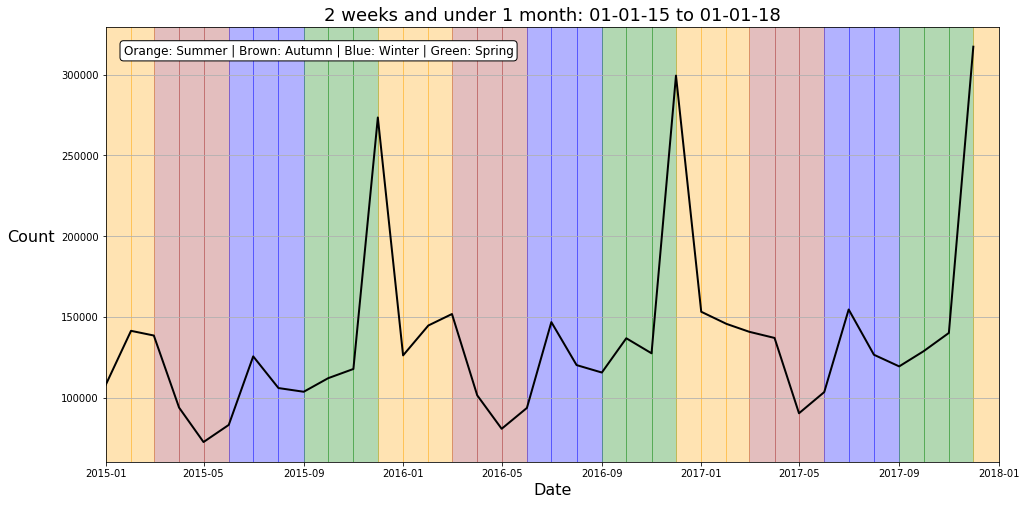

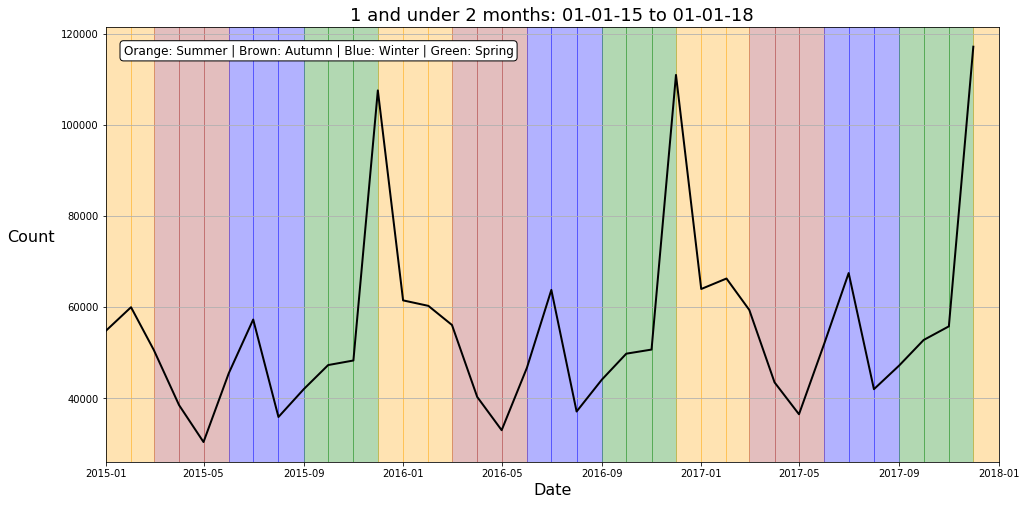

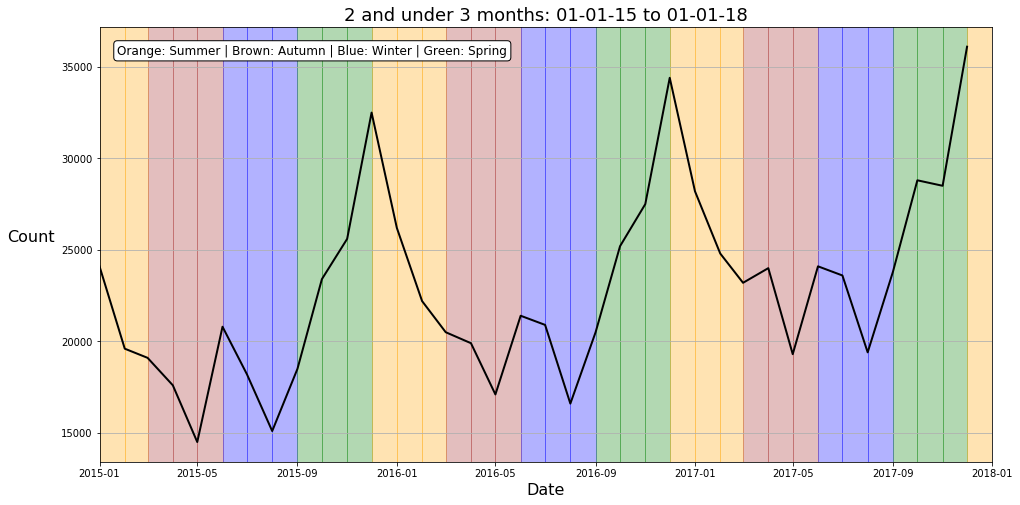

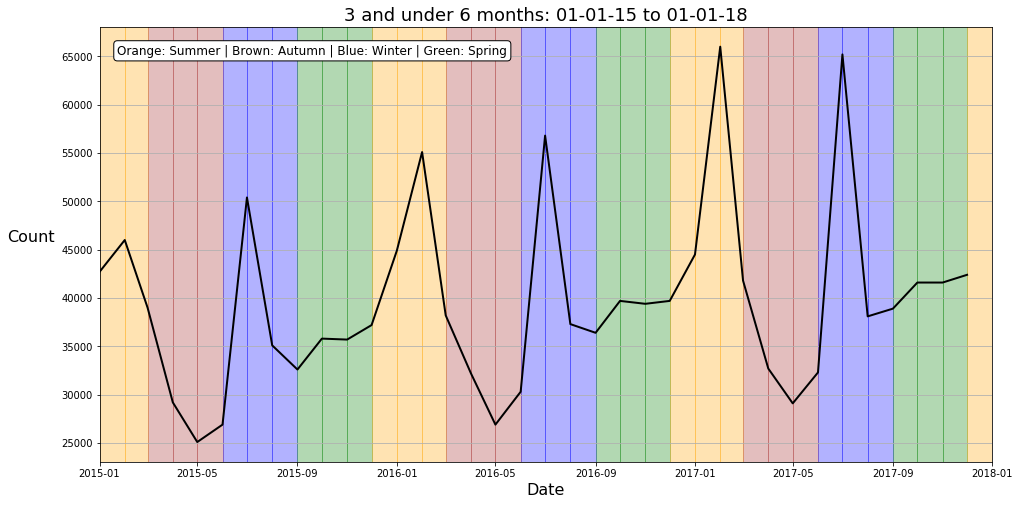

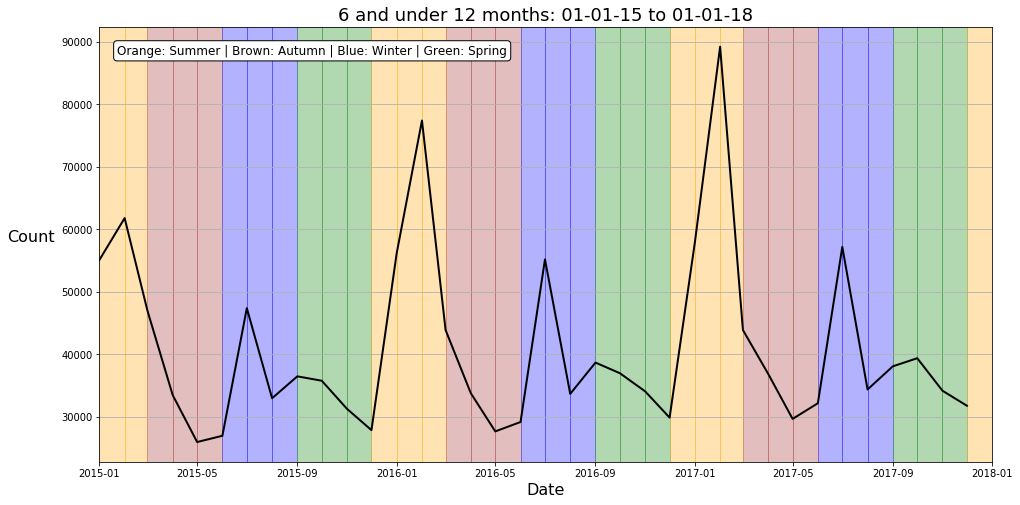

In [79]:
for length in lengths:
    length_of_stay_plot('01-01-15', '01-01-18', length, True)

<h3>Permanent Departures and Arrivals</h3>

Visualise count of permanent arrivals and departures per month with current elected government

In [80]:
#Add a new column 'Colour' containing the colour of the elected party for each election
#Colour will be used for plotting purposes

elected_aus_government['Colour'] = elected_aus_government.apply(lambda row:  'Blue' if row['Winner'] == 'LNP' else 'Red', axis = 1)

In [81]:
# Function arrivals_vs_departures_plot() plots arrival and departure between the specified dates
#
# The function requires:
#   start: string of start date in format YYYY-MM-DD
#   end: string of end date in format YYYY-MM-DD

def arrivals_vs_departures_plot(start, end):
    
    start = arrivals_per_month[arrivals_per_month['Date'] == start].index[0]
    end = departures_per_month[departures_per_month['Date'] == end].index[0]

    #Declare plot
    fig, ax = plt.subplots(figsize=(16, 8))

    #Get data for first line
    ax.plot(arrivals_per_month['Date'].iloc[start:end], arrivals_per_month['Permanent Arrivals'].iloc[start:end])

    #Get data for second line
    ax.plot(departures_per_month['Date'].iloc[start:end], departures_per_month['Permanent Departures'].iloc[start:end])

    #Set axis labels and title
    ax.set(xlabel = 'Year', ylabel = 'Arrivals', title = 'Permanent Arrivals and Departures')

    #Display legend
    plt.legend()

    #Set x-axis limits
    plt.xlim(departures_per_month['Date'].iloc[start], departures_per_month['Date'].iloc[end])

    #Add span areas betweem each election cycle. Colour corresponds to party in government
    for i in range(20, 0, -1):
        ax.axvspan(elected_aus_government[['Date']].iloc[-i], elected_aus_government[['Date']].iloc[-i-1], ymin=0, ymax=1000, color=elected_aus_government['Colour'].iloc[-i], alpha=0.2)
    

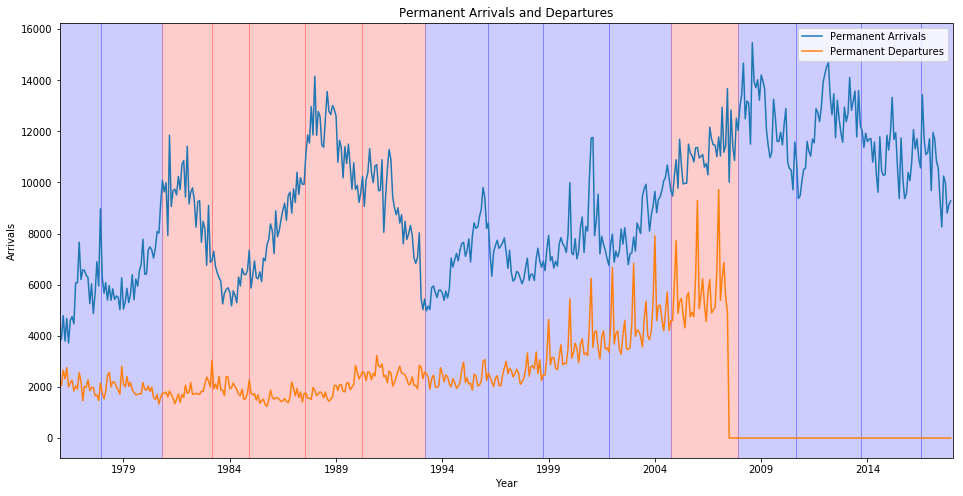

In [82]:
arrivals_vs_departures_plot('1976-01-01', '2018-01-01')

# no permanent departures data after mid 2007

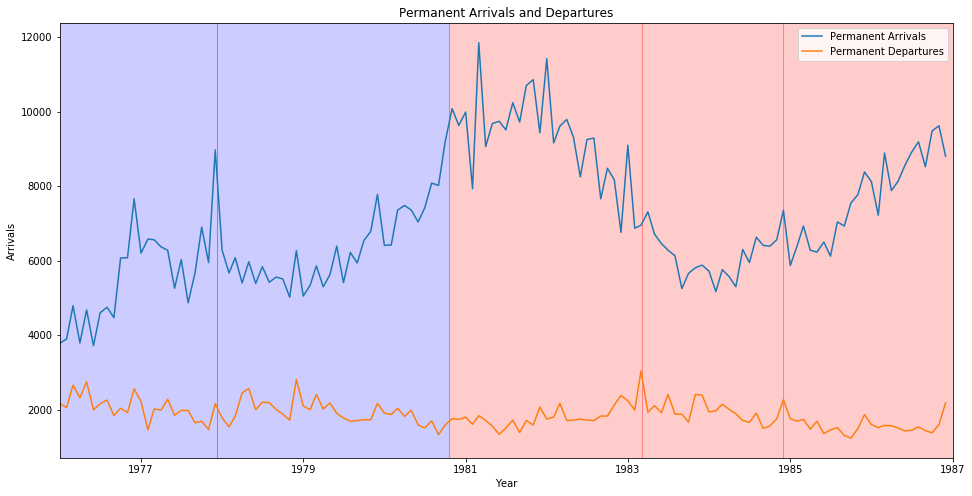

In [83]:
arrivals_vs_departures_plot('1976-01-01', '1987-01-01')

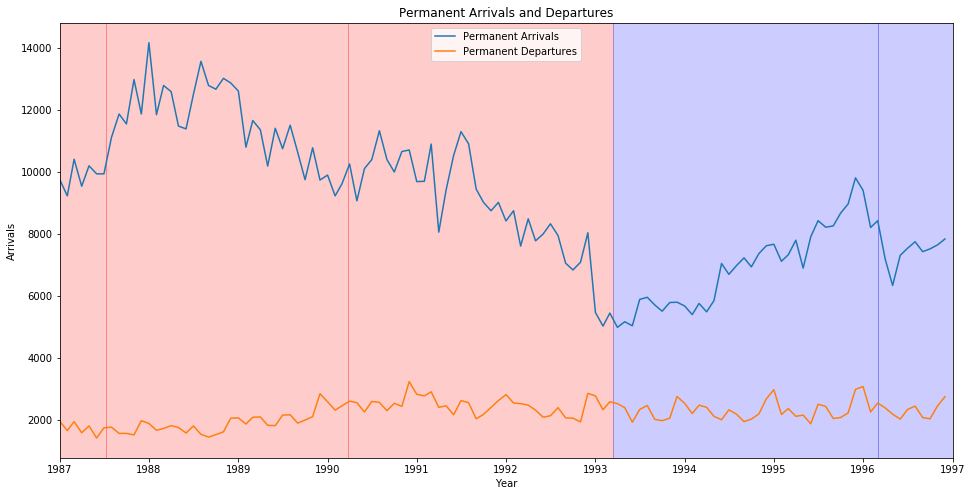

In [84]:
arrivals_vs_departures_plot('1987-01-01', '1997-01-01')

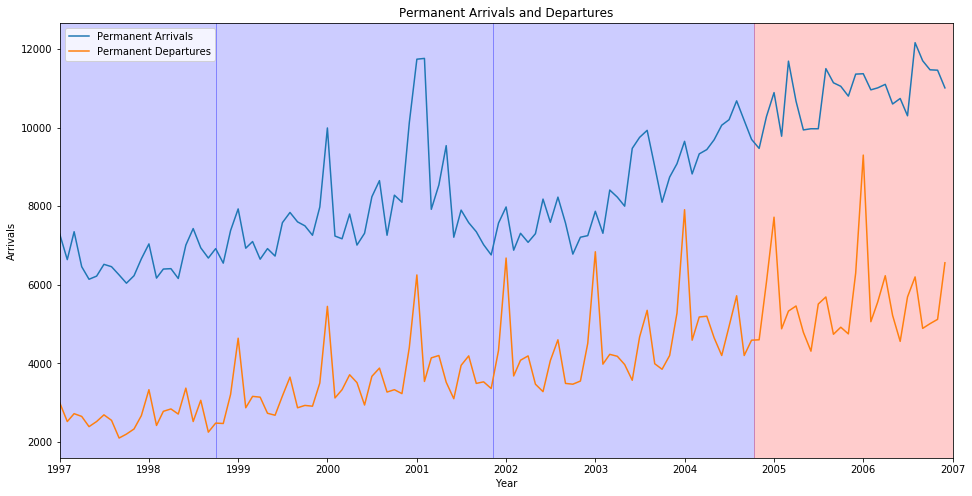

In [85]:
arrivals_vs_departures_plot('1997-01-01', '2007-01-01')

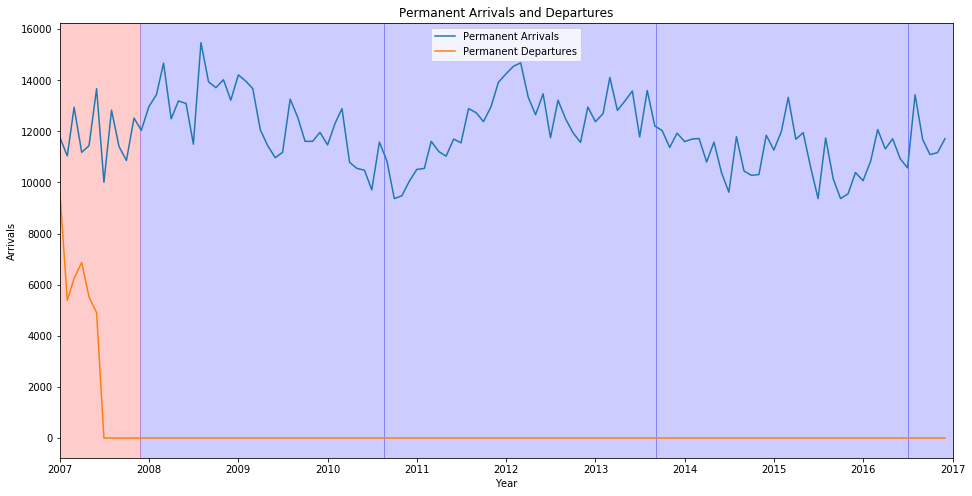

In [86]:
arrivals_vs_departures_plot('2007-01-01', '2017-01-01')

# Note: no permanent departures data available after mid-2007

<h3>International Visitors Per States and Territories</h3>

Count of arrivals per month

In [87]:
# summary for all states and territories
state_data.describe()

NSW            Vic            Qld            SA  \
count     334.000000     334.000000     334.000000    334.000000   
mean   174033.832335   85061.976048  115520.059880  11460.479042   
std     55904.005231   47993.659087   29967.125912   5579.730133   
min     64100.000000   21900.000000   42300.000000   2700.000000   
25%    138625.000000   48925.000000   99700.000000   7200.000000   
50%    166650.000000   73450.000000  117000.000000  10400.000000   
75%    200950.000000  109200.000000  133500.000000  14400.000000   
max    389500.000000  263200.000000  206500.000000  32500.000000   

                  WA           Tas            NT           ACT  
count     334.000000    334.000000    334.000000    334.000000  
mean    43084.730539   2950.898204   5133.233533   4204.491018  
std     17225.933041   2002.486990   2269.659595   2044.066535  
min     11200.000000    500.000000    700.000000   1100.000000  
25%     30850.000000   1500.000000   3700.000000   2700.000000  
50%     40600.000000   2300.000000   4900.000000   3900.000000  
75%     54775.000000   3875.000000   6400.000000   5200.000000  
max    104000.000000  13700.000000  13600.000000  13600.000000

In [88]:
# summary for all states
state_data_2.describe()

Count
count    2672.000000
mean    55181.212575
std     66341.859260
min       500.000000
25%      4700.000000
50%     20150.000000
75%     99275.000000
max    389500.000000

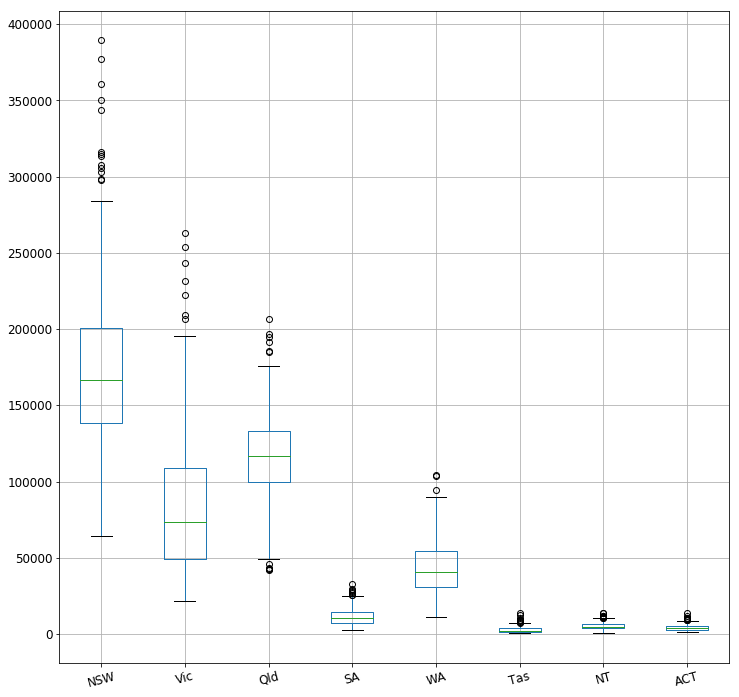

In [89]:
columns = list(state_data.iloc[:, 1:].columns)
state_data.boxplot(column=columns, figsize=(12, 12), rot=15, fontsize=12)
plt.show()

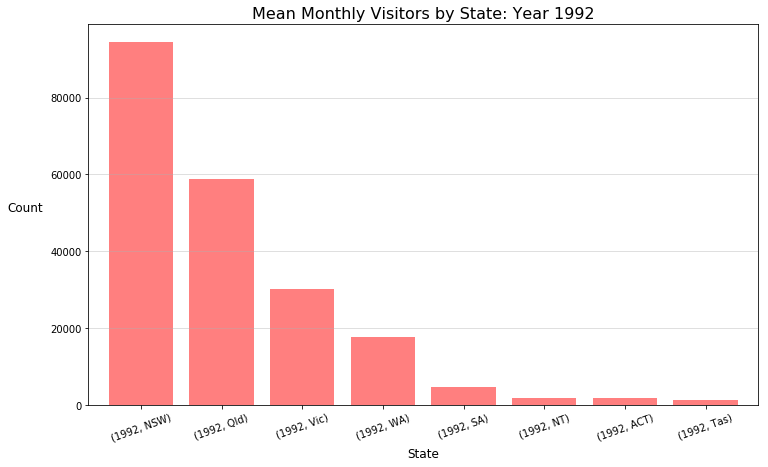

In [90]:
year = 1992
state_data_2[state_data_2.Date.dt.year == year].groupby([state_data_2.Date.dt.year, 'State']).mean().sort_values(by='Count', ascending=False).plot(kind='bar', figsize = (12, 7), width=0.8, color = 'r', alpha = 0.5, rot = 20, legend = False)
plt.grid(axis='y', alpha = 0.5)
plt.title(f"Mean Monthly Visitors by State: Year {year}", fontsize = 16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12, rotation=0, labelpad=25)
plt.show()


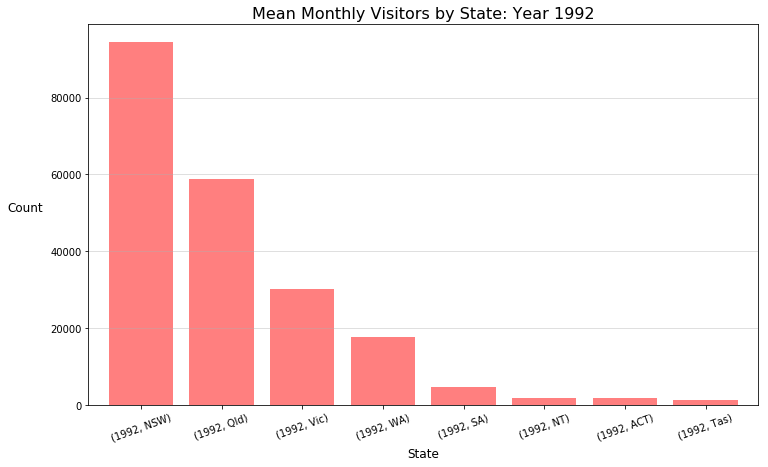

In [91]:
years = [2010, 2011, 2012]
state_data_2[state_data_2.Date.dt.year == year].groupby([state_data_2.Date.dt.year, 'State']).mean().sort_values(by='Count', ascending=False).plot(kind='bar', figsize = (12, 7), width=0.8, color = 'r', alpha = 0.5, rot = 20, legend = False)
plt.grid(axis='y', alpha = 0.5)
plt.title(f"Mean Monthly Visitors by State: Year {year}", fontsize = 16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12, rotation=0, labelpad=25)
plt.show()

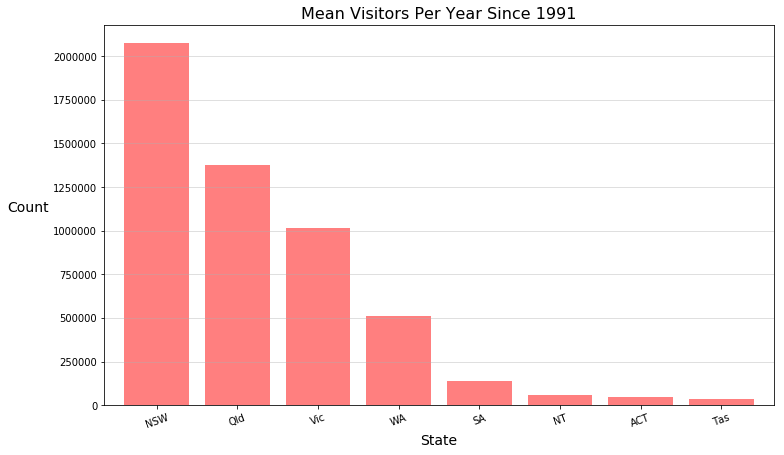

In [92]:
x = state_data.iloc[::, 1:].groupby(state_data.Date.dt.year).sum().astype(int)
x.mean().sort_values(ascending=False).plot(kind='bar', figsize = (12, 7), width=0.8, color = 'r', alpha = 0.5, rot = 20, legend = False)
plt.grid(axis='y', alpha = 0.5)
plt.title("Mean Visitors Per Year Since 1991", fontsize = 16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14, rotation=0, labelpad=25)
plt.show()


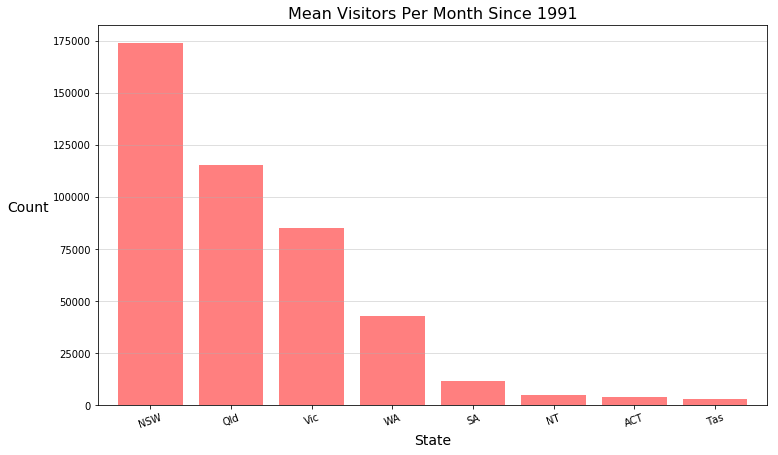

In [93]:
state_data_2.groupby(['State']).mean().sort_values(by='Count', ascending=False).plot(kind='bar', figsize = (12, 7), width=0.8, color = 'r', alpha = 0.5, rot = 20, legend = False)
plt.grid(axis='y', alpha = 0.5)
plt.title("Mean Visitors Per Month Since 1991", fontsize = 16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14, rotation=0, labelpad=25)
plt.show()


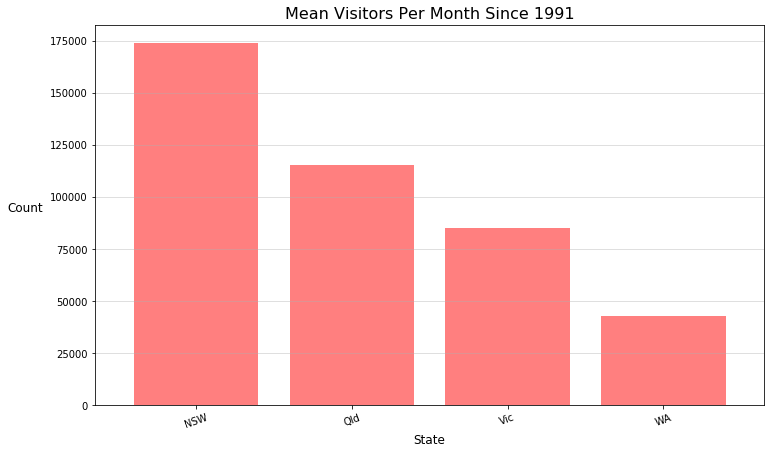

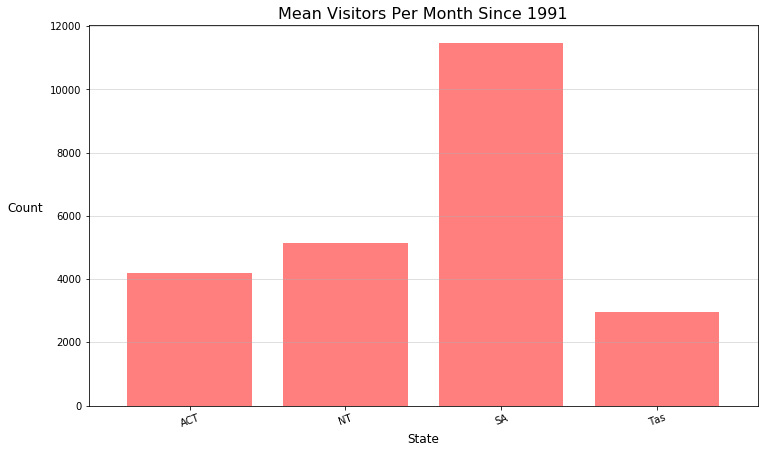

In [94]:
states_1 = state_data_2.groupby(['State']).mean()
states_1.iloc[(states_1.index != 'ACT') & (states_1.index != 'NT') & (states_1.index != 'SA') & (states_1.index != 'Tas')].plot(kind='bar', figsize = (12, 7), width=0.8, color = 'r', alpha = 0.5, rot = 20, legend = False)
plt.grid(axis='y', alpha = 0.5)
plt.title("Mean Visitors Per Month Since 1991", fontsize = 16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12, rotation=0, labelpad=25)
plt.show()

states_2 = state_data_2.groupby(['State']).mean()
states_2.iloc[(states_2.index != 'NSW') & (states_2.index != 'Qld') & (states_2.index != 'Vic') & (states_2.index != 'WA')].plot(kind='bar', figsize = (12, 7), width=0.8, color = 'r', alpha = 0.5, rot = 20, legend = False)
plt.grid(axis='y', alpha = 0.5)
plt.title("Mean Visitors Per Month Since 1991", fontsize = 16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12, rotation=0, labelpad=25)
plt.show()

To visualize the count of international visitors per state per year, DataFrame 'aus_map' is merged with DataFrame 'state_data' into GeoDataFrame 'merged'

In [95]:
#Merge aus_map ad state_data DataFrames
merged = gpd.GeoDataFrame(aus_map.merge(state_data_2))

#Check merege
merged.head()

State                                           geometry       Date  Count
0   NSW  (POLYGON ((151.0689412576817 -33.8202495323252... 1991-01-01  75600
1   NSW  (POLYGON ((151.0689412576817 -33.8202495323252... 1991-02-01  78300
2   NSW  (POLYGON ((151.0689412576817 -33.8202495323252... 1991-03-01  80500
3   NSW  (POLYGON ((151.0689412576817 -33.8202495323252... 1991-04-01  68300
4   NSW  (POLYGON ((151.0689412576817 -33.8202495323252... 1991-05-01  65400

In [96]:
new_data = gpd.GeoDataFrame(merged.groupby([merged.Date.dt.year, 'State']).sum()).unstack()

In [97]:
new_data = new_data.droplevel(0, axis = 1)

In [98]:
new_data.reset_index(level=0, inplace=True)
new_data.index.name = 'index'

In [99]:
new_data = new_data.melt(id_vars = 'Date', var_name = 'State', value_name = 'Count')

In [100]:
state_plot_data = gpd.GeoDataFrame(aus_map.merge(new_data))

In [101]:
def states_plot(year):
    
    #Declare Plot
    fig, ax = plt.subplots(1, figsize=(10, 5))

    #Set title
    ax.set_title(f'International Visitors Per State: {year} (normalised)', fontdict={'fontsize':'14','fontweight':'3'})

    #Remvoe y and x axis
    ax.axis('off')

    #Annotation with source
    ax.annotate('Source: Australian Bureau of Statistics', xy=(0.1, .14), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
    
    # Empty array for the data range
    sm._A = []
    #Add the colorbar to the figure
    cbar = fig.colorbar(sm)
    
    #Get data
    state_plot_data[state_plot_data['Date'] == year].plot(column='Count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    
    #Show plot
    plt.show()

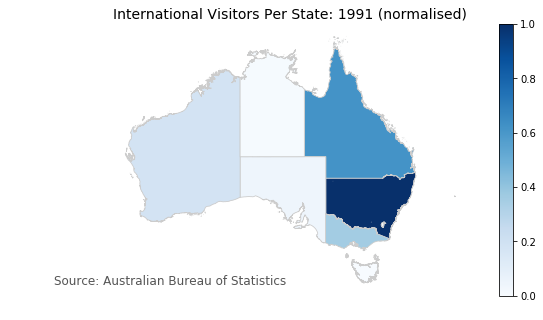

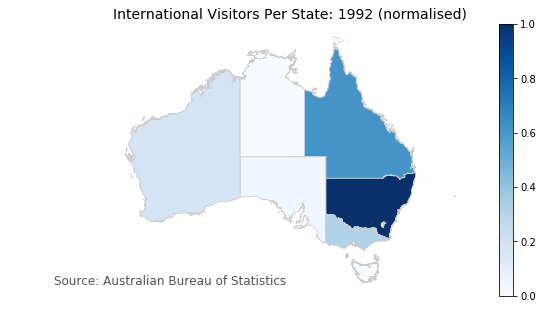

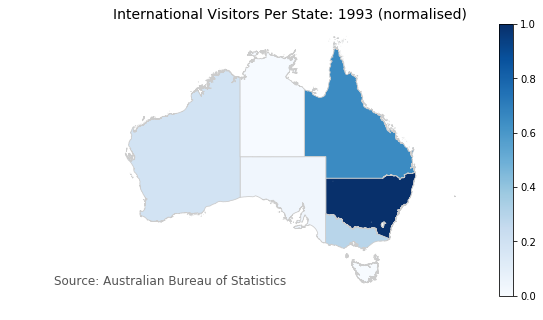

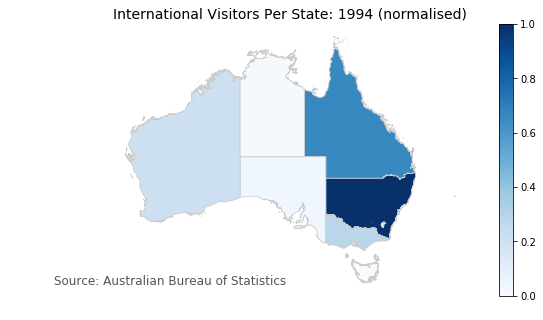

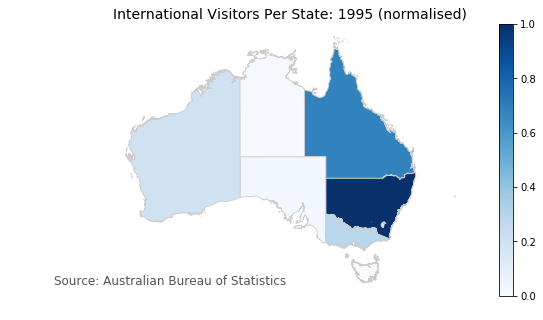

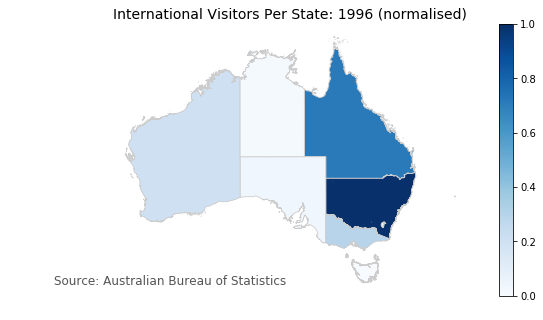

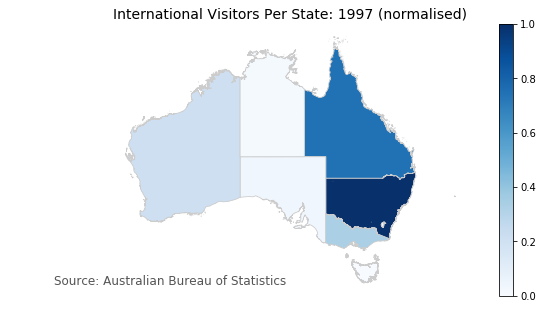

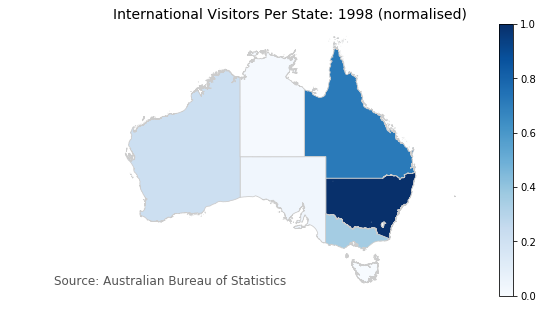

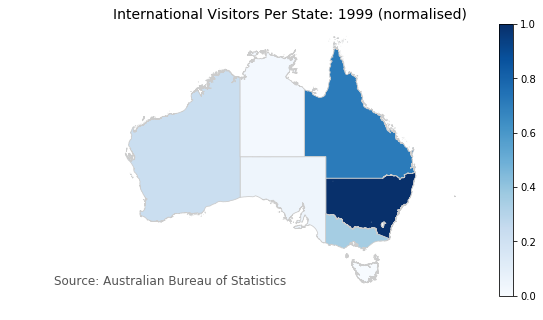

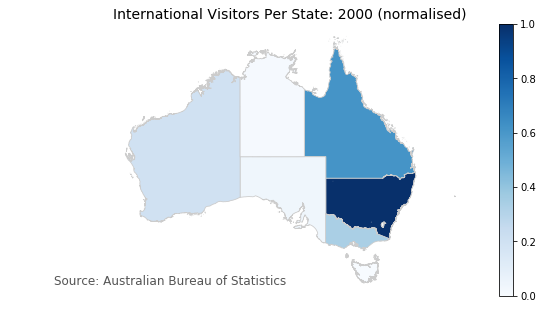

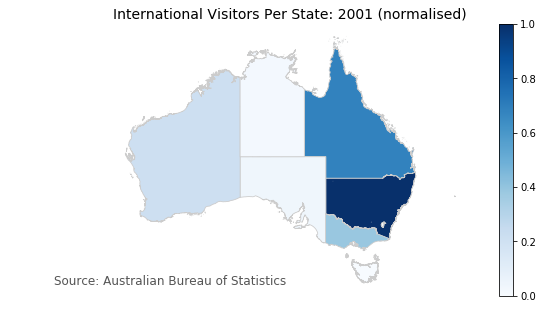

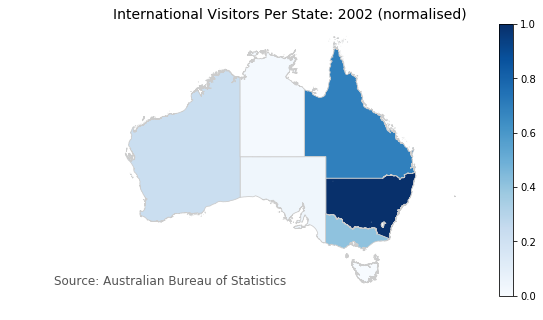

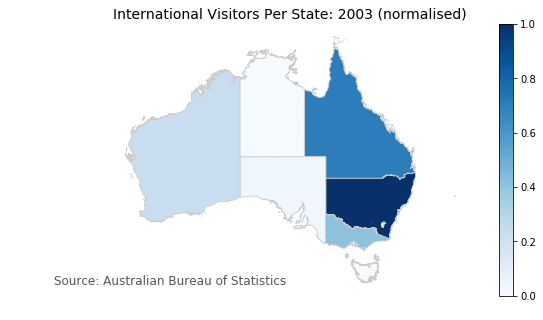

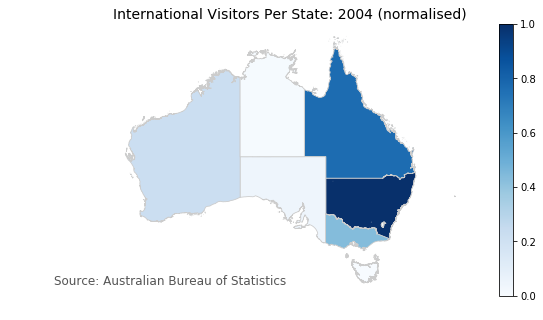

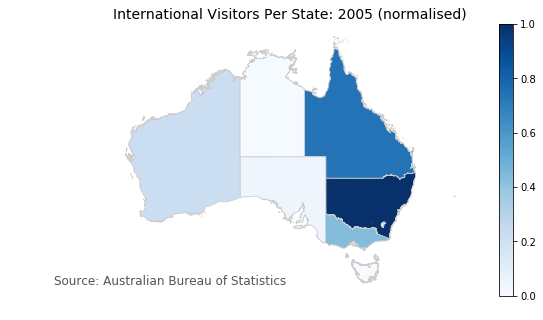

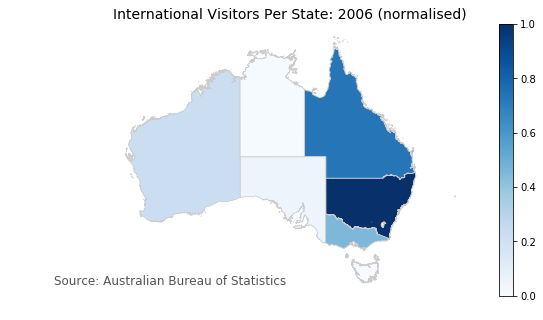

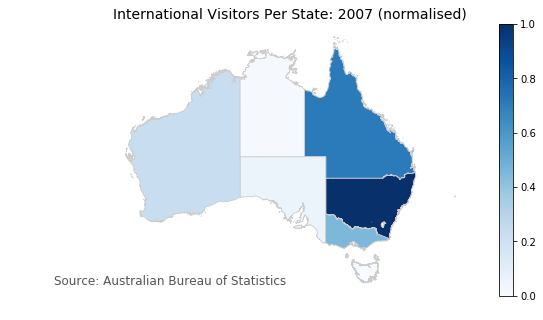

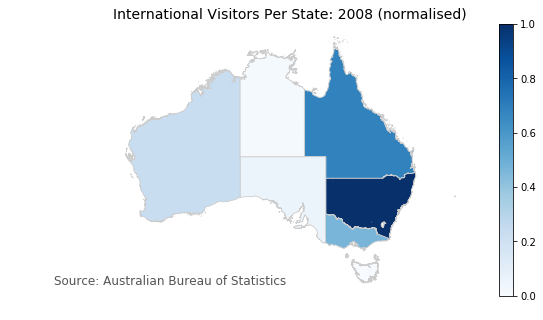

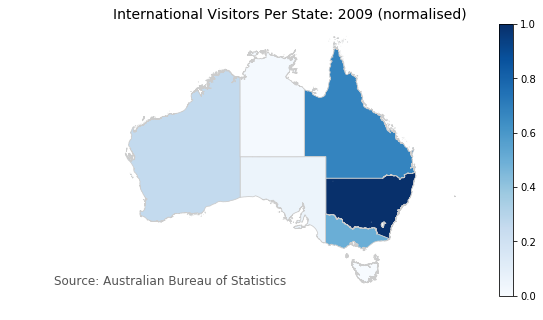

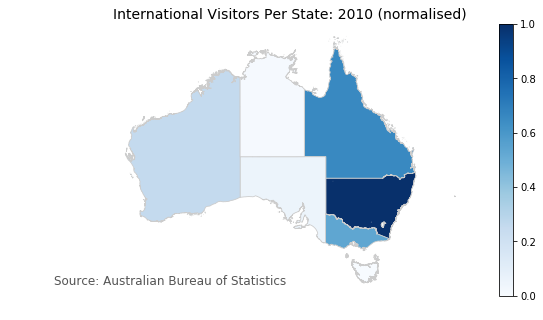

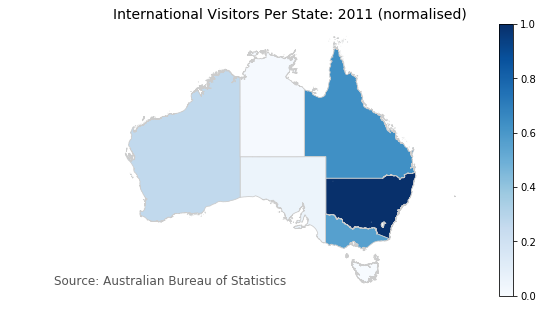

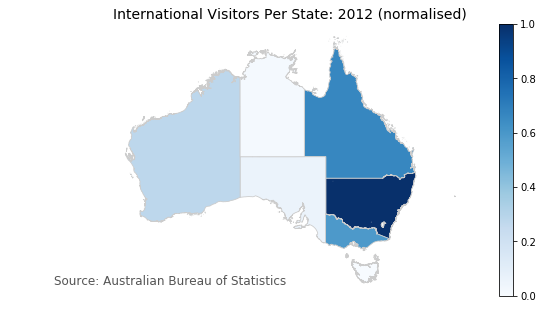

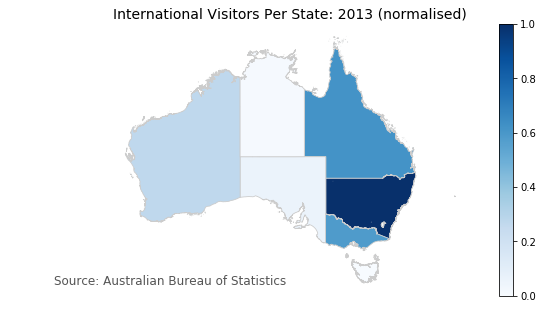

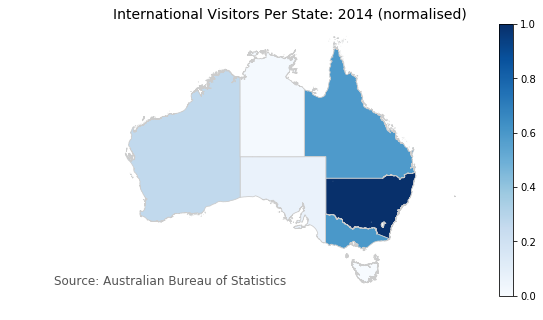

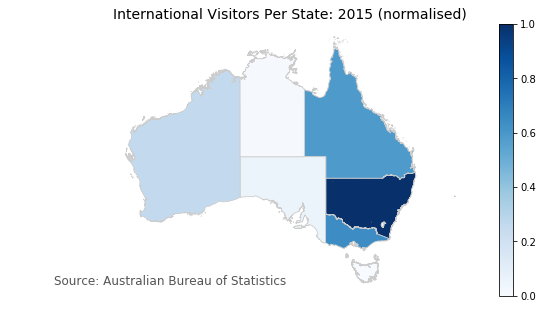

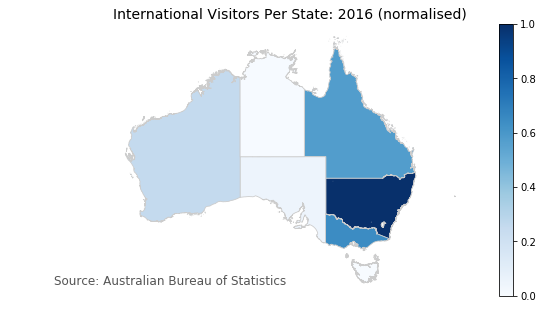

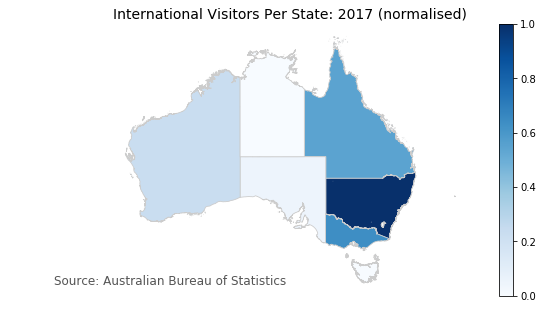

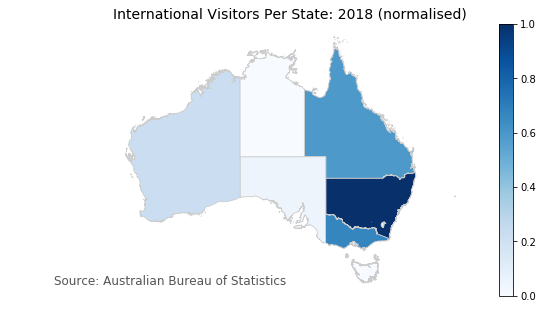

In [102]:
for i in range(1991, 2019):
    states_plot(i)

<h3>Countries Visited By Australian Residents</h3>

Get the top 10 countries visited by Australian residents using the get_n function.

In [103]:
get_n(10, 'top', residents_returning_by_country)

Country  Count for top 10 countries
Rank                                                      
1                  New Zealand                    13211700
2                    Indonesia                    10265300
3     United States of America                     9807500
4                UK, CIs & IOM                     6272600
5                     Thailand                     5998700
6                        China                     4451900
7                         Fiji                     3619600
8                    Singapore                     3614300
9                     Malaysia                     2846900
10                       Japan                     2717300

Get the bottom 10 countries visited by Australian residents using the get_n function.

In [104]:
get_n(10, 'bottom', residents_returning_by_country)

Country  Count for bottom 10 countries
Rank                                                 
1     French Polynesia                          79300
2                Tonga                         133400
3            Mauritius                         144500
4            Argentina                         149200
5          Timor-Leste                         149800
6         Cook Islands                         159700
7                Chile                         161700
8               Sweden                         168700
9               Mexico                         172800
10              Poland                         173200

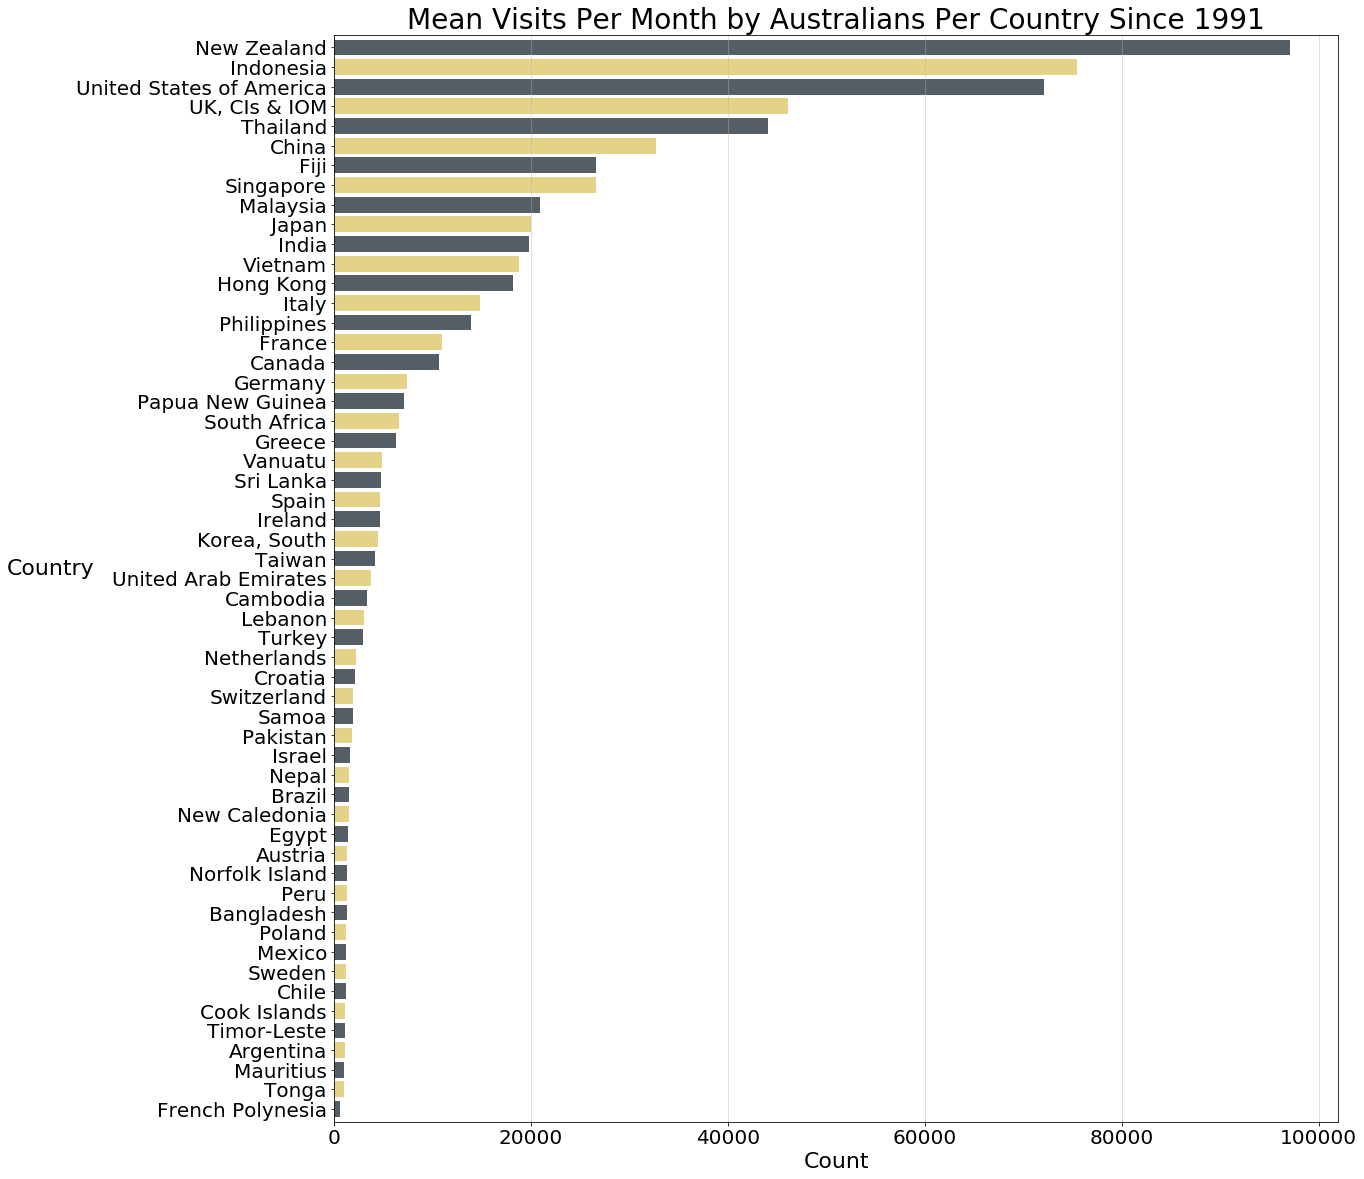

In [105]:
plt.title("Mean Visits Per Month by Australians Per Country Since 1991", fontsize = 28)
plt.xlabel("Count", fontsize = 22)
plt.ylabel("Country", fontsize = 22, rotation=0, labelpad=25)

residents_returning_by_country.iloc[::, 1:].mean().astype(int).sort_values(ascending = True).plot(kind = 'barh',figsize = (18, 20), rot = 0, fontsize = 20, legend = False, width = 0.8, color=['#424B54', '#E1CE7A'], alpha=0.9)
plt.grid(axis='x', alpha = 0.5)
plt.show()


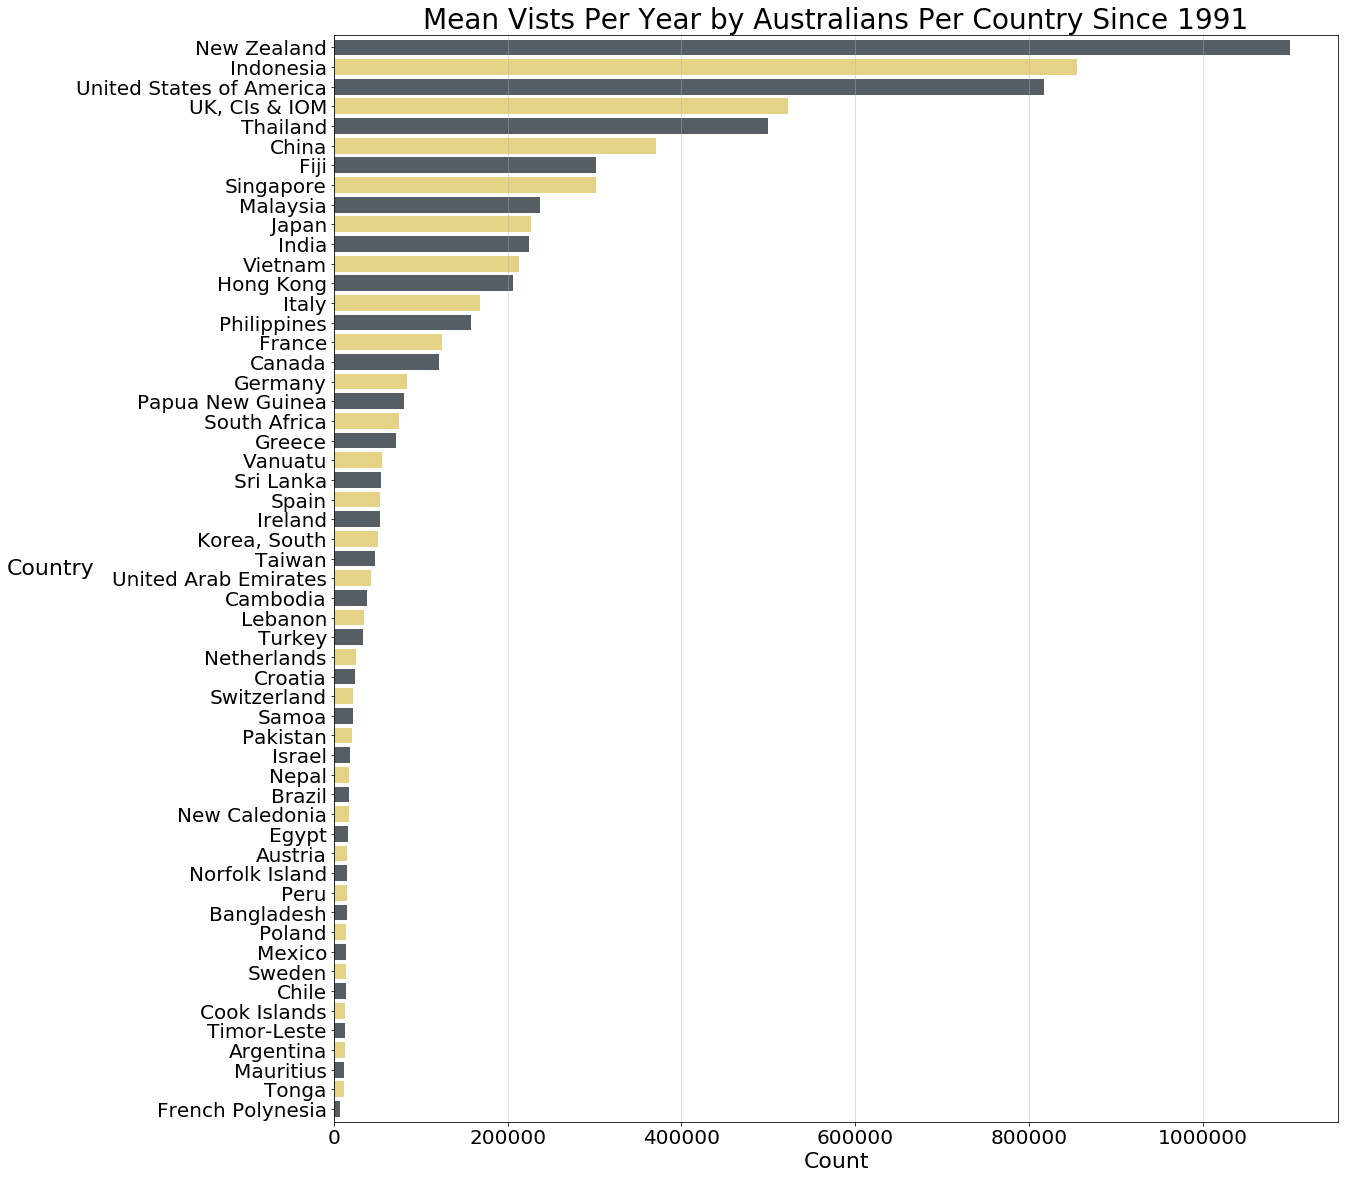

In [106]:
x = residents_returning_by_country.iloc[::, 1:].groupby(residents_returning_by_country.Date.dt.year).sum().astype(int)
plt.title("Mean Vists Per Year by Australians Per Country Since 1991", fontsize = 28)
plt.xlabel("Count", fontsize = 22)
plt.ylabel("Country", fontsize = 22, rotation=0, labelpad=25)

x.mean().sort_values(ascending = True).plot(kind = 'barh',figsize = (18, 20), rot = 0, fontsize = 20, legend = False, width = 0.8, color=['#424B54', '#E1CE7A'], alpha=0.9)
plt.grid(axis='x', alpha = 0.5)
plt.show()


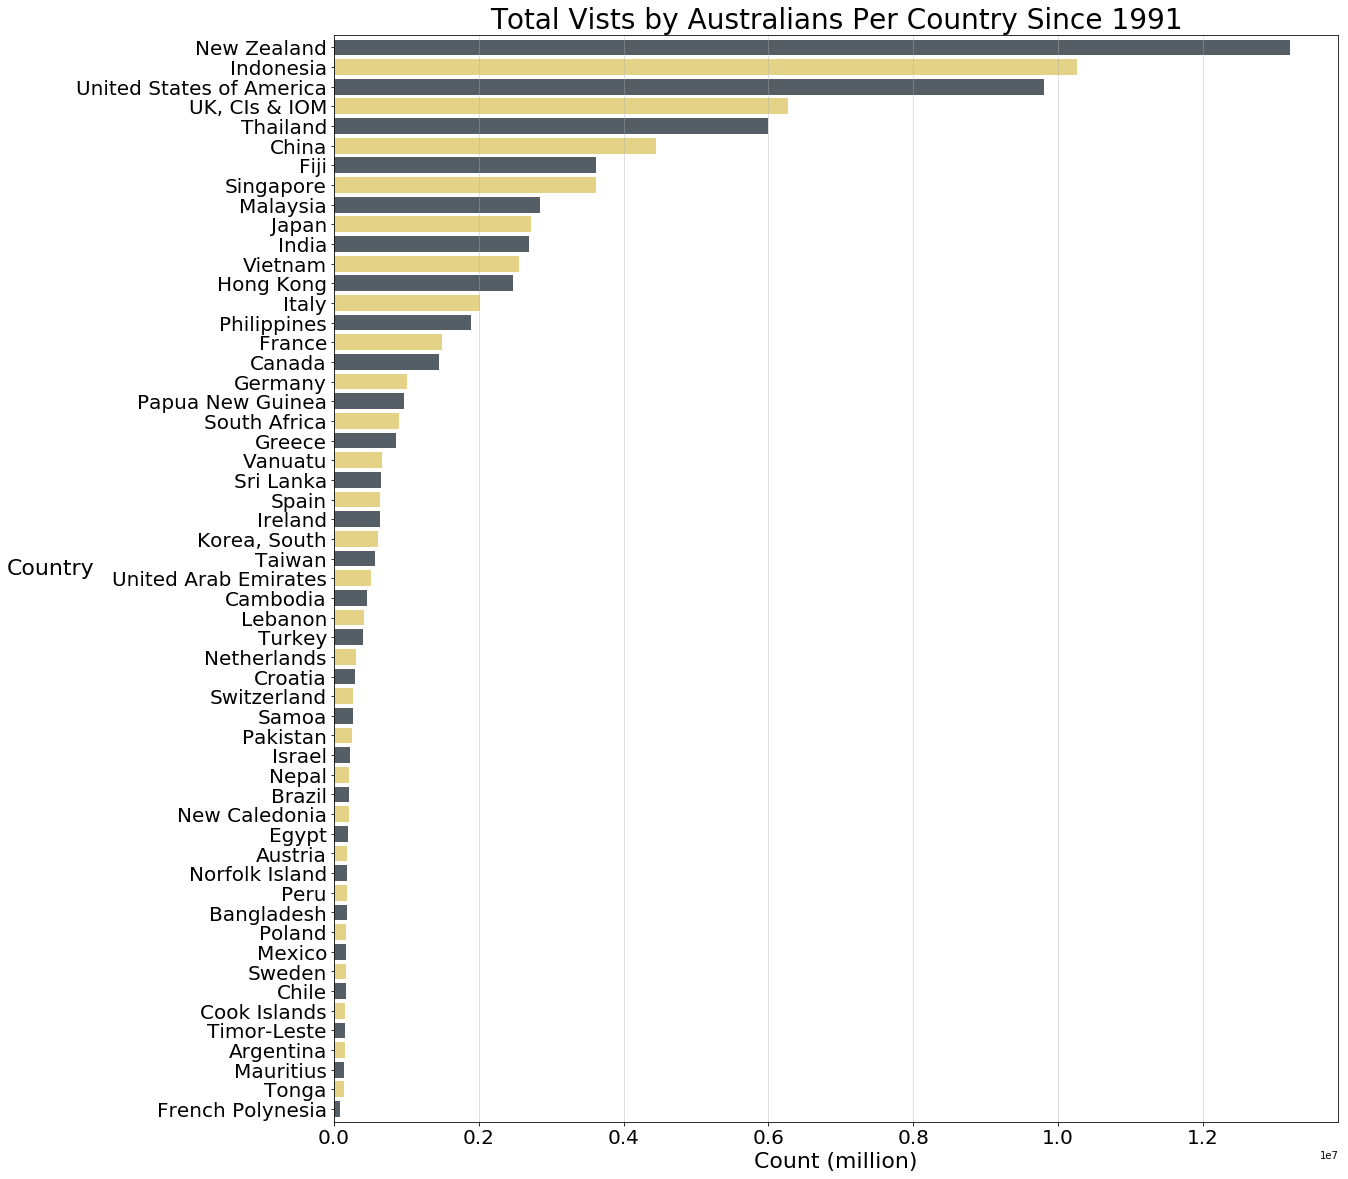

In [107]:
plt.title("Total Vists by Australians Per Country Since 1991", fontsize = 28)
plt.xlabel("Count (million)", fontsize = 22)
plt.ylabel("Country", fontsize = 22, rotation=0, labelpad=25)

residents_returning_by_country.iloc[::, 1:].sum().astype(int).sort_values(ascending = True).plot(kind = 'barh',figsize = (18, 20), rot = 0, fontsize = 20, legend = False, width = 0.8, color=['#424B54', '#E1CE7A'], alpha=0.9)
plt.grid(axis='x', alpha = 0.5)
plt.show()


See the difference in ranking countries visited by Australian residents from 2007 to 2018

In [108]:
#Get all country labels in 'residents_returning_by_country' DataFrame
countries = residents_returning_by_country.iloc[:, 1:].columns

In [109]:
#Loop through all the country labels to get the difference
for country in countries:
    get_difference(2007, 2018, country, residents_returning_by_country)

Position change from 2007 to 2018 for Norfolk Island: -25 spots
Position change from 2007 to 2018 for New Zealand: 0 spots
Position change from 2007 to 2018 for New Caledonia: -10 spots
Position change from 2007 to 2018 for Papua New Guinea: -4 spots
Position change from 2007 to 2018 for Vanuatu: -5 spots
Position change from 2007 to 2018 for Cook Islands: 0 spots
Position change from 2007 to 2018 for Fiji: -3 spots
Position change from 2007 to 2018 for French Polynesia: -1 spots
Position change from 2007 to 2018 for Samoa: +1 spots
Position change from 2007 to 2018 for Tonga: -7 spots
Position change from 2007 to 2018 for UK, CIs & IOM: -2 spots
Position change from 2007 to 2018 for Ireland: +1 spots
Position change from 2007 to 2018 for Austria: -1 spots
Position change from 2007 to 2018 for France: -3 spots
Position change from 2007 to 2018 for Germany: 0 spots
Position change from 2007 to 2018 for Netherlands: -2 spots
Position change from 2007 to 2018 for Switzerland: -1 spots
Pos

In [110]:
#Melt state columns into single column 'State'
residents_returning_by_country_2 = residents_returning_by_country.melt(id_vars = ['Date'], var_name = 'Country', value_name = 'Count')

#Check changes
residents_returning_by_country_2.head()

Date         Country  Count
0 2007-07-01  Norfolk Island   1500
1 2007-08-01  Norfolk Island   1700
2 2007-09-01  Norfolk Island   2500
3 2007-10-01  Norfolk Island   2200
4 2007-11-01  Norfolk Island   2500

In [111]:
residents_world_map = gpd.GeoDataFrame(world_map.merge(residents_returning_by_country_2))

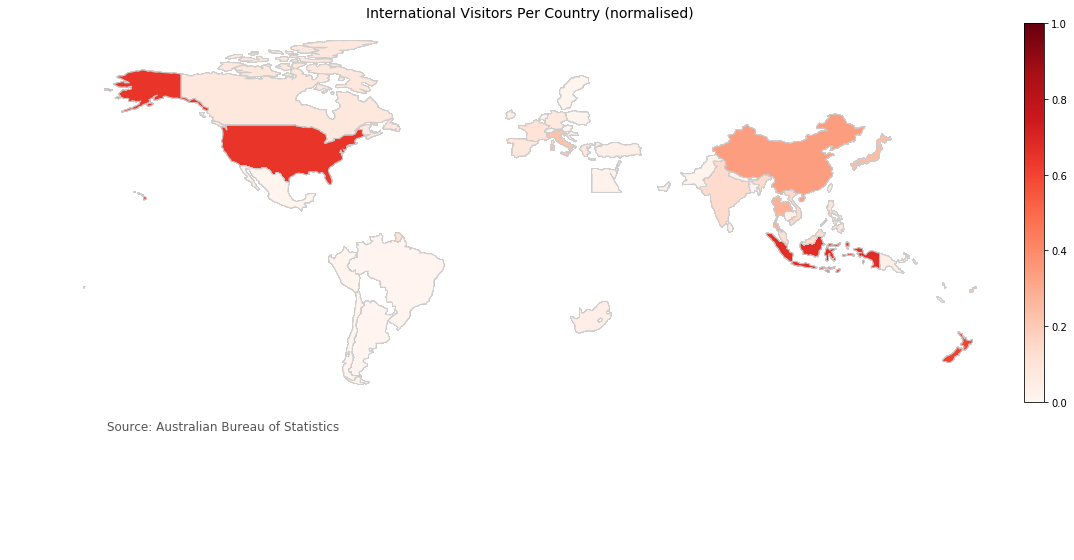

In [112]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# declare Plot
plt.figure(figsize=(18, 18))
ax = plt.gca()

# set title
ax.set_title('International Visitors Per Country (normalised)', fontdict={'fontsize':'14','fontweight':'3'})

# remvoe y and x axis
ax.axis('off')

# annotation with source
ax.annotate('Source: Australian Bureau of Statistics', xy=(0.1, .25), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# declare colour map
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=1))
    
# array for the data range
sm._A = []


divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="2%", pad=0.05)

# plot colour bar
plt.colorbar(sm, cax=cax)
    
# get data
residents_world_map.plot(column='Count', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

# show plot
plt.show()

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 5. Results/Insights

Discuss any non-trivial result or insight into the problem stemming from your analysis.

__Create as many code, markdown and raw cells as needed__

<h4>International Visitors - Country of Origin</h4>

New Zealand is the country with most visits to Australia. This is unsurprising because of the very close ties between the two countries and also the geographical proximity. In total visits since 1991, New Zealanders have more than 10 million more visits than second placed UK, CIs & IOM. Apart from United States of America and Germany the rest of the top 10 countries to visit Australia since 1991 is dominated by Asian countries including (in order) Japan, China, Singapore, Malaysia, South Korea and Hong Kong.

The countries with the least amount of total visitors since 1991 (in order) are Iran, Colombia, Bangladesh, Mexico, Pakistan, Vanuatu, Greece, Saudi Arabia, Poland and Chile.It is worth noting the dataset used for this study does not include all countries. Countries with insignificantly low counts were not included in the dataset.

The rank for countries with highest visitors to Australia changes from year to year. Looking at the changes from 1991 to 2018 the most notable changes are
China, moving up 20 spots
India, moving up 17 spots 
Vietnam, moving up 19 spots
United Arab Emirates up 16 spots and
Brazil, up 17 spots. 

The most noticeable negative changes were:
Greece, moving down 20 spots,
Austria, moving down 16 spots
Papua New Guinea moving down 15 spots and 
Finland moving down 15 spots.

<h4>International Visitors - Reason of Stay</h4>

The most common reasons of stay for visitors to Australia are recreational falling into ‘Holiday’ or ‘Visiting friends/relatives’. These are followed by ‘Business’ then ‘Education’. Since 1991 ‘Business’, ‘Education’ and ‘Convention/Conference’ have slowly been increasing. Employing has been increasing from 1991 but began falling from 2015. ‘Holiday’ the largest account for visits saw dramatic increases from 1991 to 1996 and from 2011 to 2017. After 2017 ‘Holiday’ saw a small drop off.

Looking at reasons of stay in a higher resolution we are able to see month to month trends per year. ‘Education’ has a dramatic peak every year in February and June, right before the autumn and spring semesters begin at Australian universities. ‘Employment’ seems to be more sporadic apart from peaks every January. ‘Holiday’ and ‘Visiting friends/relatives ’sees a peak every year in December at the start of the Australian summer. ‘Business’ and ‘Convention/conference’ see major drop offs in December to March.


<h4>Permanent Arrivals and Departures</h4>

Permanent arrivals seems to follow trends for 10 year before changing direction. Since 2011 permanent arrivals appear to be falling. Permanents departures have steadily been increasing from 1999 to 2008. Data after 2008 was not included in the dataset.

<h4>Internation Visitors - State of Intended Stay</h4>

New South Wales is the most visited state or territory followed (in order) by Queensland, Victoria, Western Australia, South Australia, Northern Territory, Australian Capital Territory and Tasmania. Since 1991 this order has maintained itself except for Victoria overtaking Queensland after 2014.

<h4>Countries Visited by Australian residents</h4>

Looking at the countries visited by Australian residents world map visualisation it is easy to see countries in close proximity are the most visited by Australians with the exception being United States of America. 

The country most visited by Australian residents is New Zealand confirming the close ties between the two countries. Apart from third place United States of America and fourth place UK, CIs & IOM the top 10 is dominated by asian countries. The second and fifth most visited country by Australian residents is Indonesia and Thailand respectively are not surprising because of their popularity as a holiday designation. After Thailand the most popular countries (in order) are China, Fiji, Singapore, Malaysia and Japan.

The least popular countries from Australian residents to visit that were included in the dataset since 2007 (in order) were French Polynesia, Tonga, Mauritius, Argentina, Timor-Leste, Cook Islands, Chile, Sweden, Mexico and Poland. Again countries with significantly low counts were not included in the dataset.

The most notable position changes from 2007 to 2018 were
Norfolk Island, moving down 25 spots, 
Egypt, moving down 16 spots,
New Caledonia, moving down 10 spots
Pakistan moving up 18 spots,
Nepal, moving up 17 spots,
And Sri Lanka and Mexico both moving up 12 spots

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
# 6. In hindsight...

In this section you should reflect on your work and what you've learned. In particular you should include:

<ul>
    <li> a discussion of the most challenging aspect of the data analysis and if/how you overcame the challenge.</li>
    <li> a discussion of any programming technique and/or reference you found particularly useful or helpful for your project.</li>
    <li> an assessment of the outcome of the study in relation to the original goals (i.e., have the goals been reached, or did you have to reassess the goals during the project, and if so why?).</li>
    <li> a discussion of what new, or surprising knowledge or insight into the problem you've gained by conducting the study.</li>
    <li> a discussion of whether you would approach the problem differently if given an opportunity to redo the work, and any advice they would give to someone who would want to work on a similar problem.</li>
    <li> a discussion of how your analysis could be improved or extended in future work.</li>

</ul>

<h4>Challenges</h4>

The most challenging aspects of my analysis were managing multiple datasets and correctly formatting the output of datadrames for plots and map visualisations. I overcame these challenges by merging as many dataframes as possible and defining functions that could clean and format dataframes automatically

<h4>Techniques and Refrences<h4>


Definining function for various different tasks and automating as much as possible was particularly useful. Defining functions allowed me to save time and keep complexity of plot styling or function functionality consistent. I found the most useful references to be the original documentation by Pandas and matplotlib. For more specific tasks StackOverflow was useful.  

<h4>Assessment of the Outcome</h4>

The goals of the study were acheived. I explored the data as much as the data allowed me to finding trends and asnwering specific questions. 

<h4>How I Would do it Differently and Into the Future</h4>

In the future I would like to include my variables to assess to add more complexity to the analysis. More specific variables such as sex, age and city would allow for further exploration. The ABS will provide more data if requested.

<h3>Refrences</h3>

https://en.wikipedia.org/wiki/2019_Australian_federal_election